In [2]:
# Required step 1: Load library for %>% and other functions
library(tidyverse)

# Required step 2: Load janitor to make 'tabyls'
library(janitor)

# Required step 3: Load lubridate to convert our date column
library(lubridate)

# Required step 4: read our data and put it in 'ec'. Data from kaggle health ECommerce site.
read_csv("../input/ecsitevisits/ECsiteVisits.csv")->ec

# Required step 5: Create 'date_col' for date functions
ec%>%mutate(date_col = 
            mdy_hm(dateTime))->ec

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.0.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.4     
✔ tidyr   1.0.2          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date


Parsed with column specification:
cols(
  dateTime = col_character(),
  country = col_character(),
  profile = col_character(),
  age = col_character(),
  gender = col_character(),
  referral = col_character(),
  pageviews = col_double(),
  purchased = col_double(),
  purchaseAmount = col_double()
)



In [3]:
# Take a quick peek of our data
head(ec)

dateTime,country,profile,age,gender,referral,pageviews,purchased,purchaseAmount,date_col
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dttm>
8/29/2014 3:34,Australia,Friend/family friend,25-34,Female,Unbranded Search,9,0,0,2014-08-29 03:34:00
9/10/2014 9:03,United States,Friend/family friend,25-34,Female,Unbranded Search,7,0,0,2014-09-10 09:03:00
8/13/2014 22:43,United States,Friend/family friend,35-44,Female,Social,3,0,0,2014-08-13 22:43:00
9/5/2014 12:37,United States,Friend/family friend,35-44,Female,Unbranded Search,7,0,0,2014-09-05 12:37:00
8/20/2014 18:29,United States,Friend/family friend,45-54,Female,Unbranded Search,11,0,0,2014-08-20 18:29:00
8/4/2014 2:17,United States,Friend/family friend,55-64,Female,Unbranded Search,11,0,0,2014-08-04 02:17:00


In [101]:
#summary statistics of the number of people who have visited the site.
ec %>% summarize(n())   
ec %>% count()

n()
<int>
1592


n
<int>
1592


In [102]:
# Total site pageviews
ec%>%summarize(totalPageViews=sum(pageviews))

totalPageViews
<dbl>
10770


In [7]:
# Mean site pageviews
ec%>%summarize(meanPageViews=mean(pageviews))

meanPageViews
<dbl>
6.765075


In [8]:
# Which profiles visited our site the most from the highest to lowest?
ec%>%
count(profile)%>%   #count number of categorical variables, non numeric values
arrange(-n) # Decending values

profile,n
<chr>,<int>
Parent,776
Health Professional,277
Teacher,223
Other,134
Relative,107
Patient,52
Friend/family friend,23


In [105]:
# What is the age range of visitors? Age is categorical and ordinal
ec %>%
count(age) %>%
arrange(-n)

age,n
<chr>,<int>
35-44,397
45-54,332
25-34,331
55-64,266
18-24,227
Less than 18,25
65 or older,14


In [10]:
#How many female parents visited our site
#crosstab done using tabyl
ec%>%tabyl(gender,profile)

gender,Friend/family friend,Health Professional,Other,Parent,Patient,Relative,Teacher
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Female,6,130,43,261,19,37,77
Male,0,3,2,24,1,3,3
NA,17,144,89,491,32,67,143


In [11]:
#How many of our patients were aged 25 to 34?
ec%>%tabyl(profile,age)

profile,18-24,25-34,35-44,45-54,55-64,65 or older,Less than 18
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Friend/family friend,5,5,5,4,4,0,0
Health Professional,34,60,62,61,56,3,1
Other,22,23,30,30,24,4,1
Parent,103,177,237,144,103,0,12
Patient,14,10,8,6,7,0,7
Relative,16,15,15,24,26,7,4
Teacher,33,41,40,63,46,0,0


In [111]:
#Visitors from countries via different channels
ec %>%
tabyl(country,referral)

country,Branded Search,Direct,Email,Paid Search,Referred,Self Referred,Social,Unbranded Search
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,1,10,1,0,4,1,3,30
Barbados,0,0,0,0,0,0,0,1
Botswana,0,1,0,0,0,0,0,0
Brazil,0,1,0,0,0,0,0,2
Canada,2,10,1,0,6,1,9,33
Colombia,0,0,0,0,0,0,0,1
Costa Rica,0,1,0,1,0,0,0,1
Denmark,0,2,0,0,0,0,0,1
France,0,0,0,0,1,0,0,0


In [109]:
# How much female parents spend?
ec%>%
#filter(gender=="Female")%>%
group_by(gender)%>%
summarize(totalSpend=sum(purchaseAmount))%>%
arrange(-totalSpend)

gender,totalSpend
<chr>,<dbl>
Female,5846.69
NA,5298.41
Male,360.22


In [113]:
# What did patients aged 25 to 34 spend?
ec%>%
filter(profile=="Patient")%>%
filter(purchased==1)%>% #if for mean
group_by(profile,age)%>%
summarize(totalSpend=sum(purchaseAmount))#%>%
#summarize(mean=mean(purchaseAmount))# %>%
#arrange(-totalSpend)


profile,age,totalSpend
<chr>,<chr>,<dbl>
Patient,18-24,184.32
Patient,Less than 18,147.84


In [15]:
#What was the conversion rate for visitors from Unbranded search?
ec%>%group_by(referral)%>%
    #summarize(conversionRate=sum(purchased)/n()*100)
    summarize(totalPurchase=sum(purchaseAmount),
              avgpurchased=mean(purchased)*100)%>%
    arrange(-totalPurchase)
#Conversion rate is the percentage of visitors to your website that complete a desired goal (a conversion) out of the total number of visitors

referral,totalPurchase,avgpurchased
<chr>,<dbl>,<dbl>
Unbranded Search,5196.21,6.172840
Direct,3517.91,8.215962
Branded Search,1097.92,18.333333
Referred,823.58,5.714286
Self Referred,542.52,12.000000
Social,327.18,3.157895
Email,0.00,0.000000
Paid Search,0.00,0.000000


In [16]:
# How much female parents spend?
ec%>%
#filter(gender=="Female")%>%
group_by(gender,profile)%>%
summarize(totalSpend=sum(purchaseAmount))%>%
arrange(-totalSpend)

gender,profile,totalSpend
<chr>,<chr>,<dbl>
NA,Parent,3749.26
Female,Parent,3347.01
Female,Health Professional,893.71
Female,Teacher,808.16
NA,Relative,541.39
NA,Other,413.71
Female,Relative,405.26
NA,Teacher,332.18
Female,Patient,233.25


In [17]:
ec%>%
#filter(gender=="Female")%>%
group_by(monthindex=month(date_col),yearindex=year(date_col))%>%
summarize(totalSpend=sum(purchaseAmount))%>%
arrange(-totalSpend)

monthindex,yearindex,totalSpend
<dbl>,<dbl>,<dbl>
8,2014,8283.14
9,2014,1830.58
7,2014,1391.60


In [18]:
#data by weekdays
ec%>%
#filter(gender=="Female")%>%
group_by(dayofweek=weekdays(date_col),dayofweekindedx=wday(date_col))%>%
#wday is the number associated with the day
summarize(totalSpend=sum(purchaseAmount))%>%
arrange(dayofweekindedx)

dayofweek,dayofweekindedx,totalSpend
<chr>,<dbl>,<dbl>
Sunday,1,1270.09
Monday,2,2157.07
Tuesday,3,2372.40
Wednesday,4,2003.59
Thursday,5,1793.08
Friday,6,899.35
Saturday,7,1009.74


In [115]:
#How many purchases were there?
ec%>%
summarize(sum(purchased))

sum(purchased)
<dbl>
113


In [20]:
ec%>%mutate(date_col = 
            mdy_hm(dateTime))->ec

In [21]:
ec%>%select(dateTime,date_col)%>%head()

dateTime,date_col
<chr>,<dttm>
8/29/2014 3:34,2014-08-29 03:34:00
9/10/2014 9:03,2014-09-10 09:03:00
8/13/2014 22:43,2014-08-13 22:43:00
9/5/2014 12:37,2014-09-05 12:37:00
8/20/2014 18:29,2014-08-20 18:29:00
8/4/2014 2:17,2014-08-04 02:17:00


In [22]:
# Day 1 - Code 26a
ec %>%
group_by(date=date(date_col)) %>%
summarize(totalPageviews = sum(pageviews))%>%
head()

date,totalPageviews
<date>,<dbl>
2014-07-25,28
2014-07-26,68
2014-07-27,72
2014-07-28,205
2014-07-29,383
2014-07-30,360


In [23]:
ec %>%
group_by(hour(date_col)) %>%
summarize(totalPageviews = sum(pageviews))

hour(date_col),totalPageviews
<int>,<dbl>
0,338
1,310
2,135
3,99
4,80
5,67
6,104
7,132
8,362


In [116]:
ec %>%
group_by(weekNumber=week(date_col)) %>%
summarize(totalPageviews = sum(pageviews))

weekNumber,totalPageviews
<dbl>,<dbl>
30,756
31,1658
32,1300
33,1532
34,1510
35,1665
36,1667
37,682


In [117]:
ec %>%
group_by(weekdays=weekdays(date_col)) %>%
summarize(totalPageviews = sum(pageviews))

weekdays,totalPageviews
<chr>,<dbl>
Friday,1186
Monday,1758
Saturday,987
Sunday,920
Thursday,1439
Tuesday,2015
Wednesday,2465


In [118]:
ec %>%
group_by(weekdays=weekdays(date_col),
         weekdayIndex=wday(date_col)) %>%
summarize(totalPageviews = sum(pageviews))%>%
arrange(weekdayIndex)

weekdays,weekdayIndex,totalPageviews
<chr>,<dbl>,<dbl>
Sunday,1,920
Monday,2,1758
Tuesday,3,2015
Wednesday,4,2465
Thursday,5,1439
Friday,6,1186
Saturday,7,987


In [119]:
ec%>%
tabyl(profile, referral)%>%
    adorn_totals("row")%>% # to total up the column
    adorn_totals("col")%>% # to total up the rows
    adorn_percentages("col")%>%  # only pick col or row accordingly for this
    adorn_pct_formatting(0) 

,profile,Branded Search,Direct,Email,Paid Search,Referred,Self Referred,Social,Unbranded Search,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Friend/family friend,2%,0%,0%,0%,0%,0%,5%,2%,1%
2,Health Professional,25%,19%,33%,50%,9%,22%,14%,17%,17%
3,Other,13%,8%,0%,0%,16%,4%,11%,7%,8%
4,Parent,37%,53%,33%,50%,50%,62%,48%,47%,49%
5,Patient,0%,3%,0%,0%,5%,0%,3%,4%,3%
6,Relative,7%,7%,0%,0%,10%,6%,2%,7%,7%
7,Teacher,17%,10%,33%,0%,11%,6%,17%,17%,14%
8,Total,100%,100%,100%,100%,100%,100%,100%,100%,100%


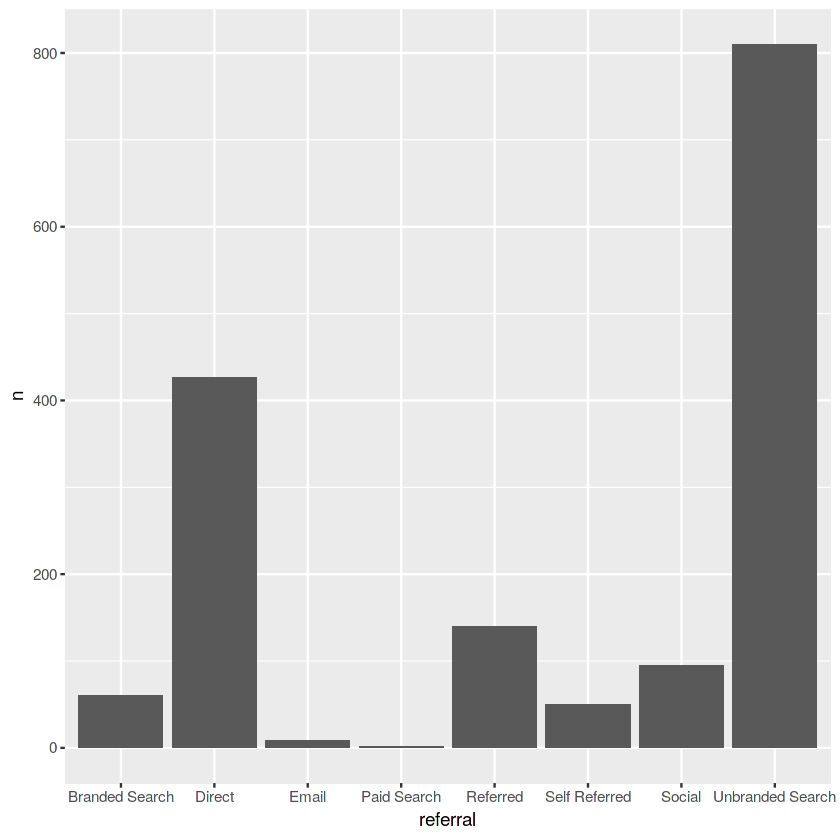

In [29]:
ec%>%
count(referral)%>%
ggplot(aes(x=referral,y=n))+
geom_col() 

In [120]:
# set the size of the graphics output
options(repr.plot.width=12, repr.plot.height=10)

In [31]:
ec%>%count(referral)%>%
arrange(-n)

referral,n
<chr>,<int>
Unbranded Search,810
Direct,426
Referred,140
Social,95
Branded Search,60
Self Referred,50
Email,9
Paid Search,2


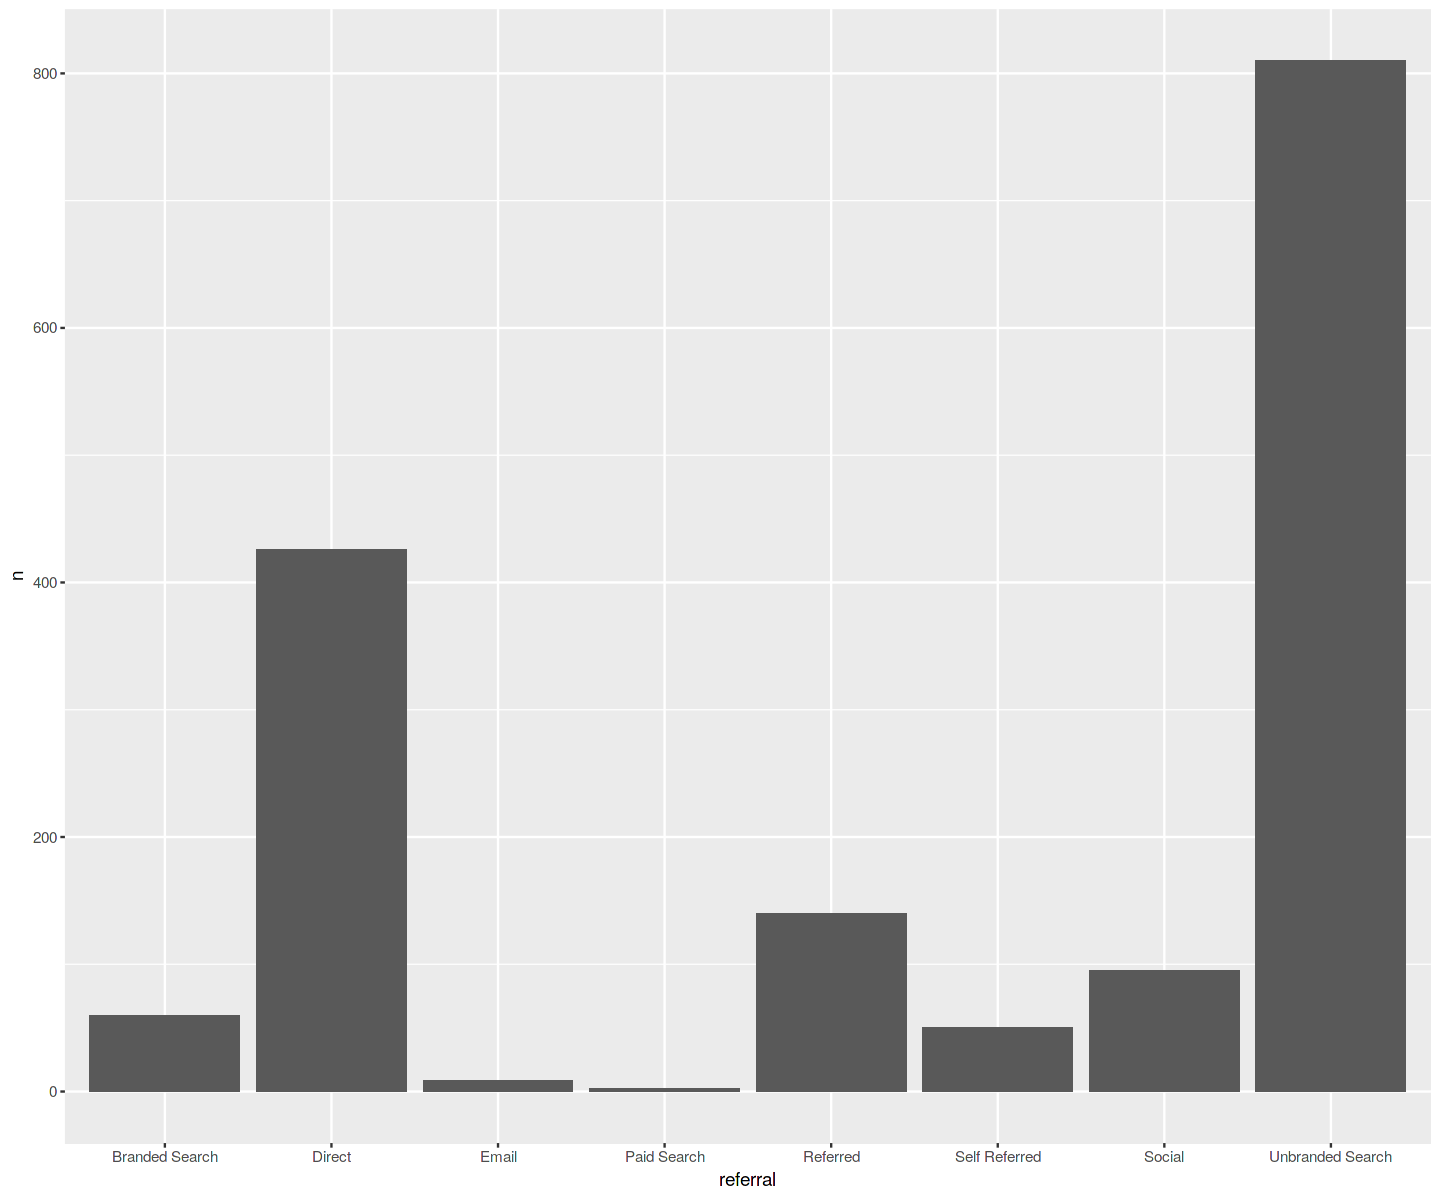

In [32]:
#Code 3
ec%>%count(referral)%>%
arrange(-n)%>%
ggplot(aes(x=referral,y=n))+
geom_col()

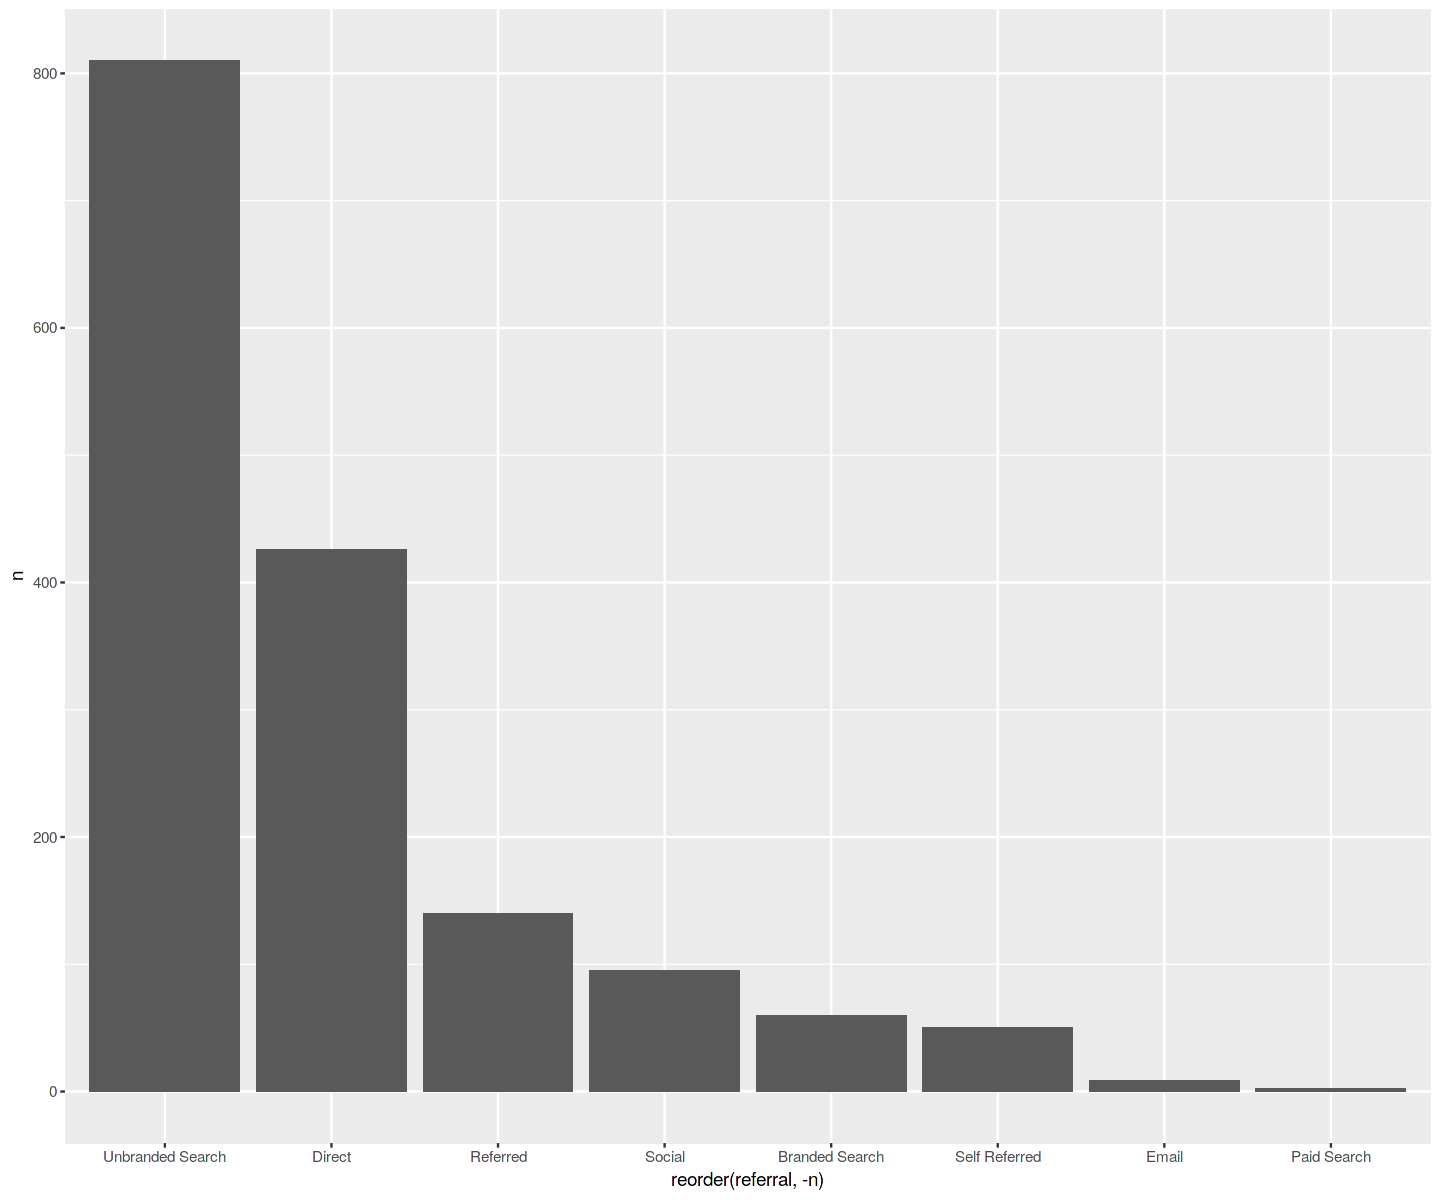

In [33]:
#Arrange the chart in ggplot itself, using reorder)
ec%>%count(referral)%>%
ggplot(aes(x=reorder(referral,-n), y=n))+
geom_col()

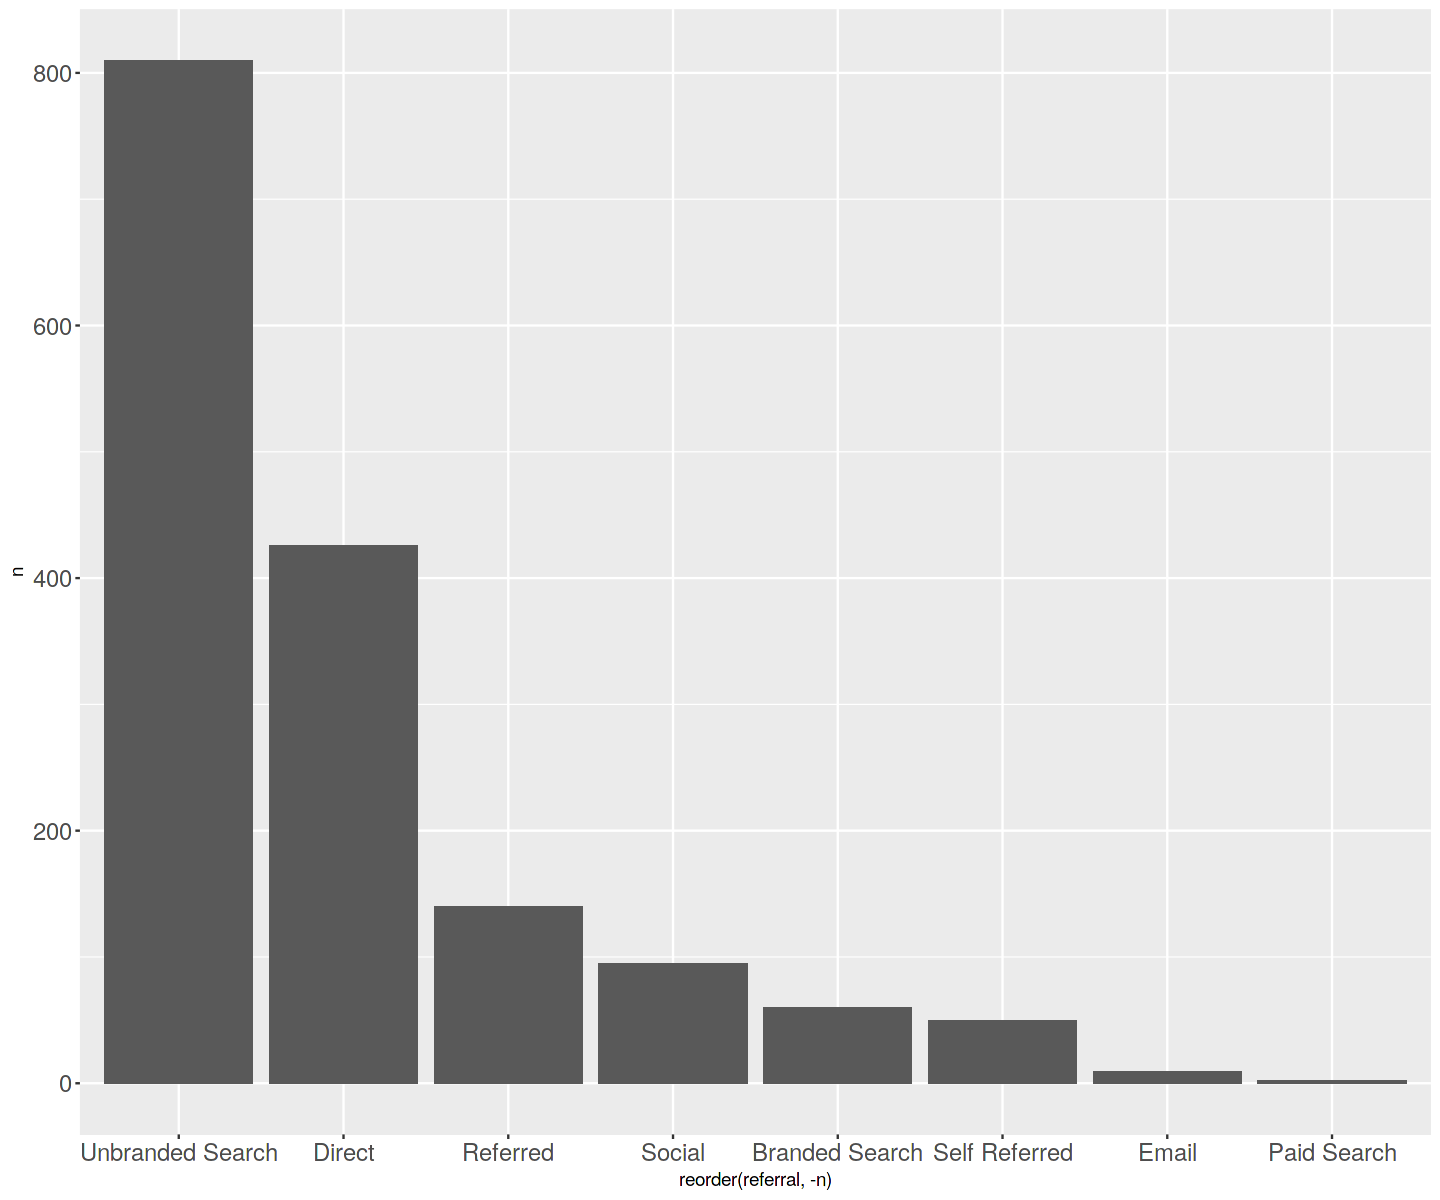

In [34]:
ec%>%
count(referral)%>%
ggplot(aes(x=reorder(referral,-n), y=n))+
geom_col()+
theme(axis.text=element_text(size=14)) #theme is the overall ability to change R 
#ability to change the things

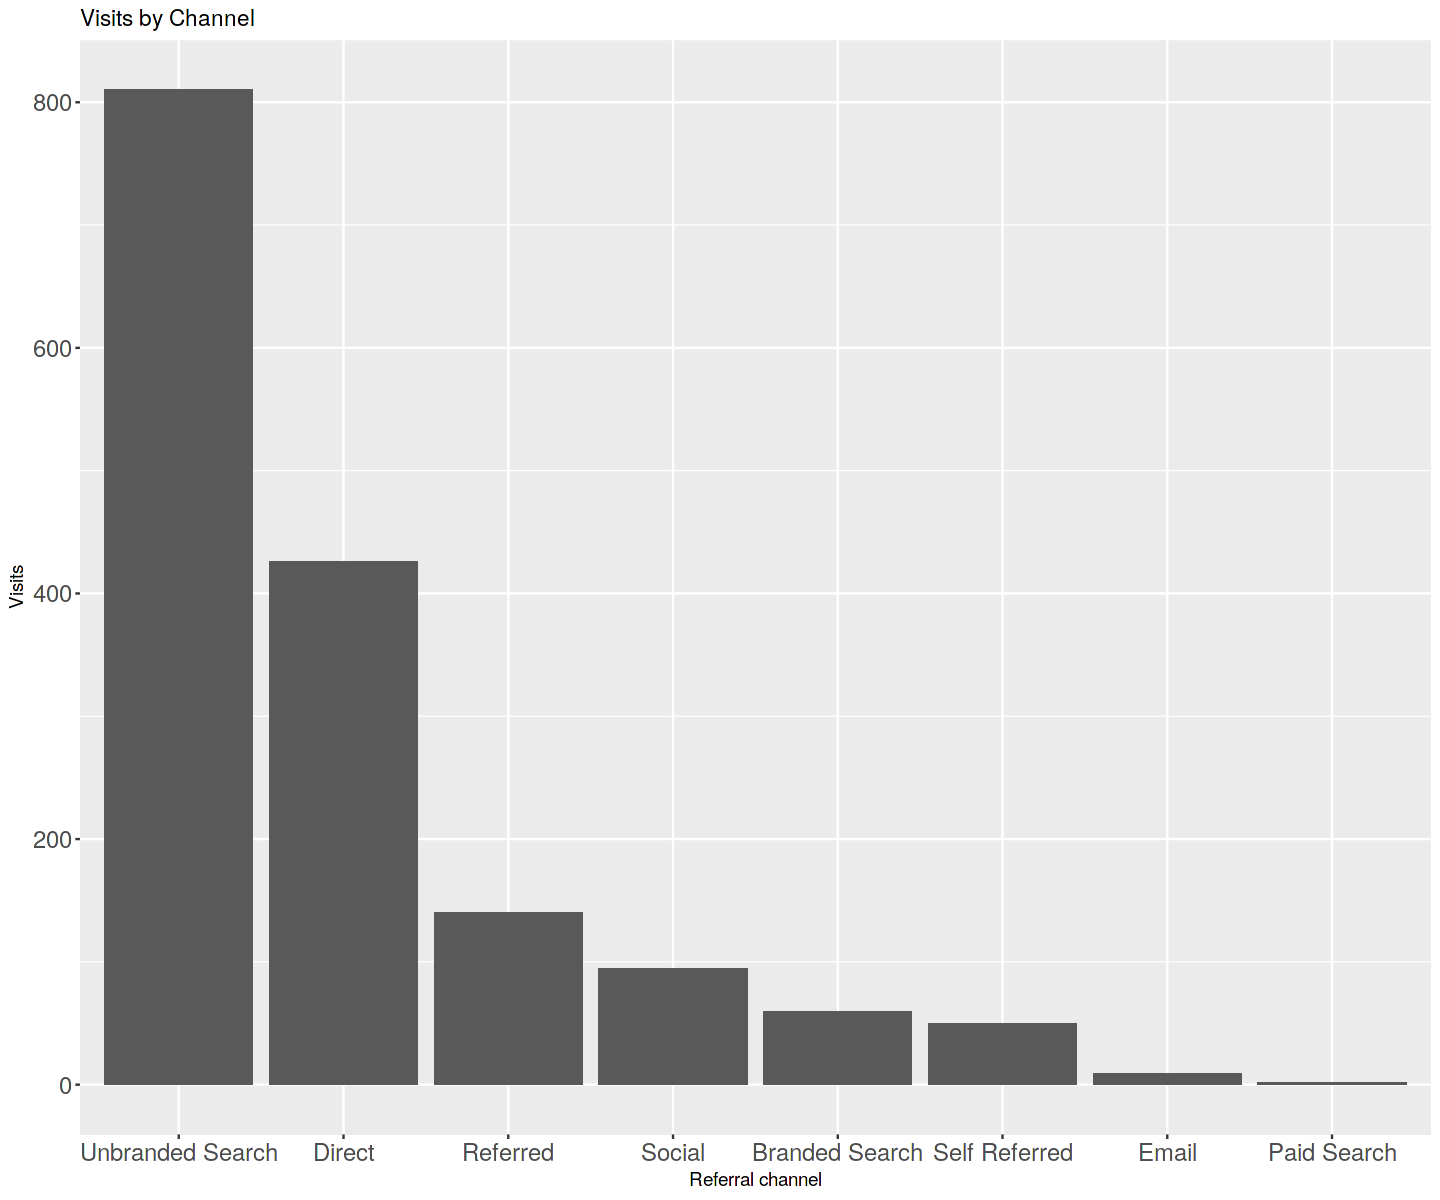

In [35]:
ec%>%
count(referral)%>%
ggplot(aes(x=reorder(referral,-n), y=n))+
geom_col()+
theme(axis.text=element_text(size=14))+
ggtitle("Visits by Channel")+
xlab("Referral channel")+
ylab("Visits")

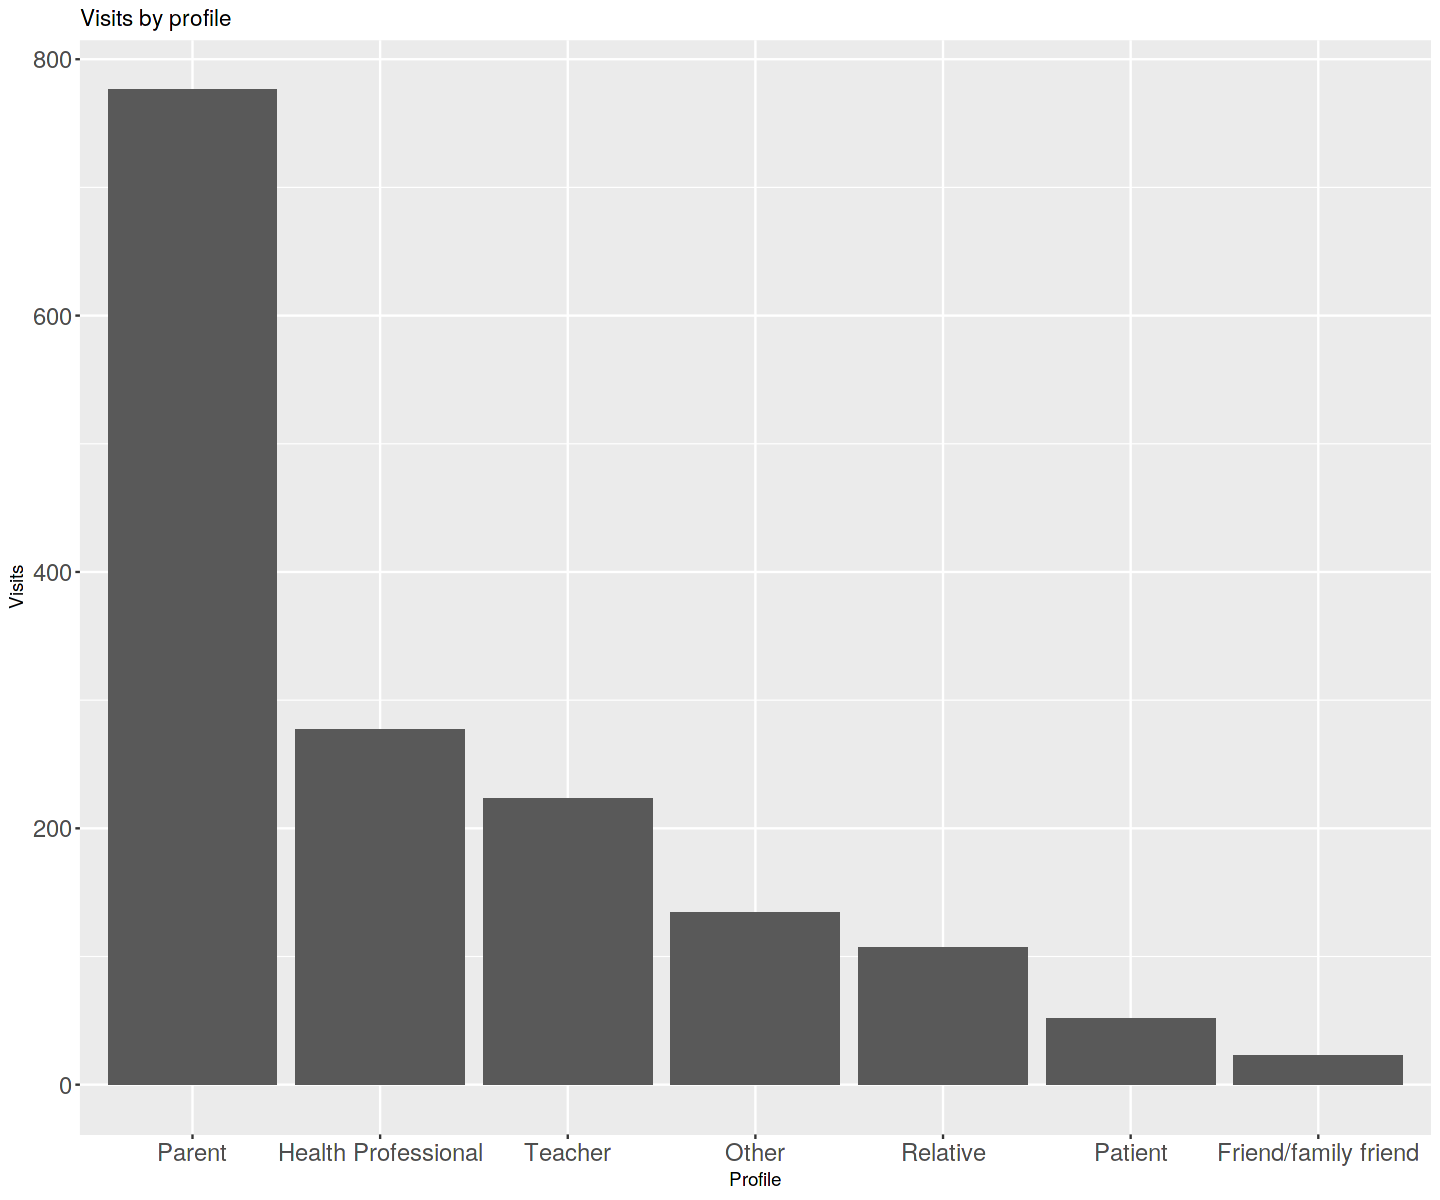

In [36]:
#Code 7
ec%>%
count(profile)%>%
ggplot(aes(x=reorder(profile,-n), y=n))+
geom_col()+
theme(axis.text=element_text(size=14))+
ggtitle("Visits by profile") +
xlab("Profile") +
ylab("Visits")

In [37]:
ec%>%
group_by(profile)%>%
summarize(purchaseTotals=sum(purchased))

profile,purchaseTotals
<chr>,<dbl>
Friend/family friend,0
Health Professional,11
Other,7
Parent,71
Patient,3
Relative,9
Teacher,12


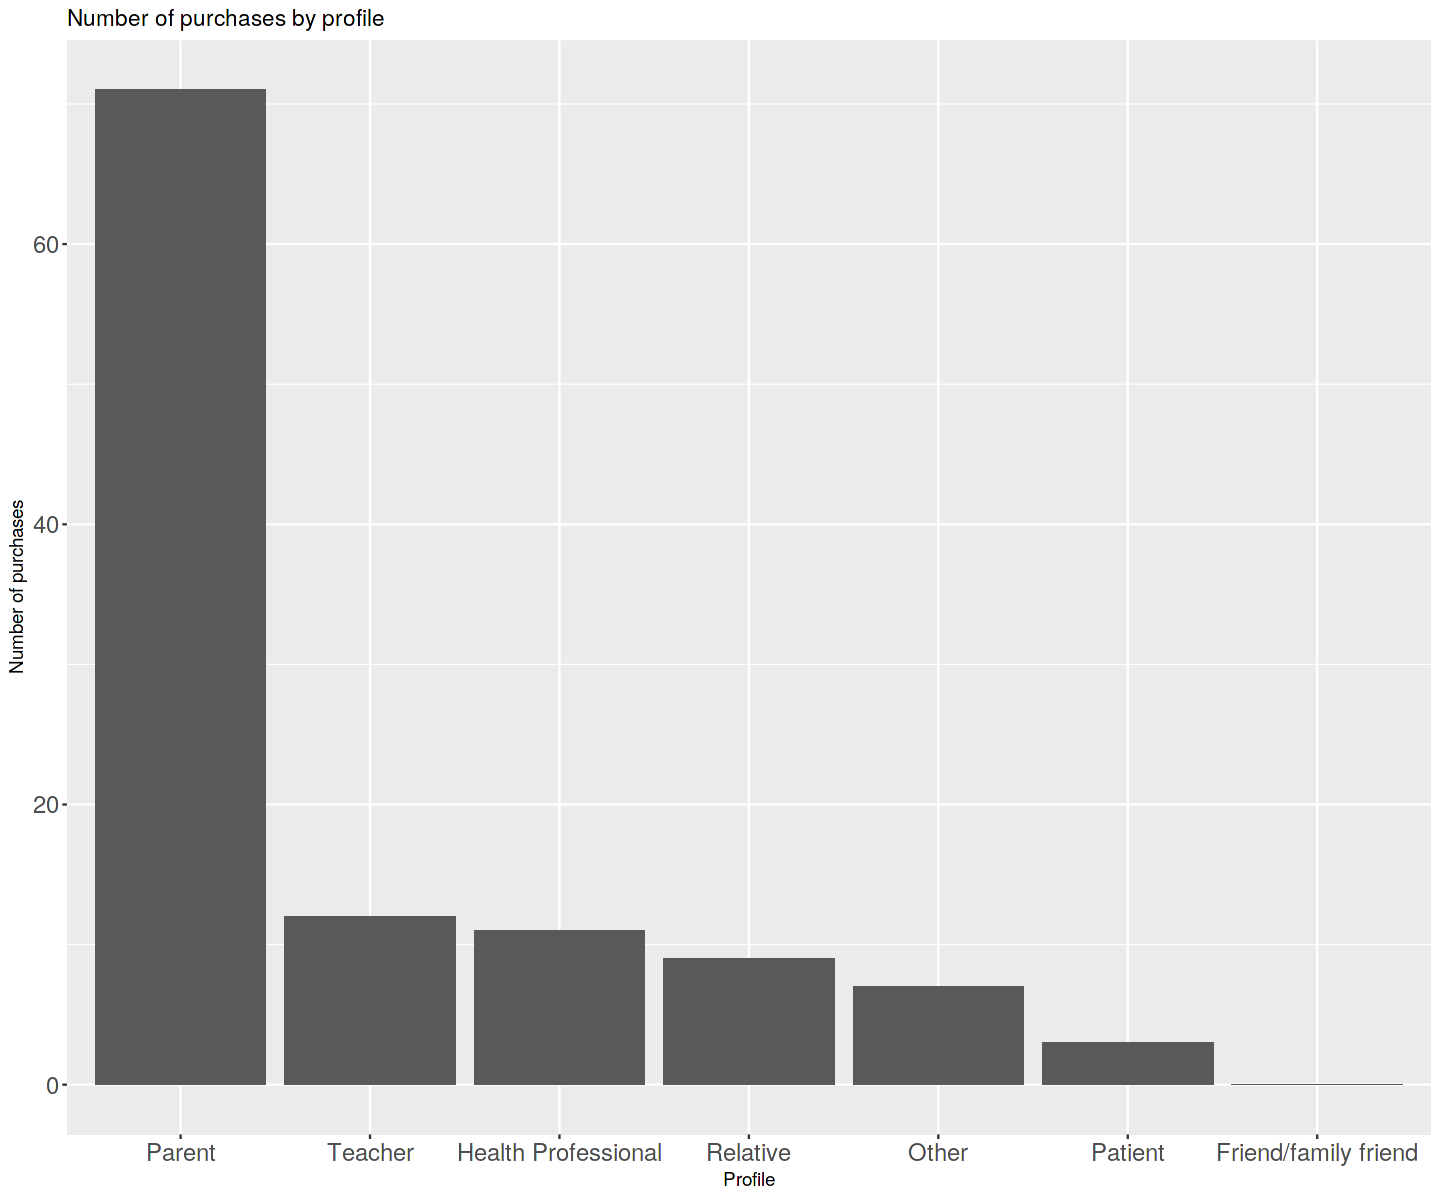

In [38]:
ec%>%
group_by(profile)%>%
summarize(purchaseTotals=sum(purchased))%>%
#ggplot(aes(x=redorder(profile,-purchaseTotals),
            #y=purchaseTotals))+
ggplot(aes(x=reorder(profile,-purchaseTotals),
           y=purchaseTotals))+
geom_col()+
theme(axis.text=element_text(size=14))+
ggtitle("Number of purchases by profile") +
xlab("Profile") + ylab("Number of purchases")

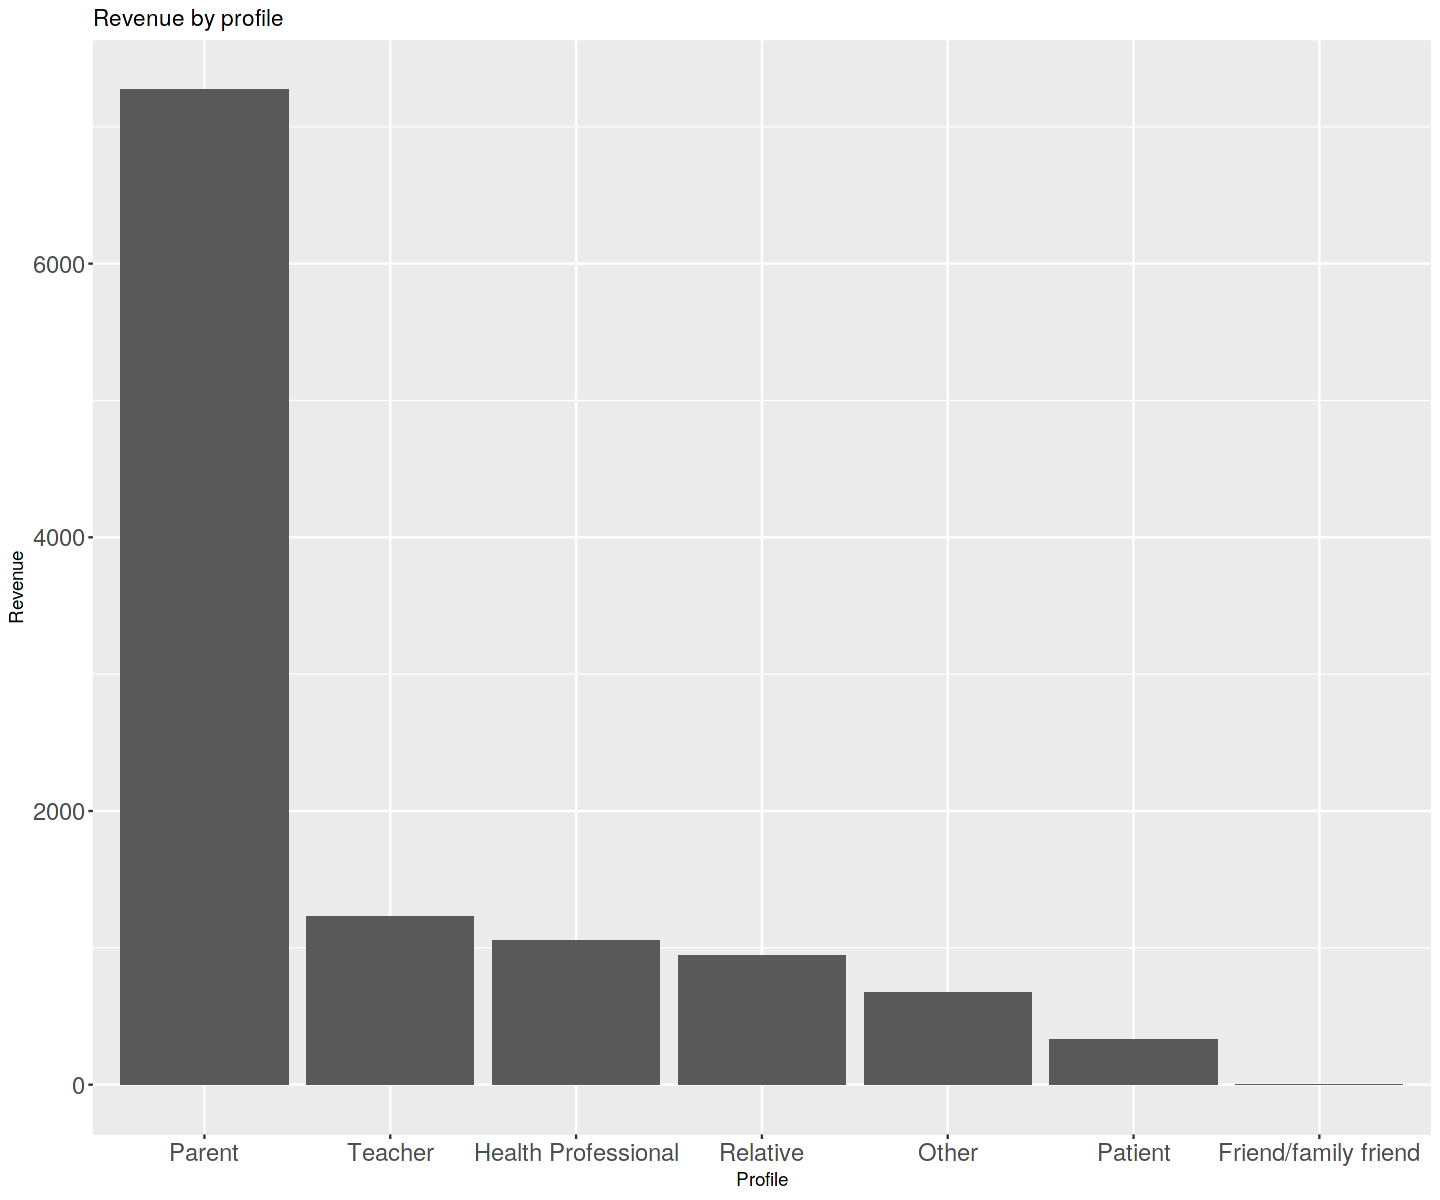

In [39]:
ec%>%group_by(profile)%>%
summarize(purchasedTotals=sum(purchaseAmount))%>%
ggplot(aes(x=reorder(profile,-purchasedTotals),
           y=purchasedTotals))+
geom_col()+
theme(axis.text=element_text(size=14))+
ggtitle("Revenue by profile") +
xlab("Profile") + ylab("Revenue")

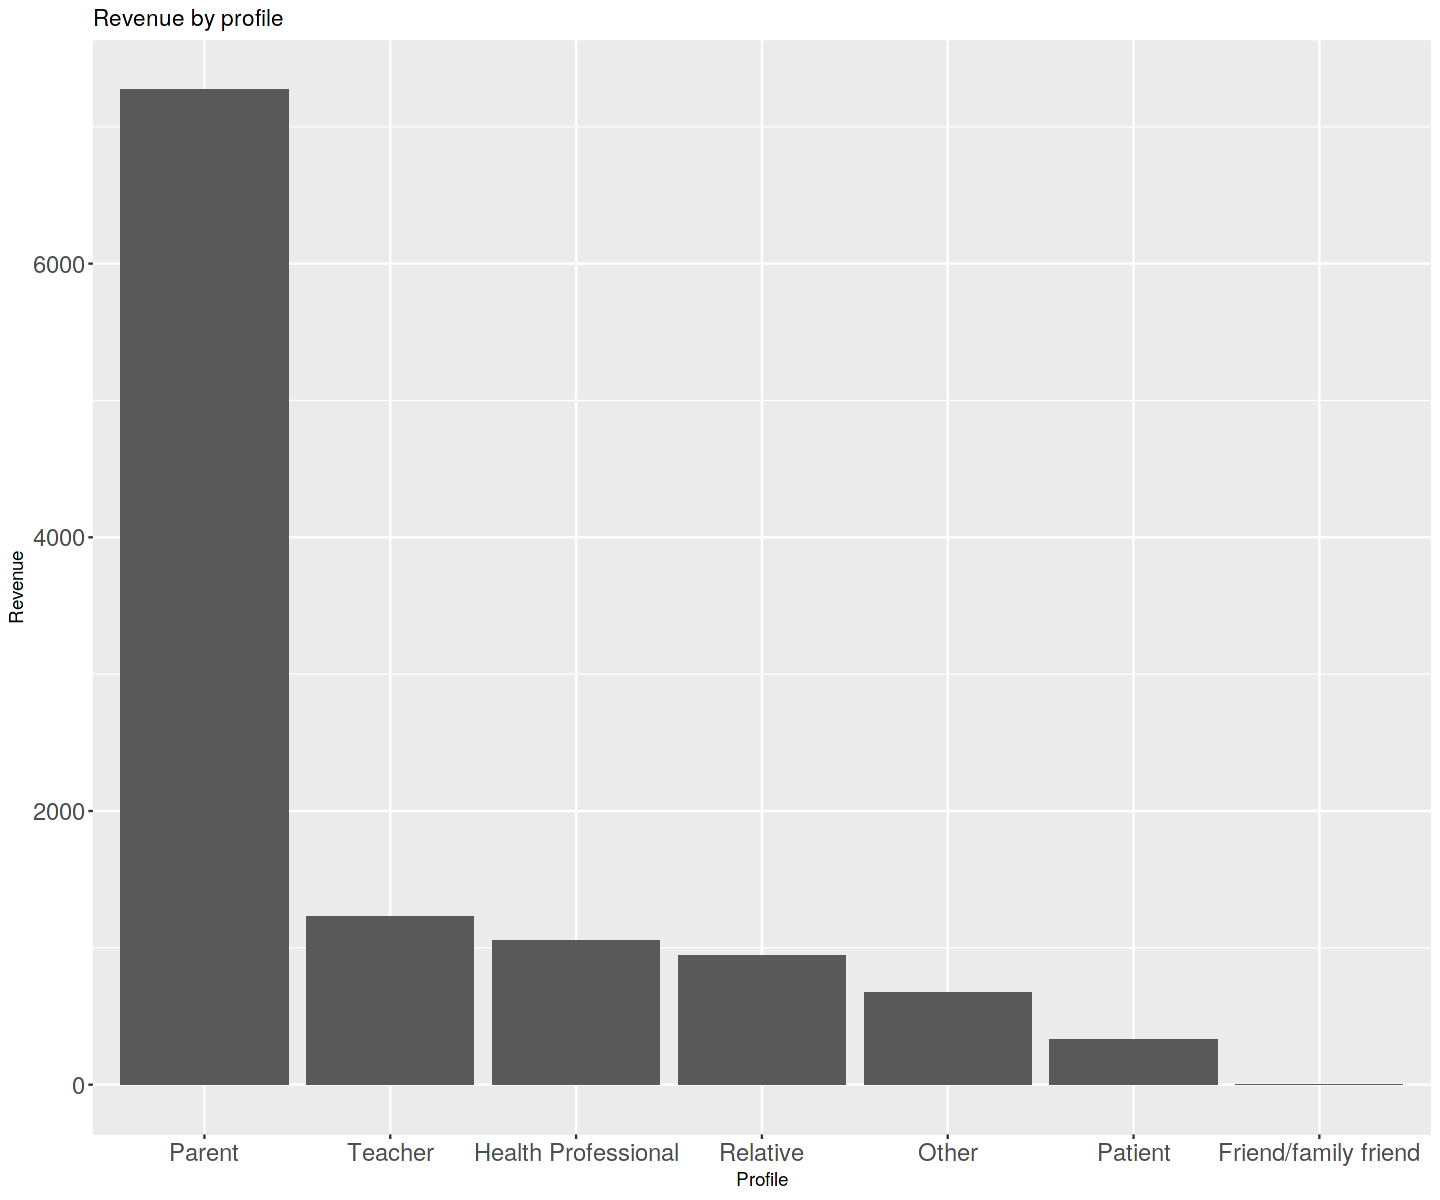

In [40]:
ec%>%group_by(profile)%>%
summarize(purchasedTotals=sum(purchaseAmount))%>%
ggplot(aes(x=reorder(profile,-purchasedTotals),
           y=purchasedTotals))+
geom_col()+
theme(axis.text=element_text(size=14))+
ggtitle("Revenue by profile") +
xlab("Profile") + ylab("Revenue")

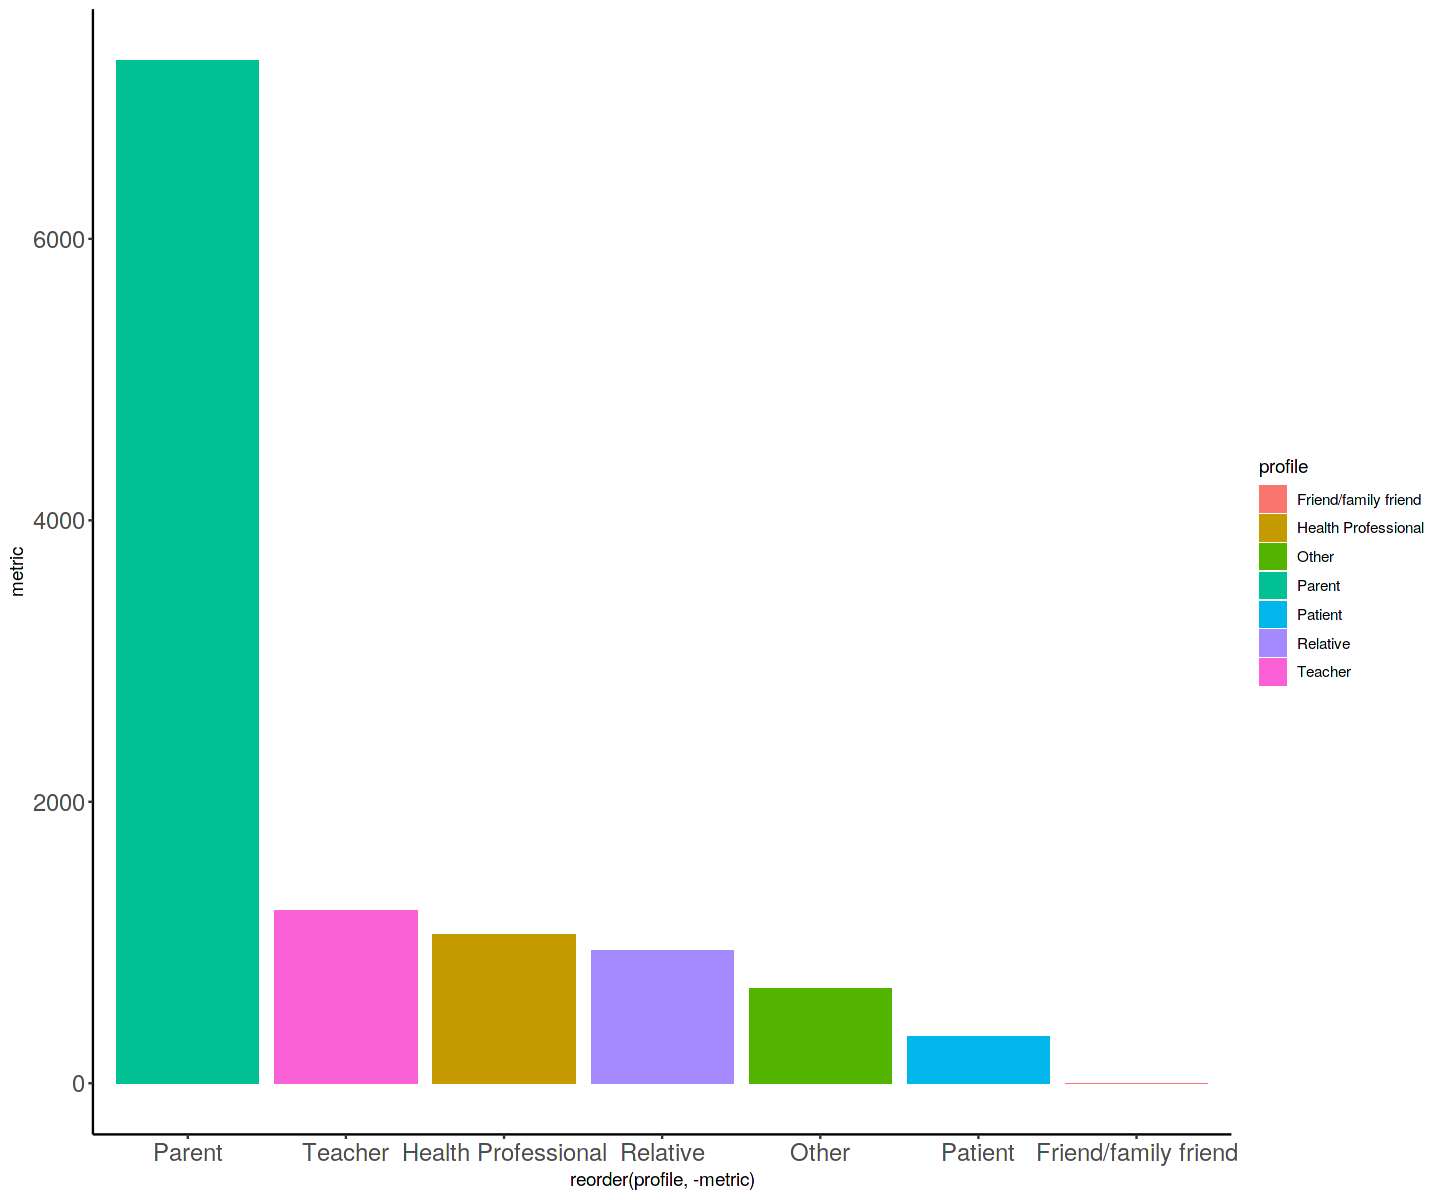

In [41]:
#Coloured theme
ec%>%group_by(profile)%>%
summarize(metric=sum(purchaseAmount))%>%
ggplot(aes(x=reorder(profile,-metric),
           y=metric,fill=profile))+
geom_col()+theme_classic()+
theme(axis.text=element_text(size=14))

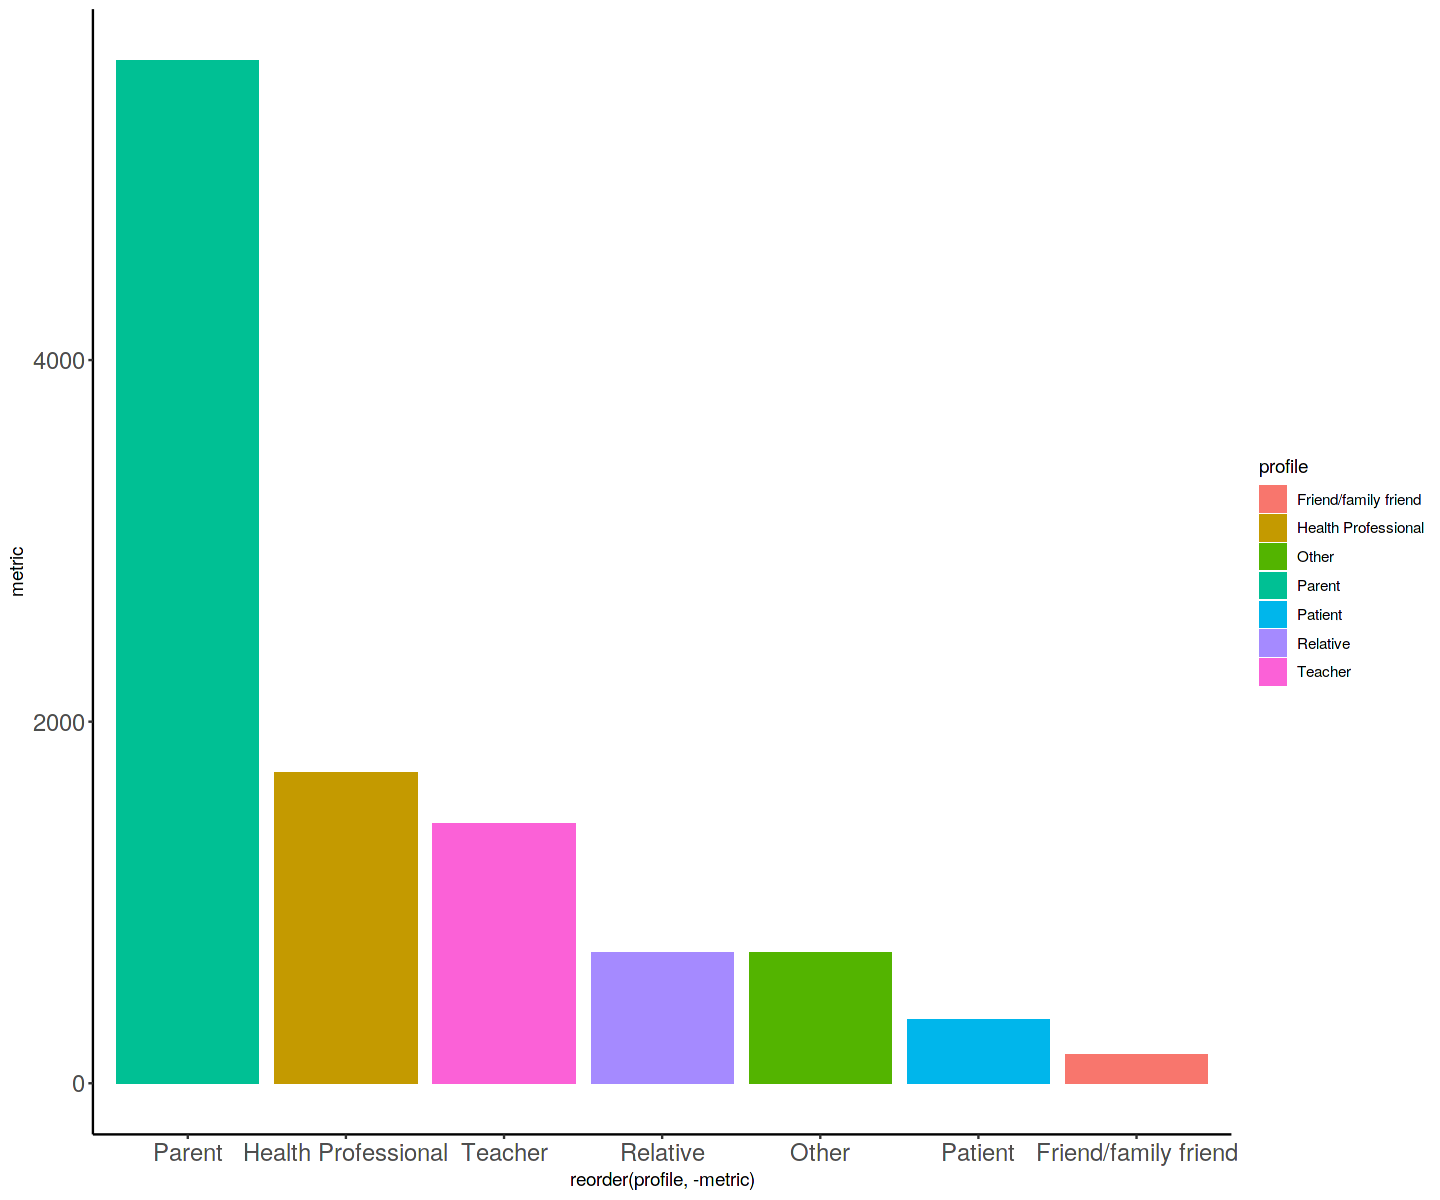

In [42]:
### for profile vs page view ###
ec%>%group_by(profile)%>%
summarize(metric=sum(pageviews))%>%
ggplot(aes(x=reorder(profile,-metric),
           y=metric,fill=profile))+
geom_col()+theme_classic()+
theme(axis.text=element_text(size=14))

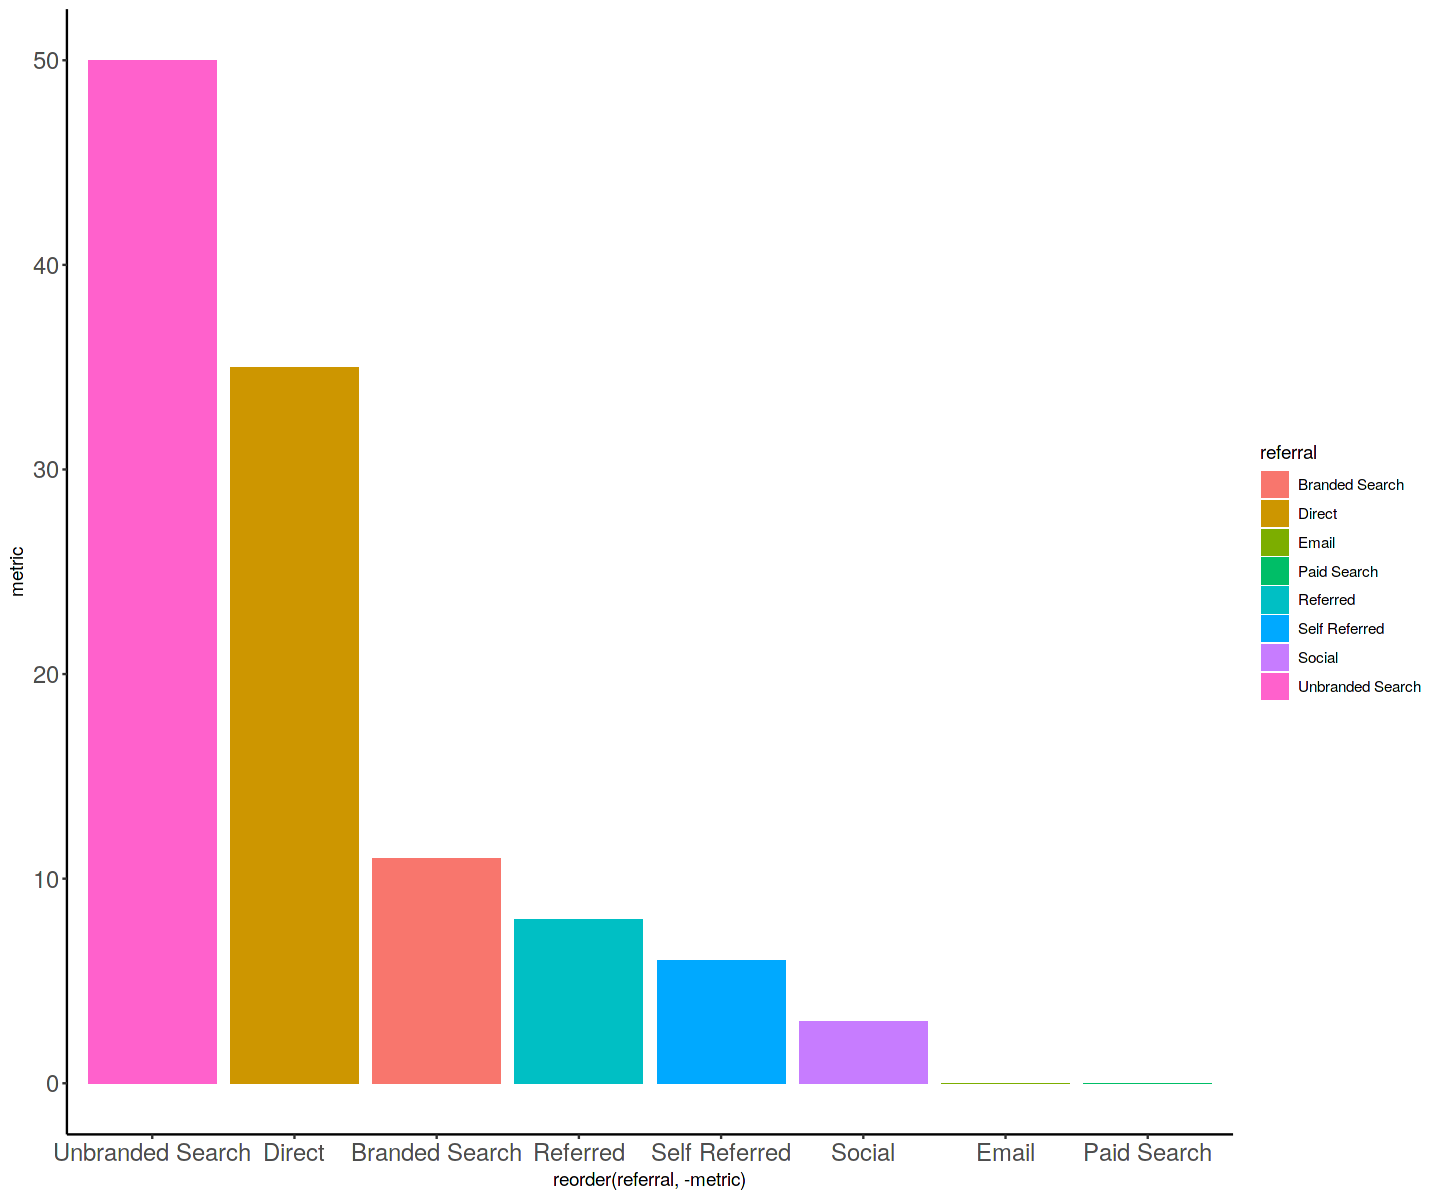

In [43]:
# Chart: referral/sum(purchased). What colour does ggplot assign for 'Self Referred'? B. BLLUE 
#referral /sum(purchased)
ec%>%group_by(referral)%>%
summarize(metric=sum(purchased))%>%
ggplot(aes(x=reorder(referral,-metric),
           y=metric,fill=referral))+
geom_col()+theme_classic()+
theme(axis.text=element_text(size=14))

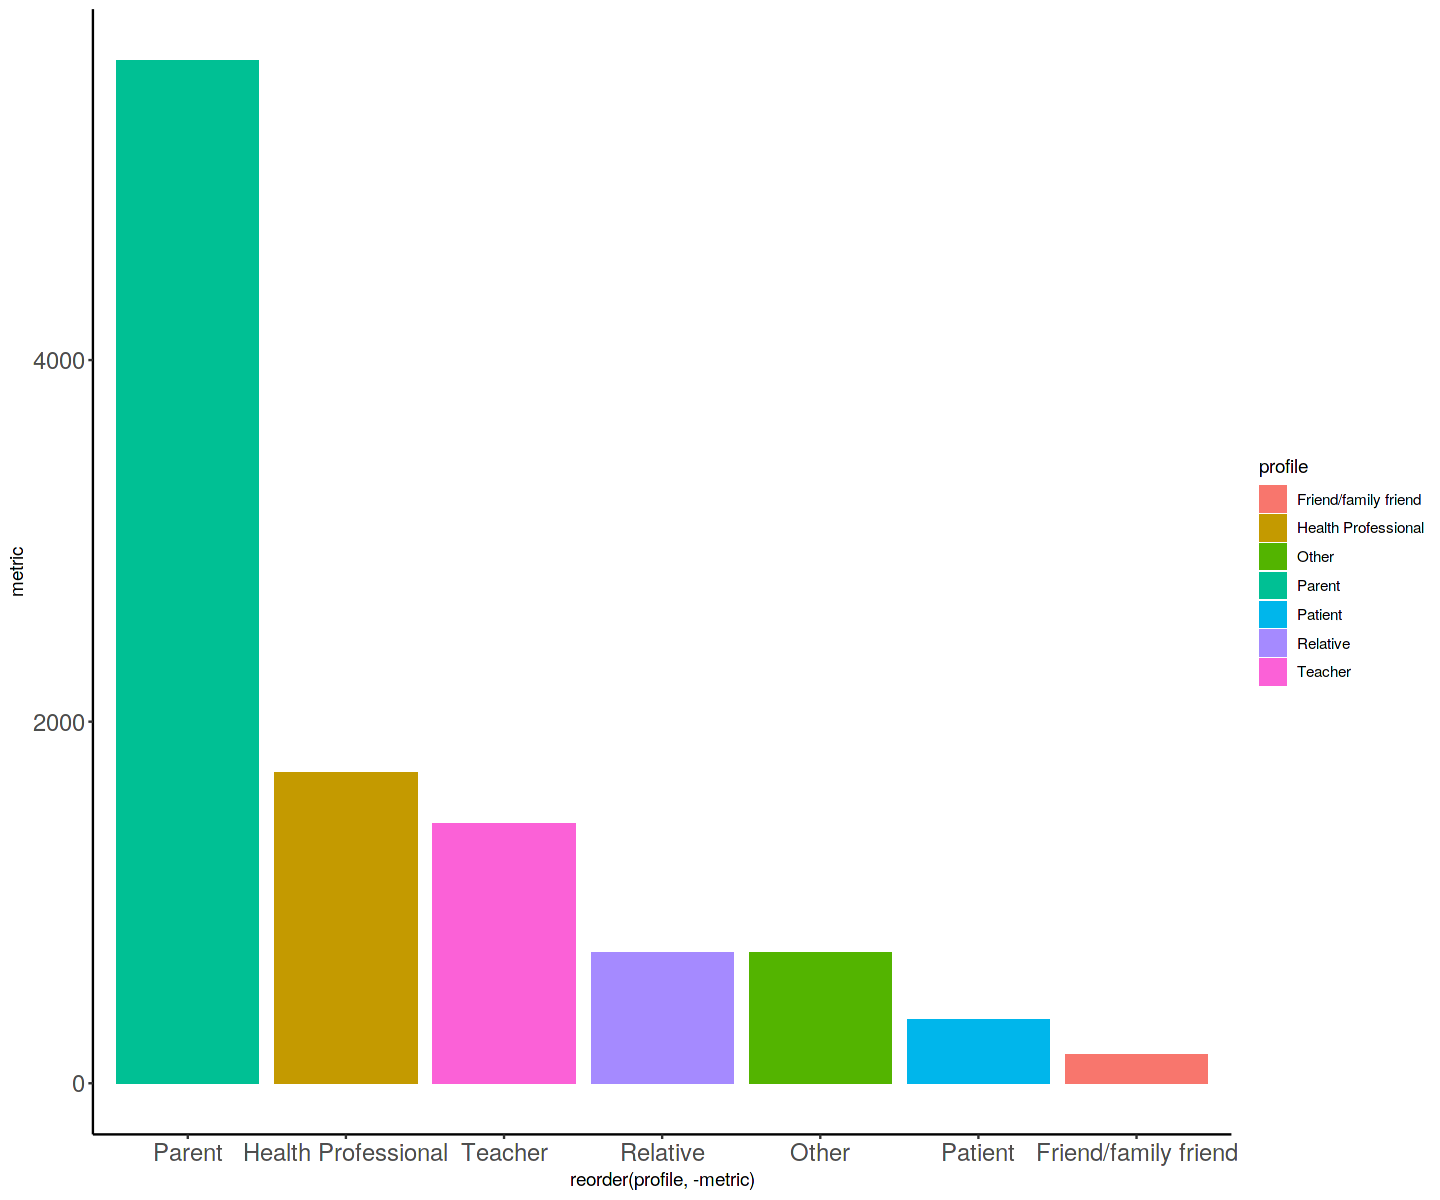

In [44]:
ec%>%group_by(profile)%>%
summarize(metric=sum(pageviews))%>%
ggplot(aes(x=reorder(profile,-metric),
           y=metric,fill=profile))+
geom_col()+theme_classic()+
theme(axis.text=element_text(size=14))

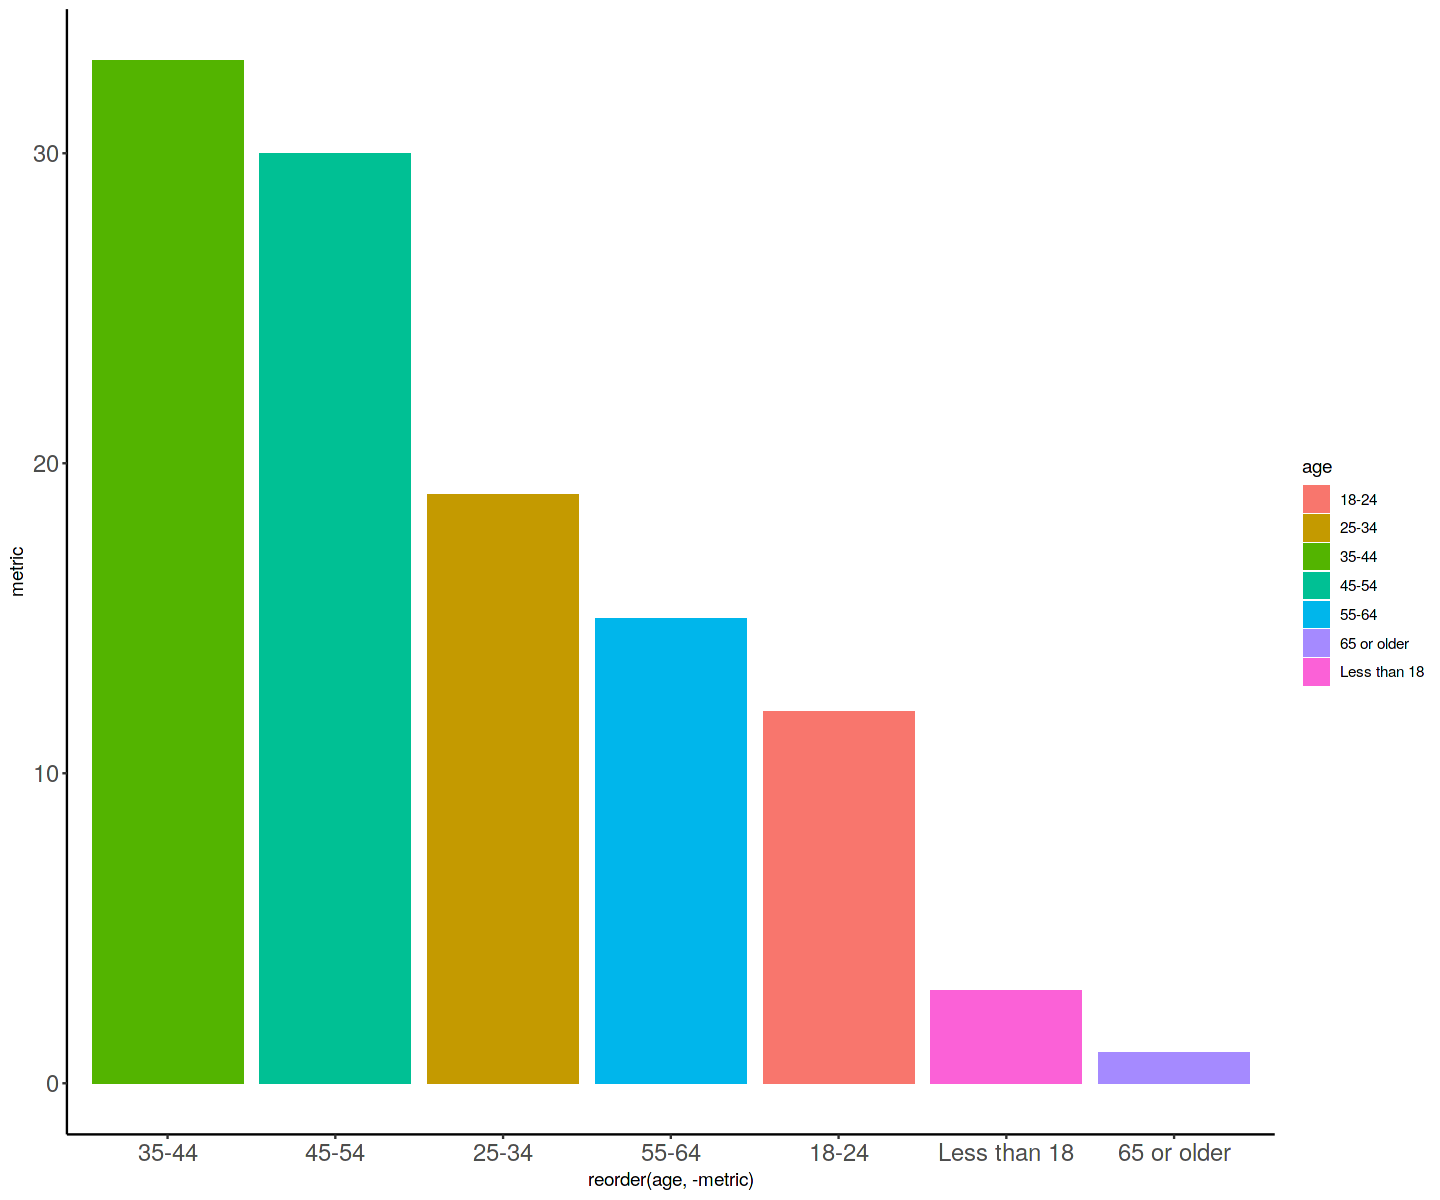

In [45]:
#Chart: age/sum(purchased). What colour is '55-64'? c.blue
#age/sum (purchased)
ec%>%group_by(age)%>%
summarize(metric=sum(purchased))%>%
ggplot(aes(x=reorder(age,-metric),
           y=metric,fill=age))+
geom_col()+theme_classic()+
theme(axis.text=element_text(size=14))

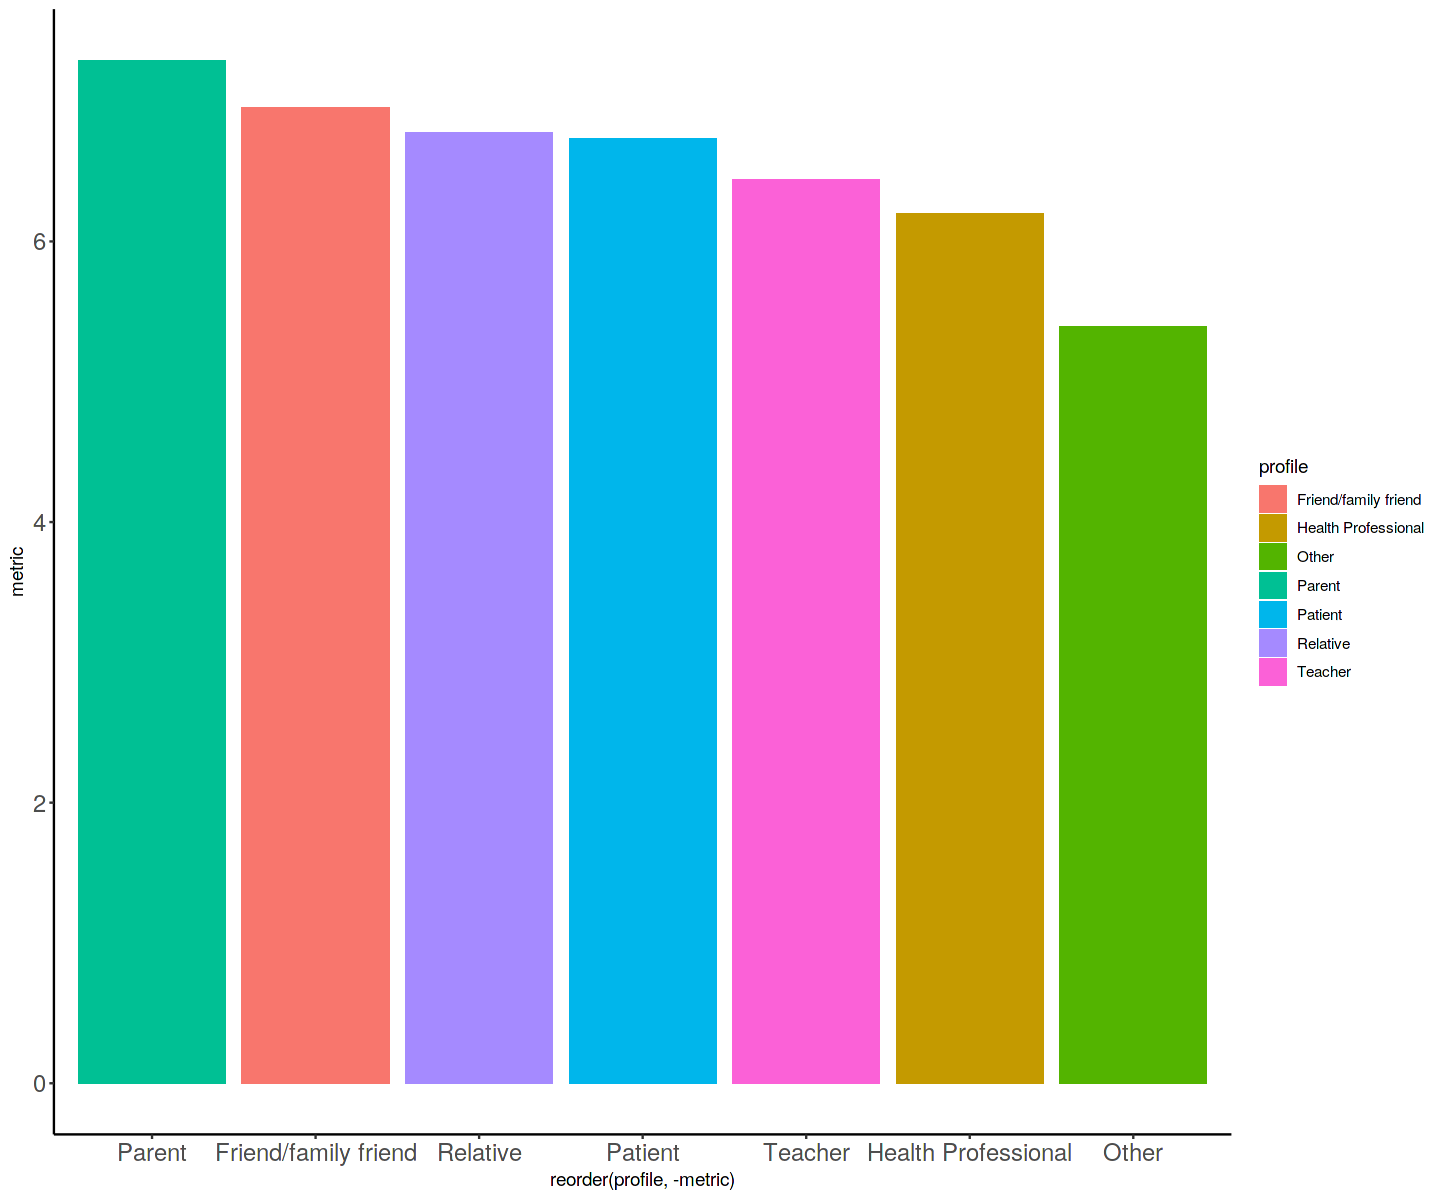

In [46]:
#Chart: profile/mean(pageviews). What colour are 'Teachers'?
ec%>%group_by(profile)%>%
summarize(metric=mean(pageviews))%>%
ggplot(aes(x=reorder(profile,-metric),
           y=metric,fill=profile))+
geom_col()+theme_classic()+
theme(axis.text=element_text(size=14))

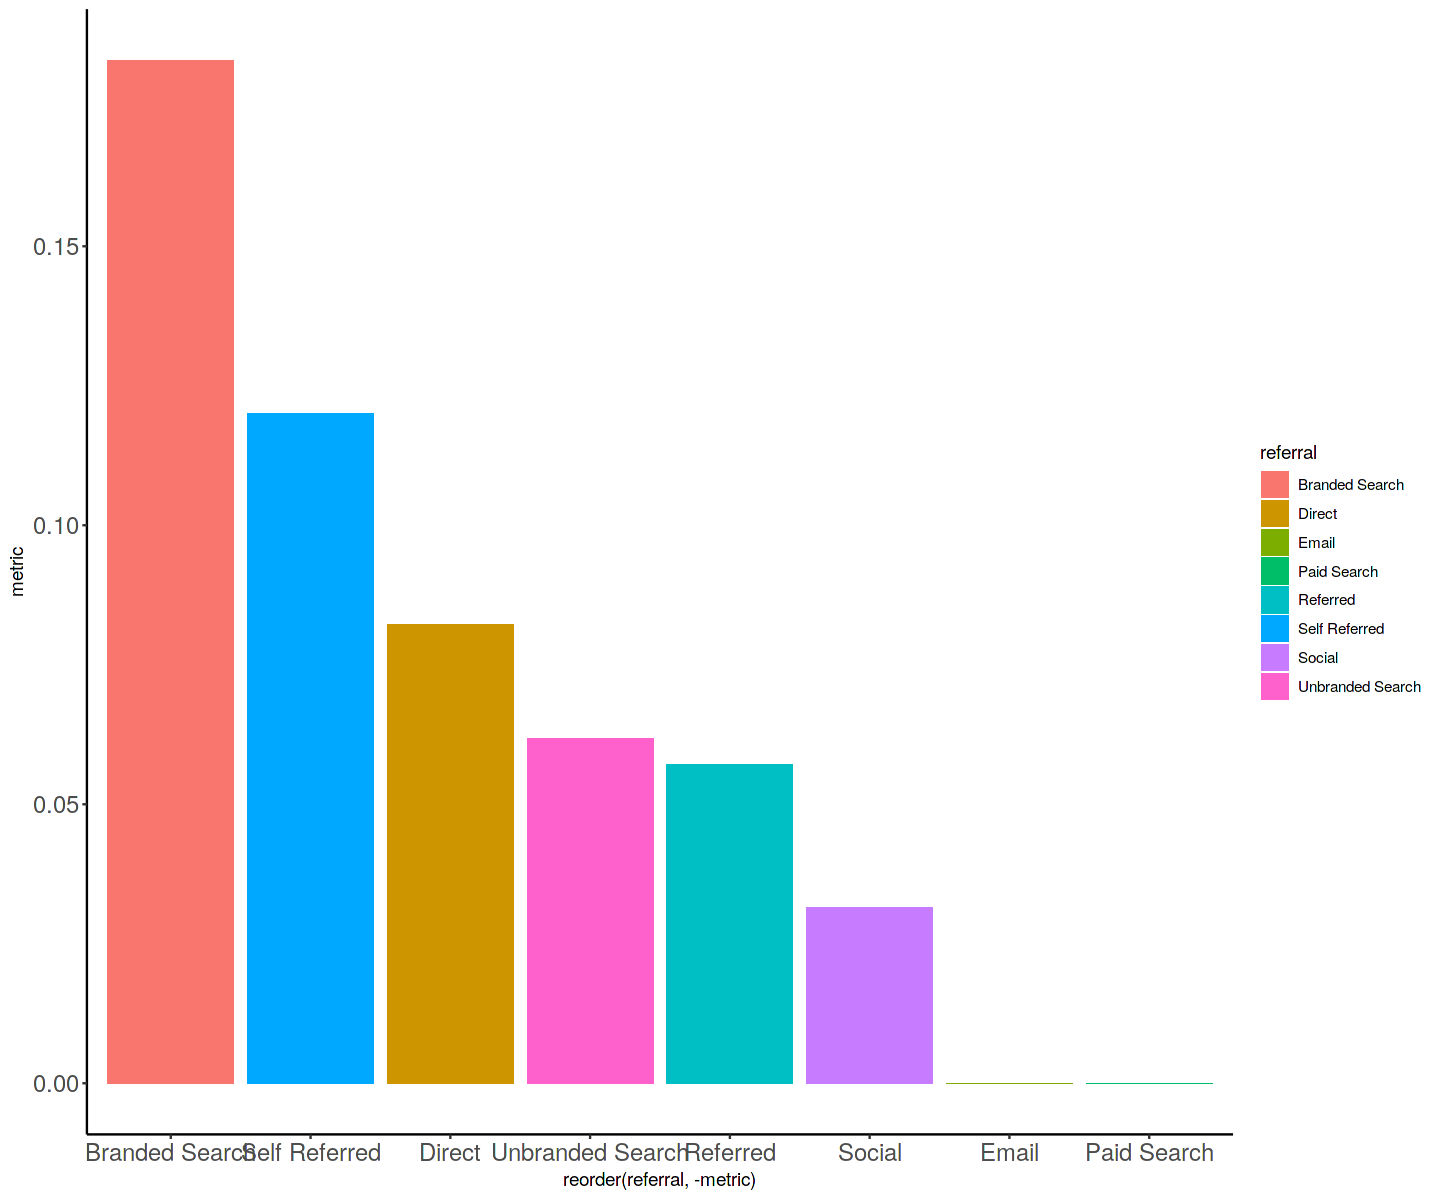

In [47]:
# Chart: Conversion rate by referral channel, ordered by rate, descending. What colour is 'Social'?
ec%>%group_by(referral)%>%
summarize(metric=sum(purchased)/n())%>%
ggplot(aes(x=reorder(referral,-metric),
           y=metric,fill=referral))+
geom_col()+theme_classic()+
theme(axis.text=element_text(size=14))  

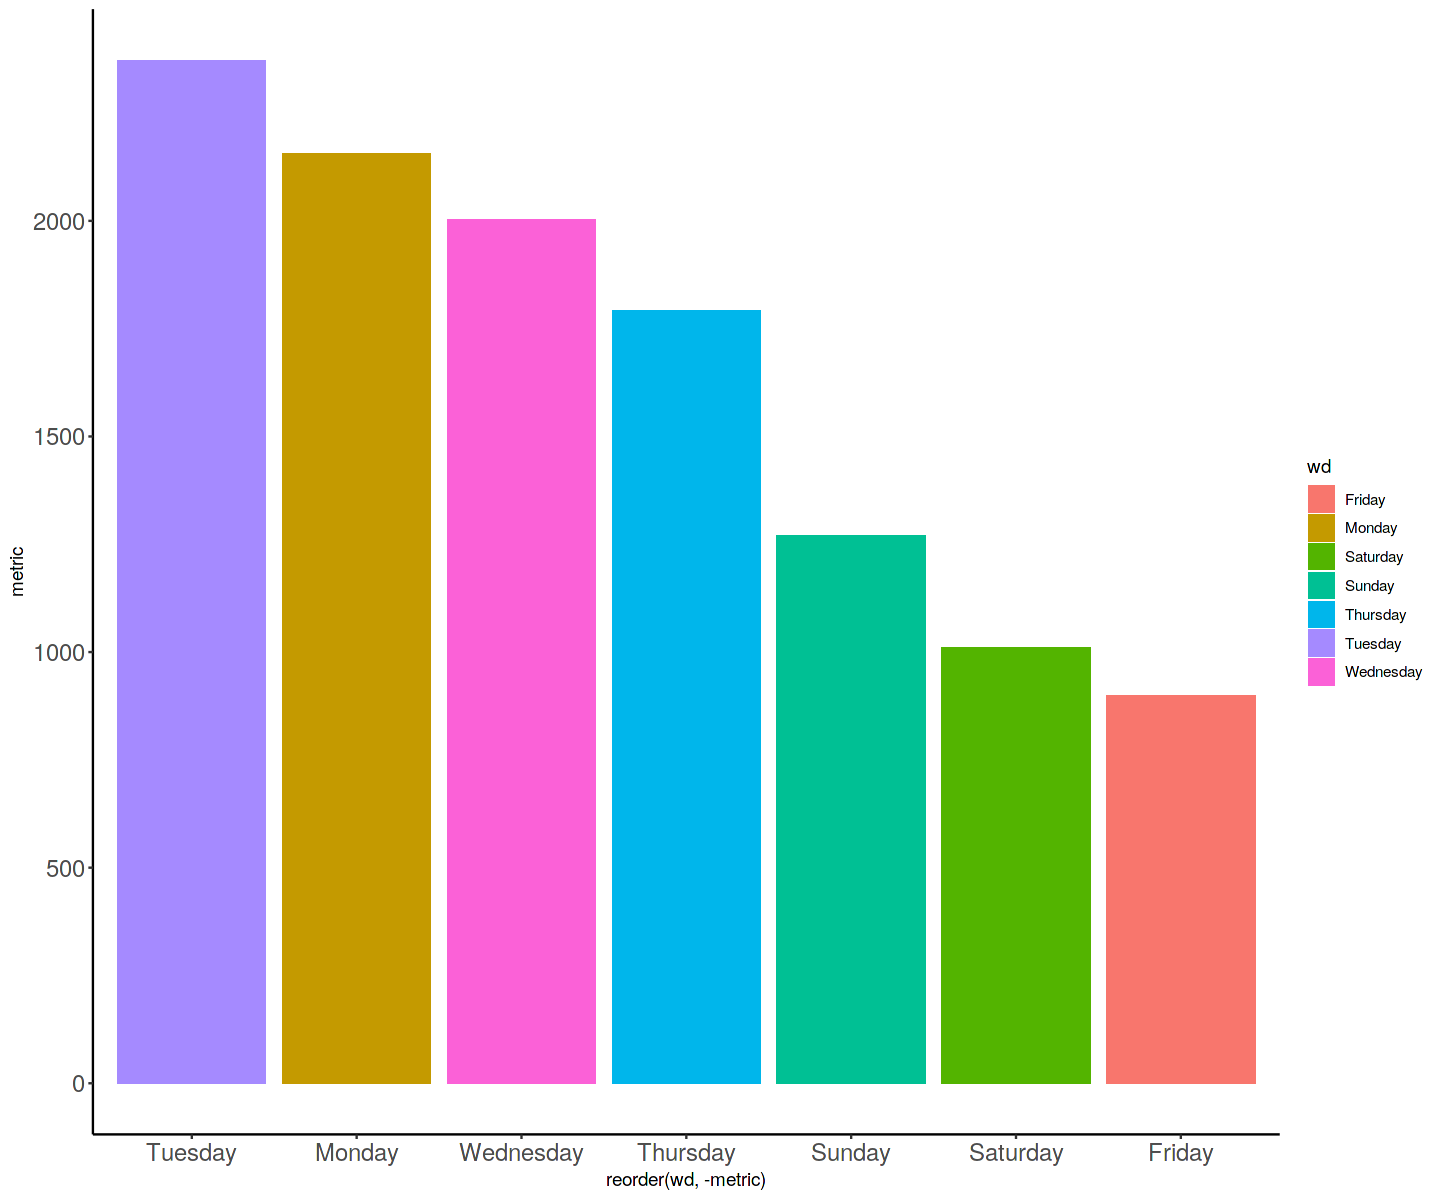

In [48]:
#Chart: Purchase Amount by day of week, ordered by Purchase Amount, descending. What colour is Saturday?
#day of the week/sum(purchasedAmount)
#answer: is green
ec%>%group_by(wd=weekdays(date_col))%>%
summarize(metric=sum(purchaseAmount))%>%
ggplot(aes(x=reorder(wd,-metric),
           y=metric,fill=wd))+
geom_col()+theme_classic()+
theme(axis.text=element_text(size=14))

In [49]:
ec %>%
group_by(weekdays=weekdays(date_col),
         weekdayIndex=wday(date_col)) %>%
summarize(totalPageviews = sum(pageviews))%>%
arrange(weekdayIndex)

weekdays,weekdayIndex,totalPageviews
<chr>,<dbl>,<dbl>
Sunday,1,920
Monday,2,1758
Tuesday,3,2015
Wednesday,4,2465
Thursday,5,1439
Friday,6,1186
Saturday,7,987


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



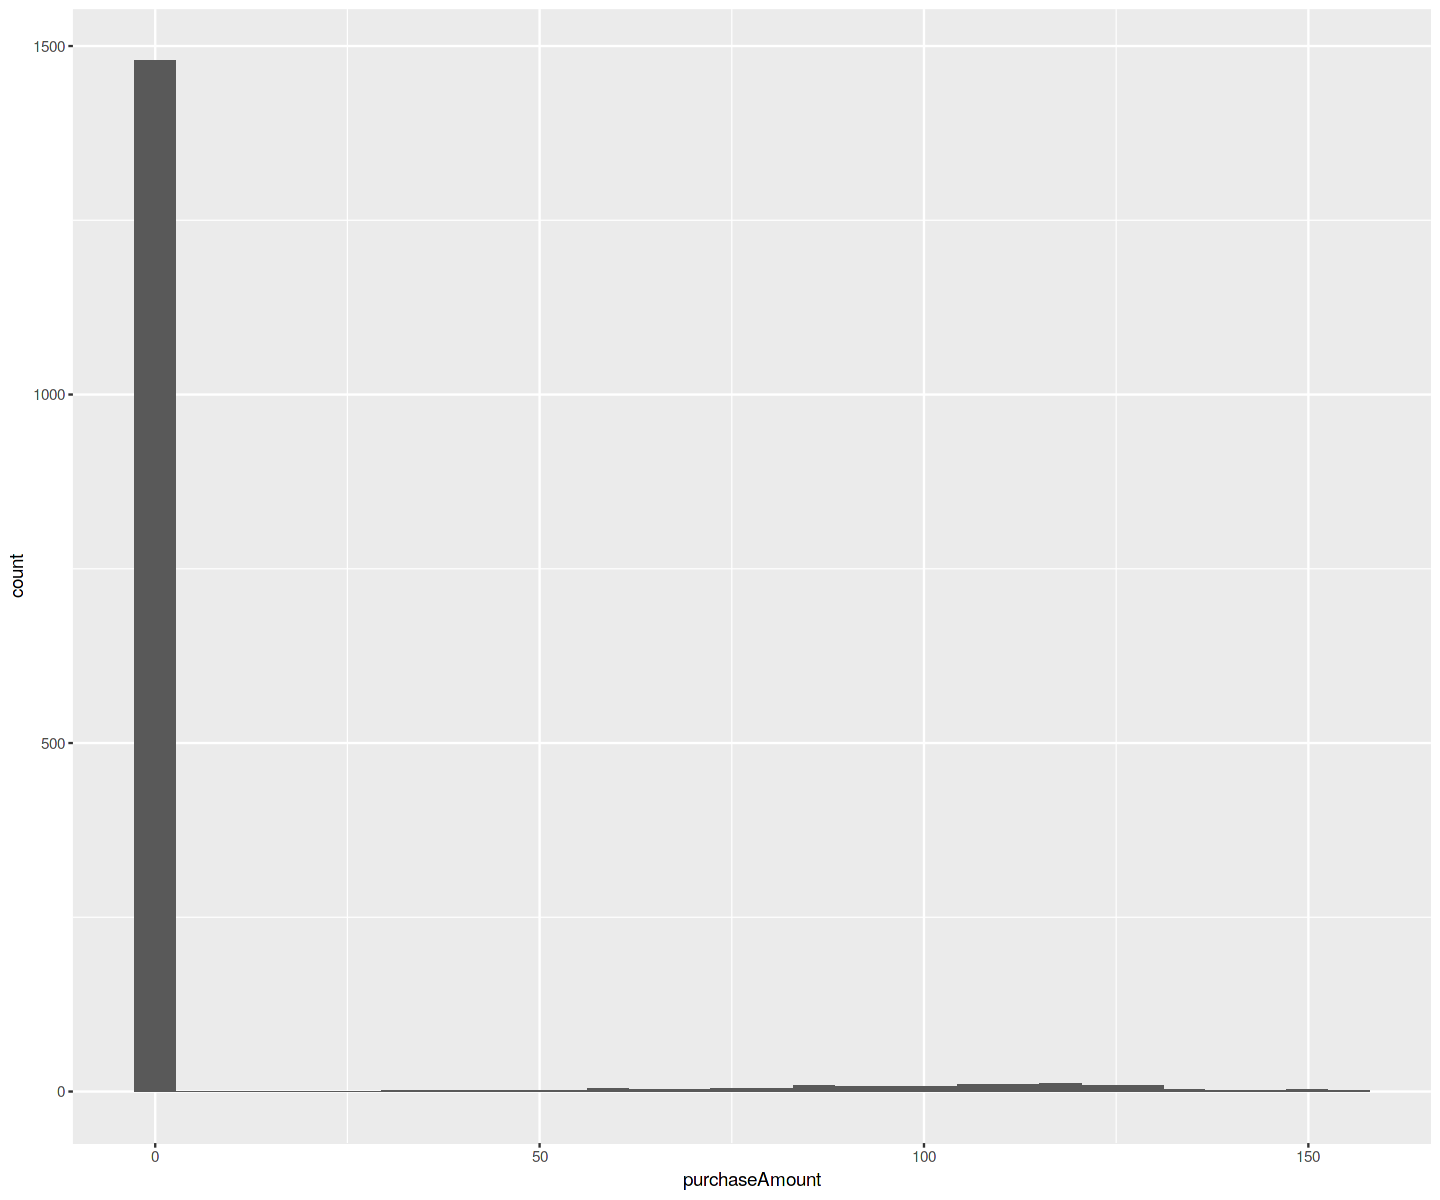

In [50]:
ec%>%
ggplot(aes(x=purchaseAmount))+
geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



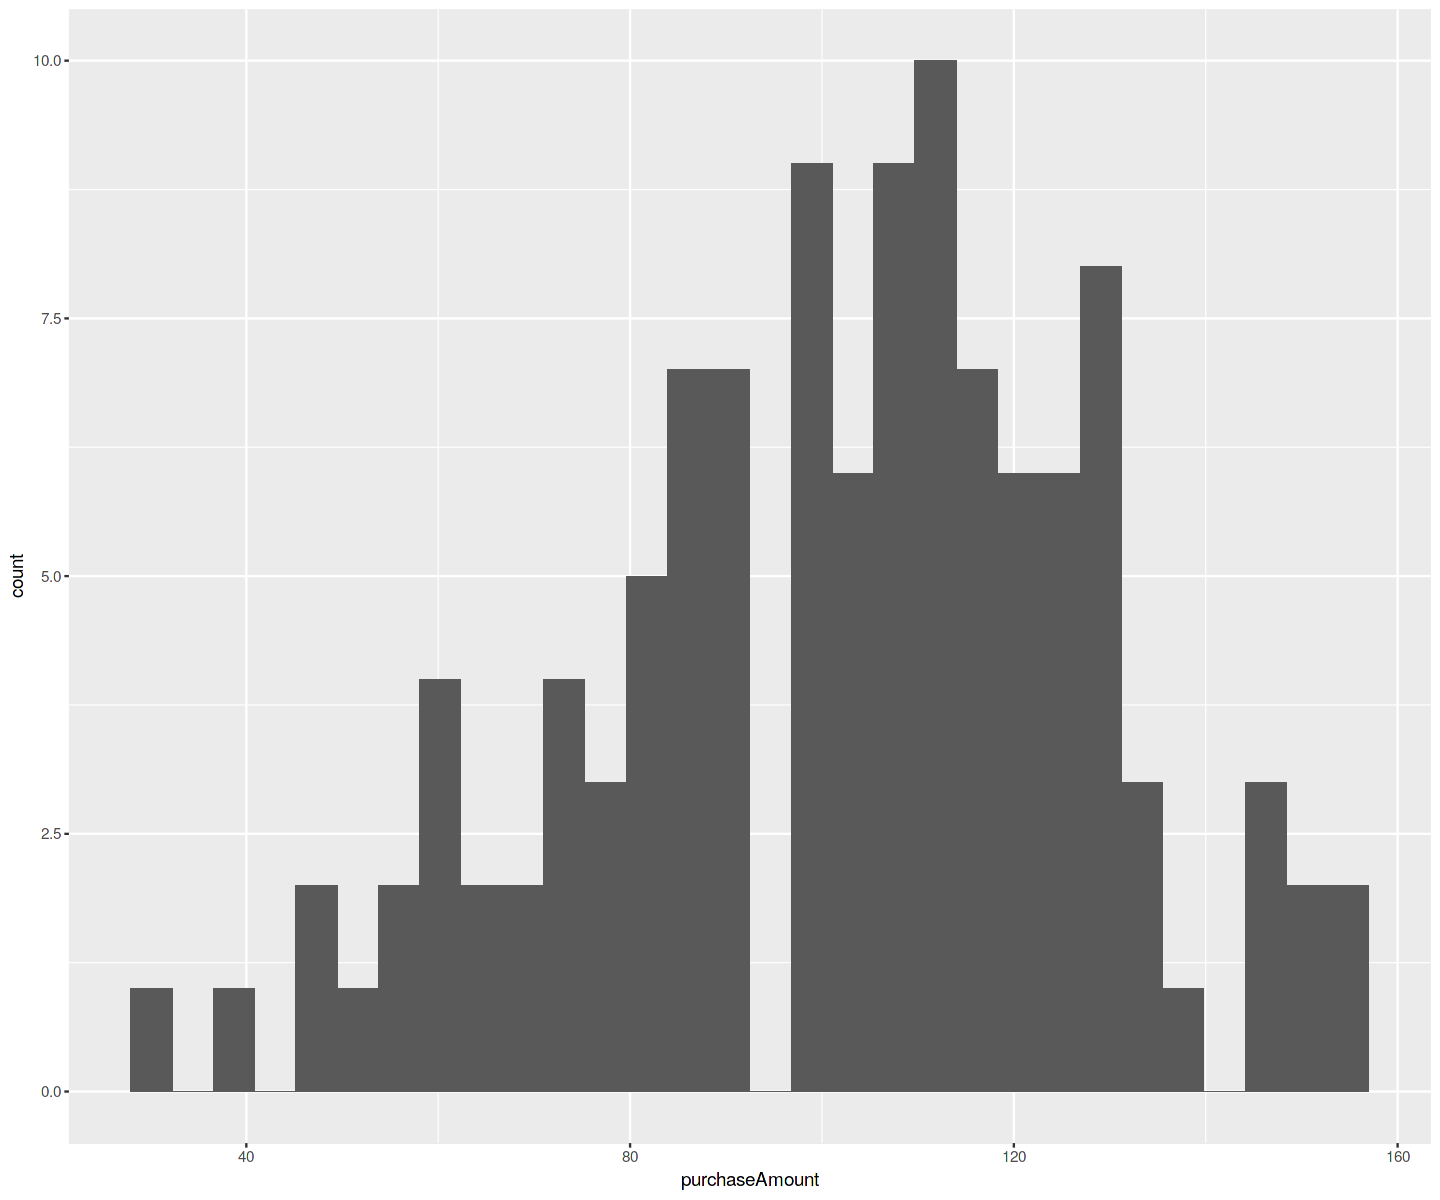

In [51]:
ec%>%filter(purchaseAmount>0)%>%
ggplot(aes(x=purchaseAmount))+
geom_histogram()

Warning message:
“Ignoring unknown parameters: bindwidth”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



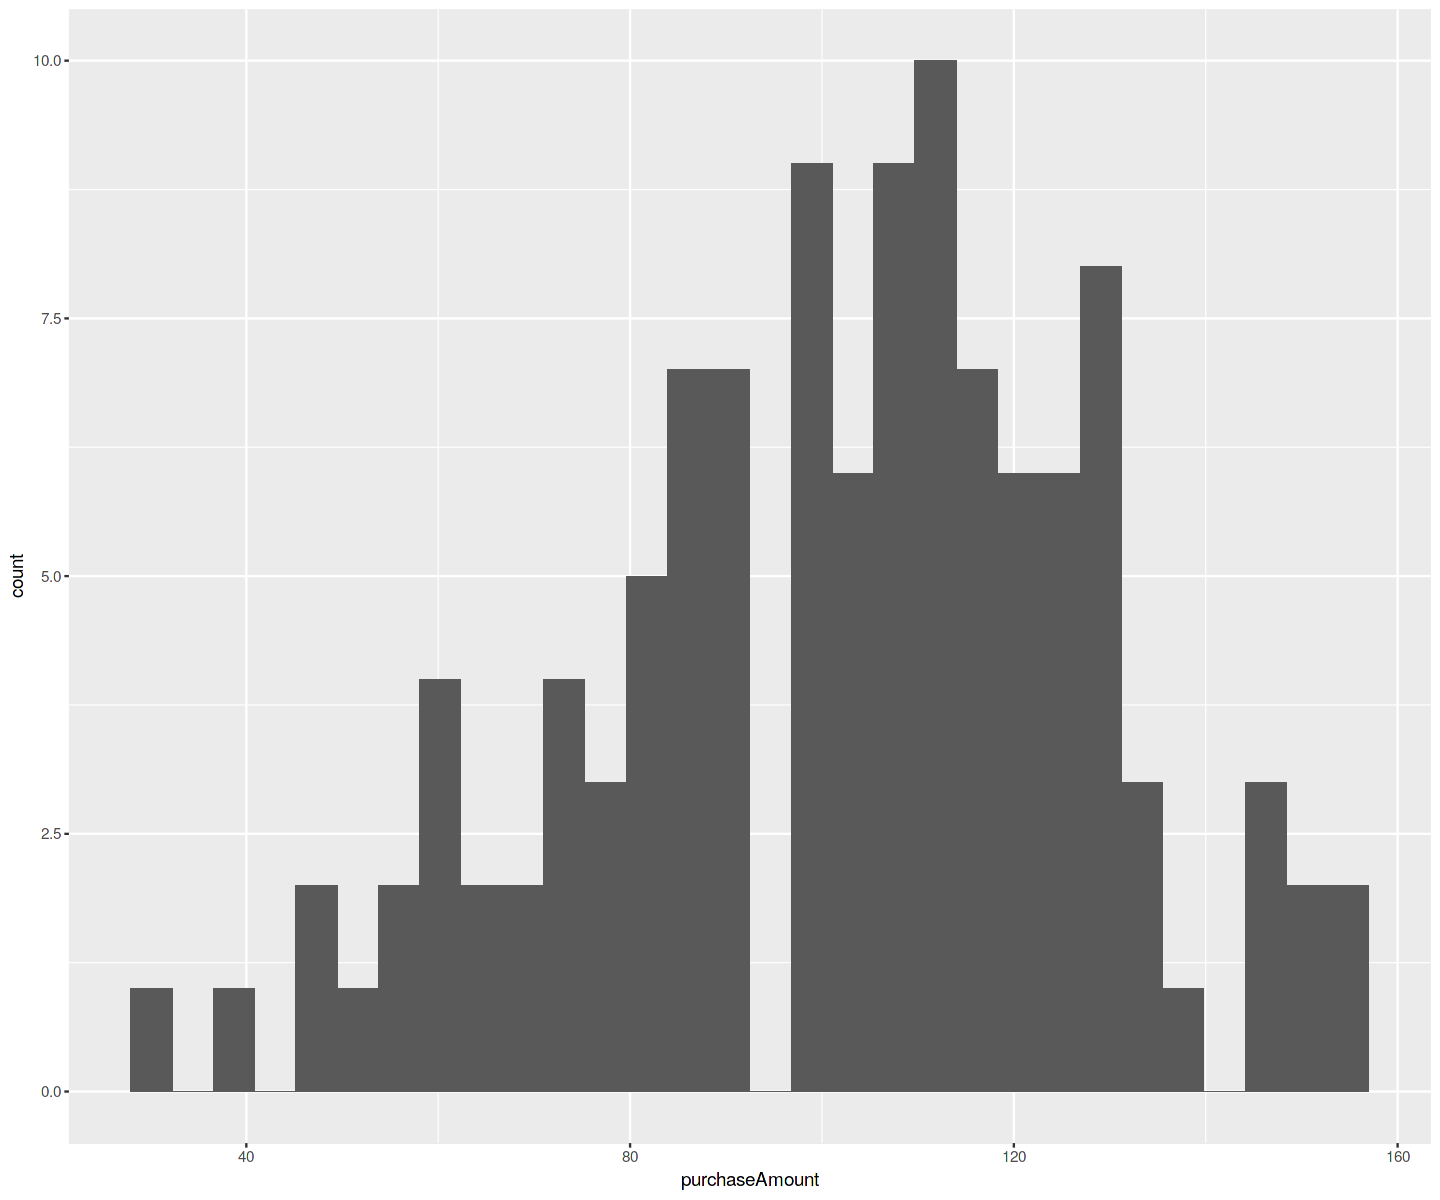

In [52]:
ec%>%
filter(purchaseAmount>0)%>%
ggplot(aes(x=purchaseAmount))+
geom_histogram(bindwidth=0.1)

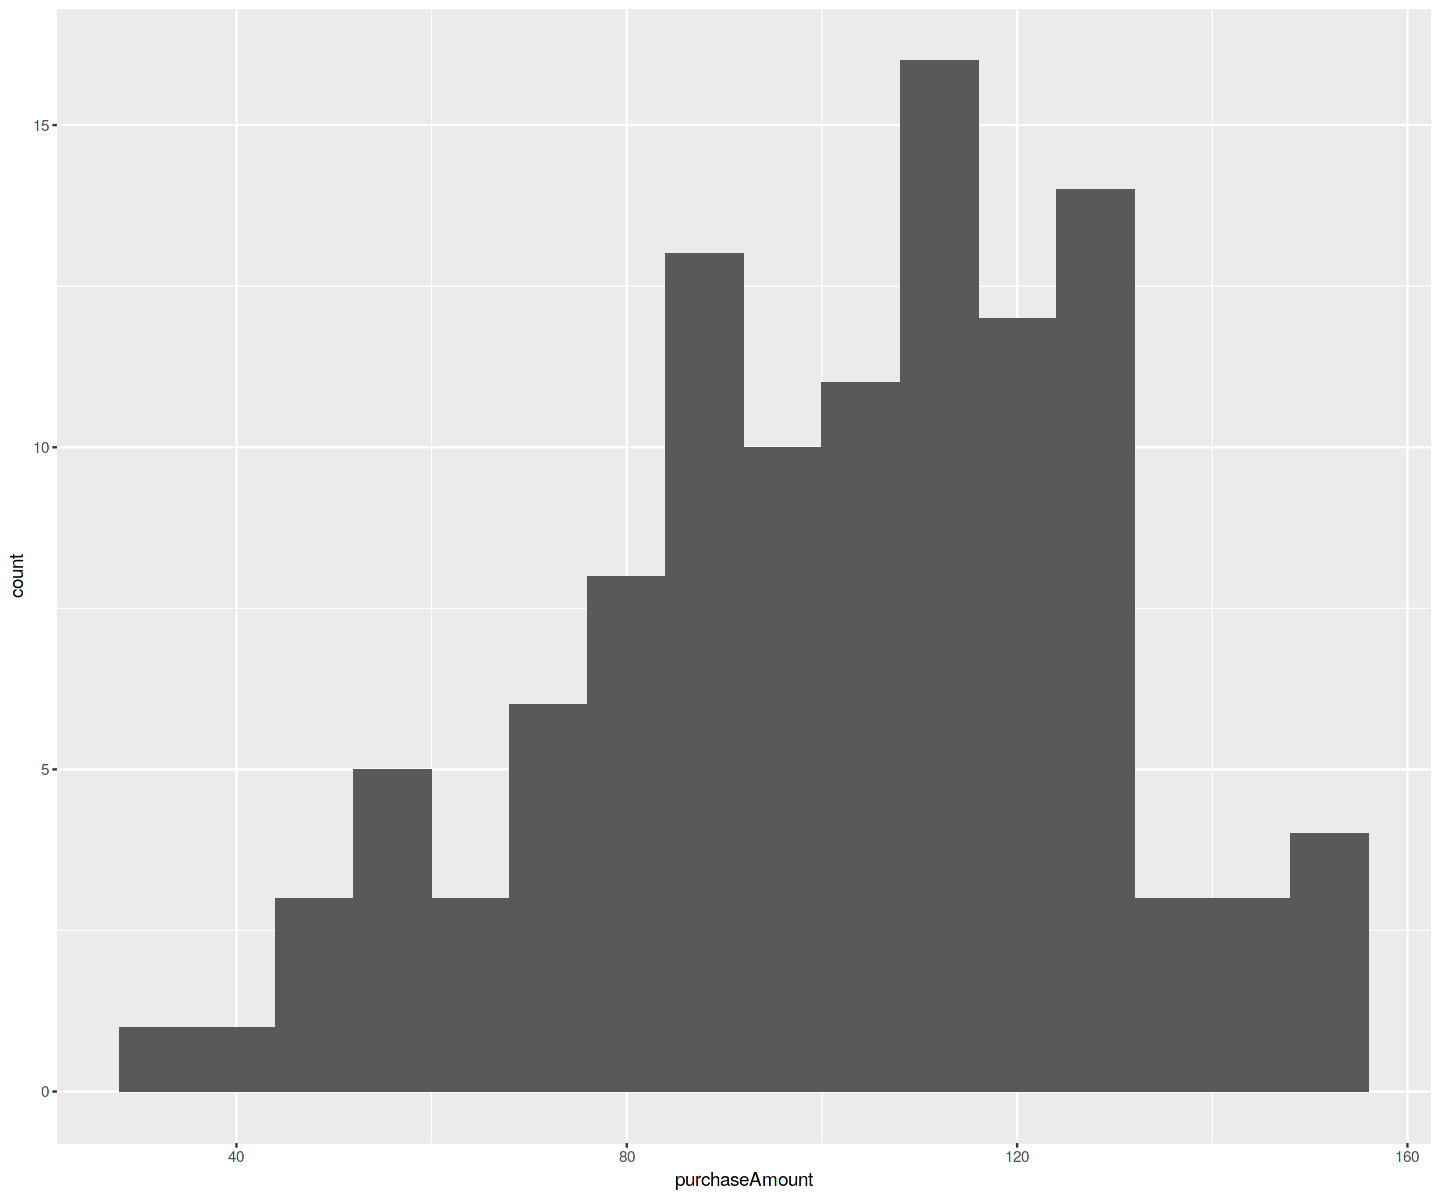

In [53]:
ec%>%
filter(purchaseAmount>0)%>%
ggplot(aes(x=purchaseAmount))+
geom_histogram(binwidth=8)  #mean which where can predict the future purchases would be
#histogram is one way to look at the pattern to predict the future
#binwidth 20 is not granular enough 
#using a binwidth of 8 shows most of people are between 80 to 120. we can predict values between this for the future.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



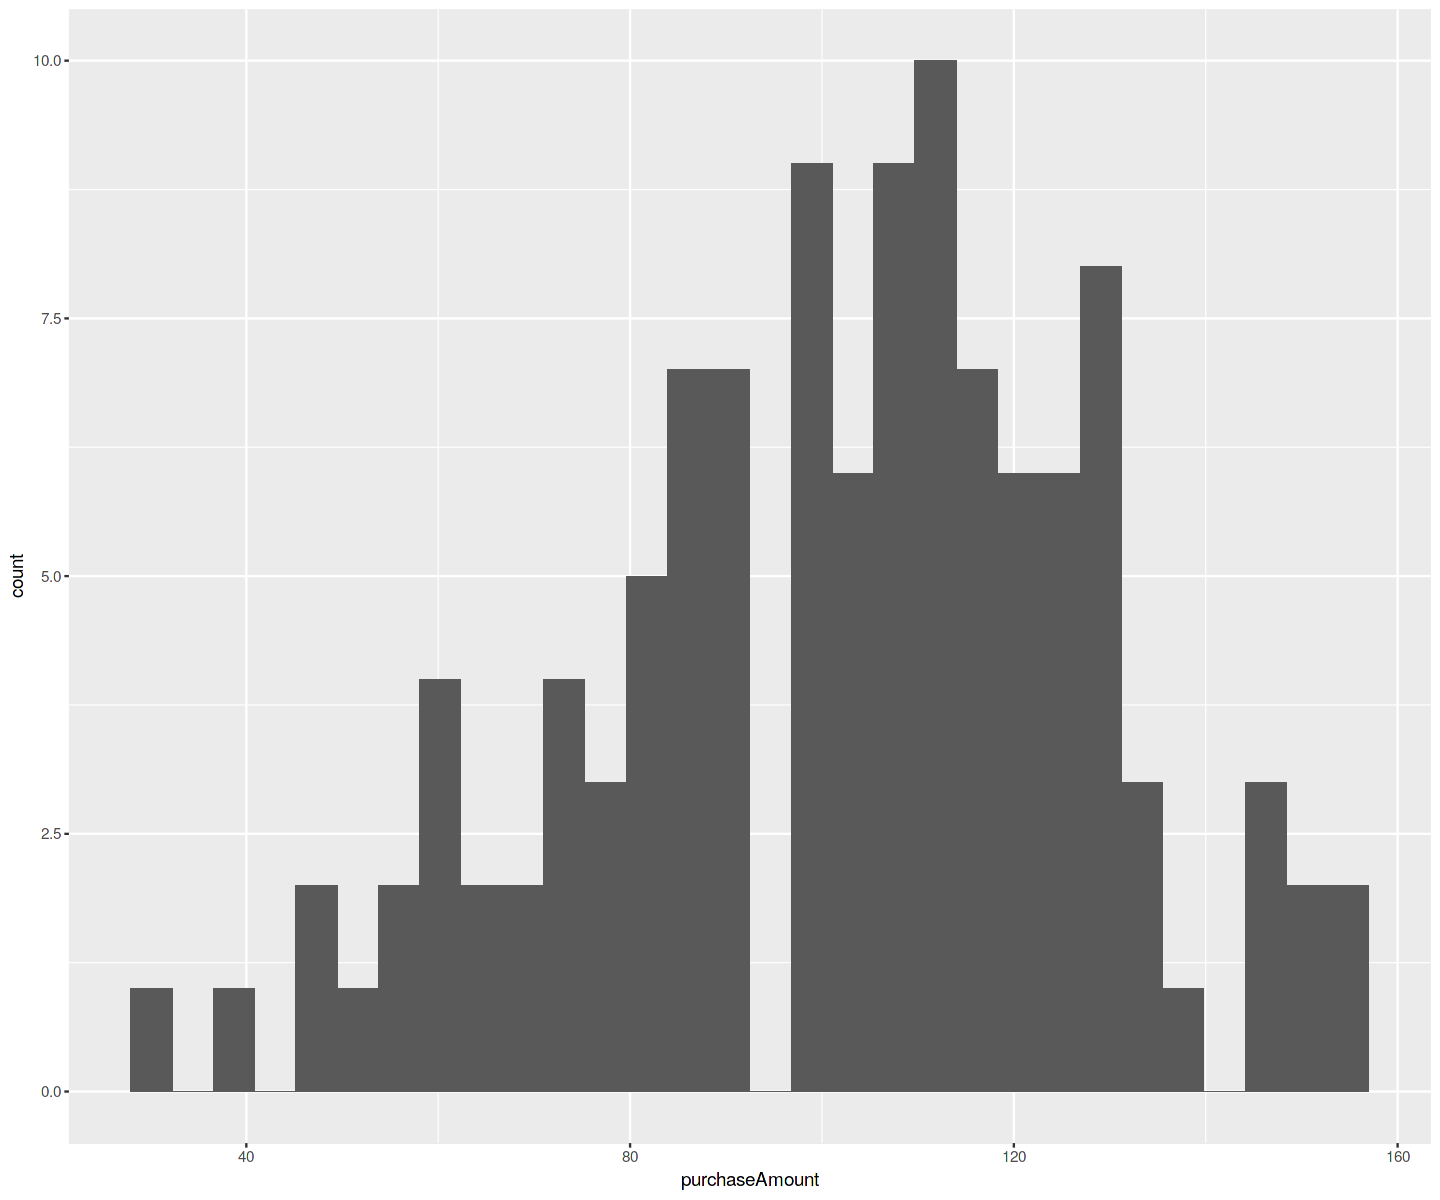

In [54]:
ec%>%
filter(purchaseAmount>0)%>%
ggplot(aes(x=purchaseAmount))+
geom_histogram()

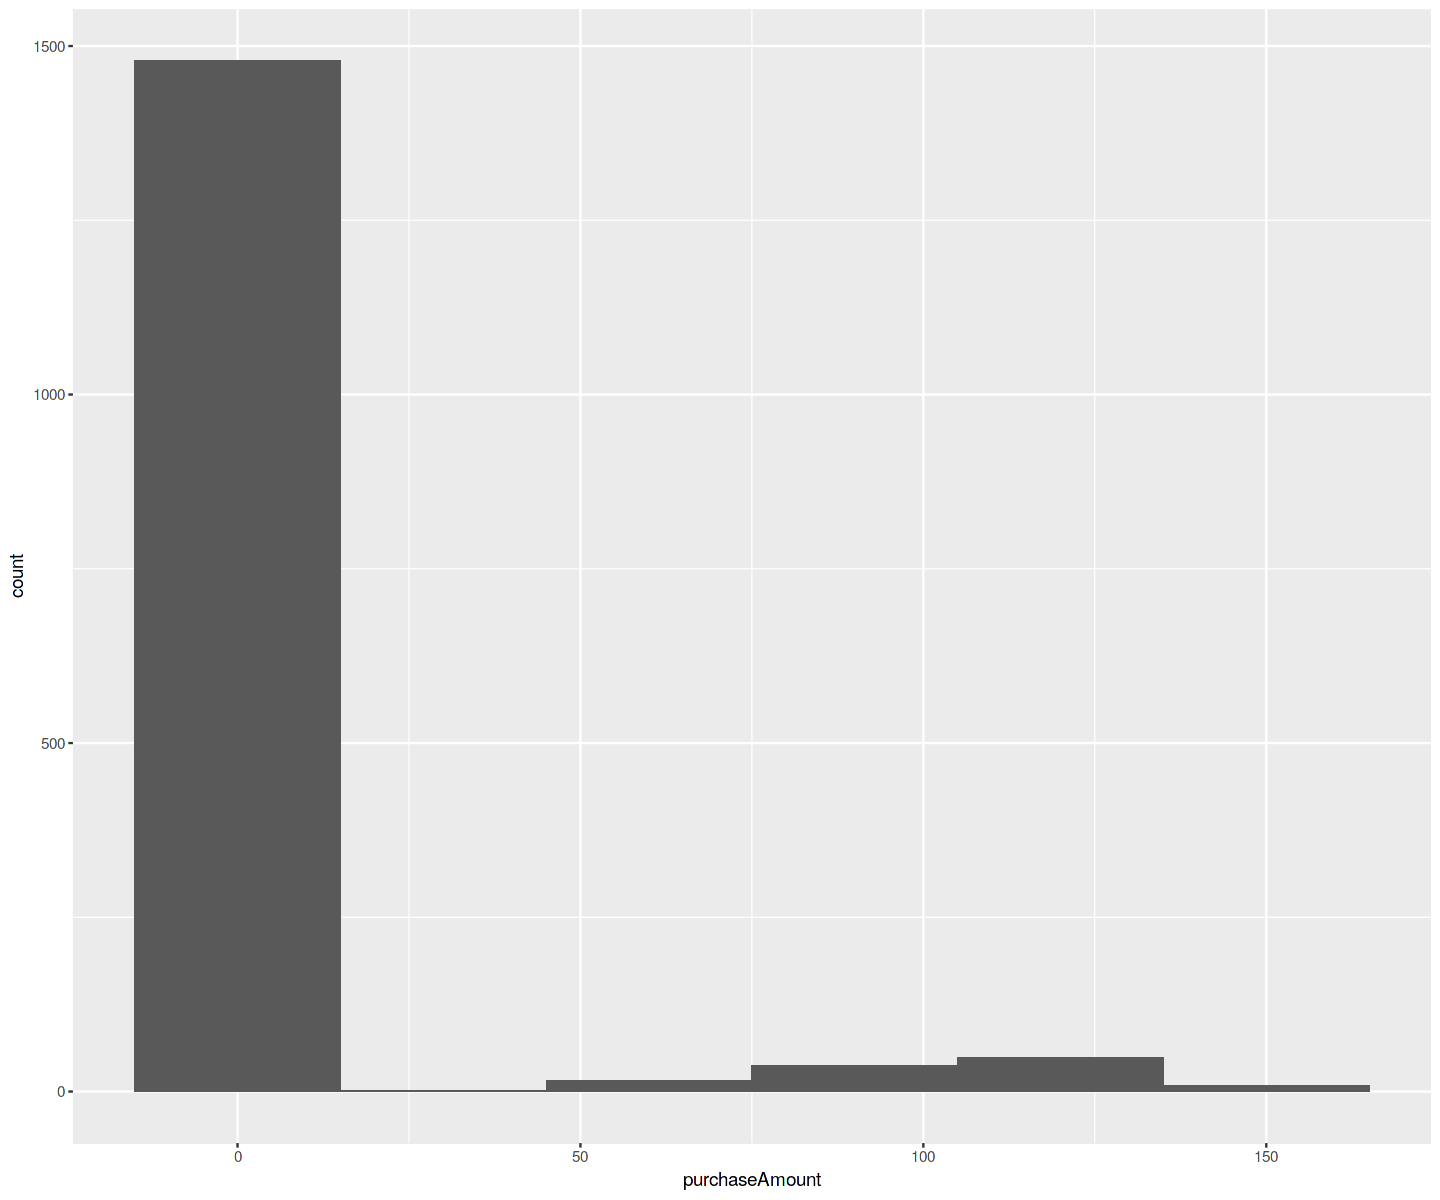

In [55]:
ec%>%
ggplot(aes(x=purchaseAmount))+
geom_histogram(binwidth=30)

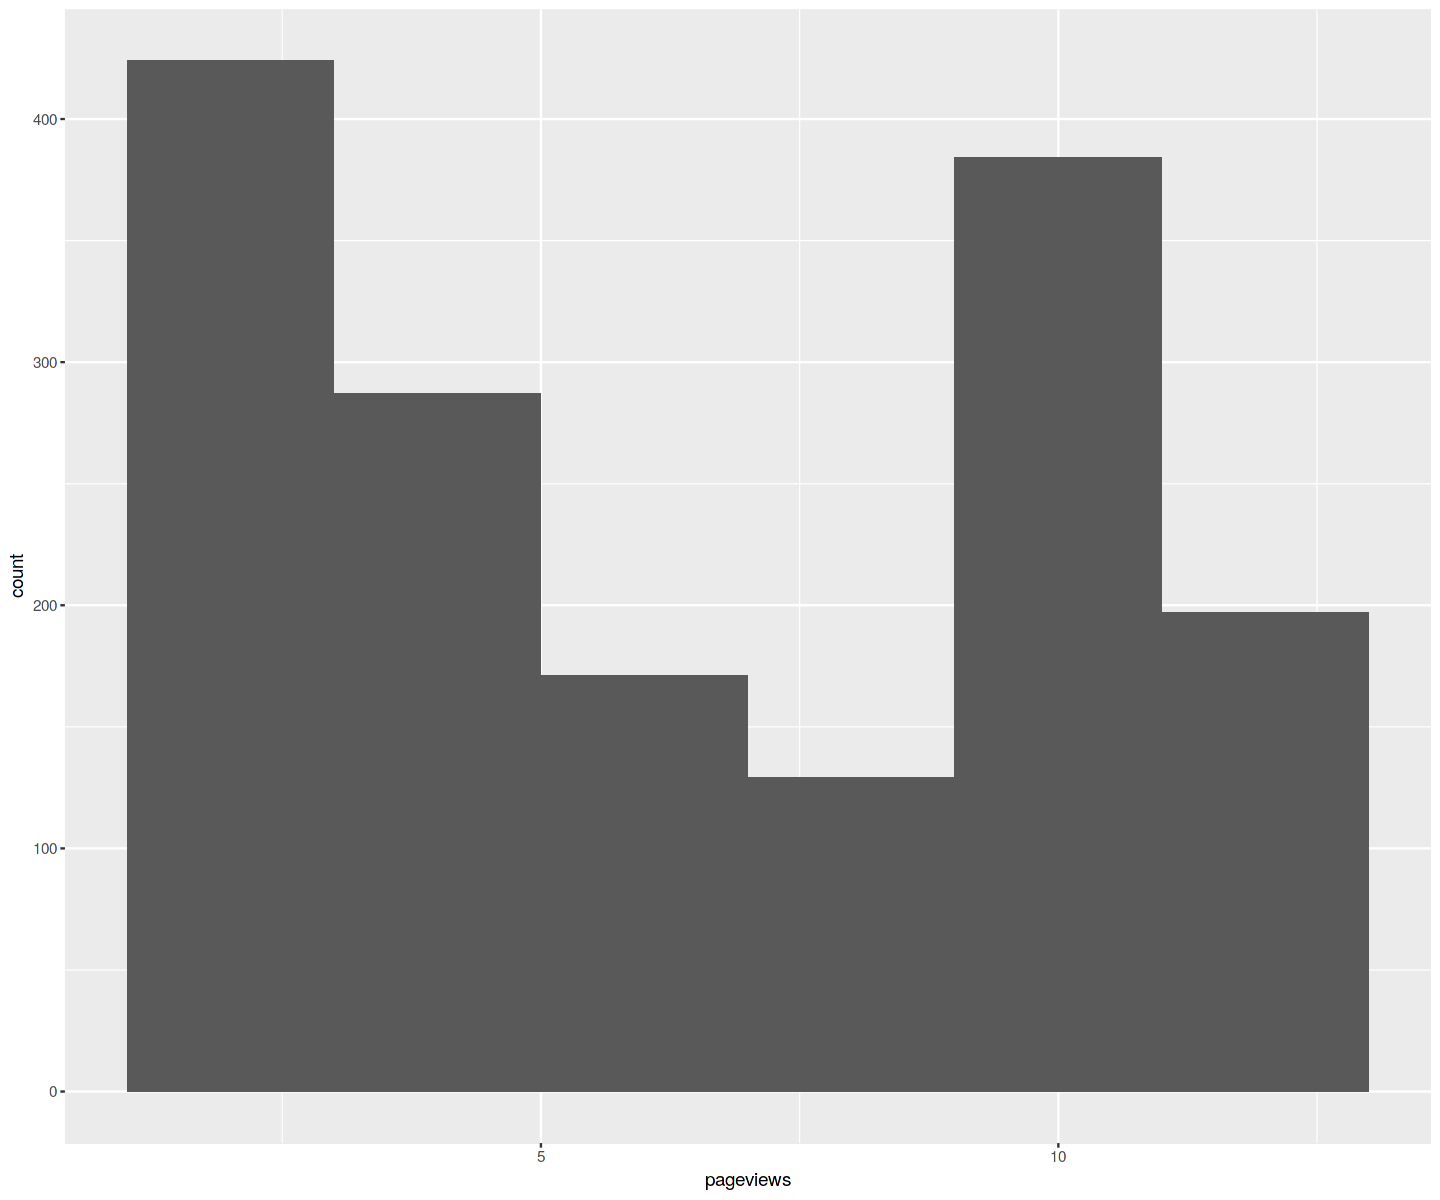

In [56]:
#How is the data different for a 'pageviews' histogram different from the one for purchase amount?
#Does adding 'bindwidth=2' to geom_histogram change your observation?
#There are two humps and changing bindwidth does not change the shape of curve
ec%>%
ggplot(aes(x=pageviews))+
geom_histogram(binwidth=2)

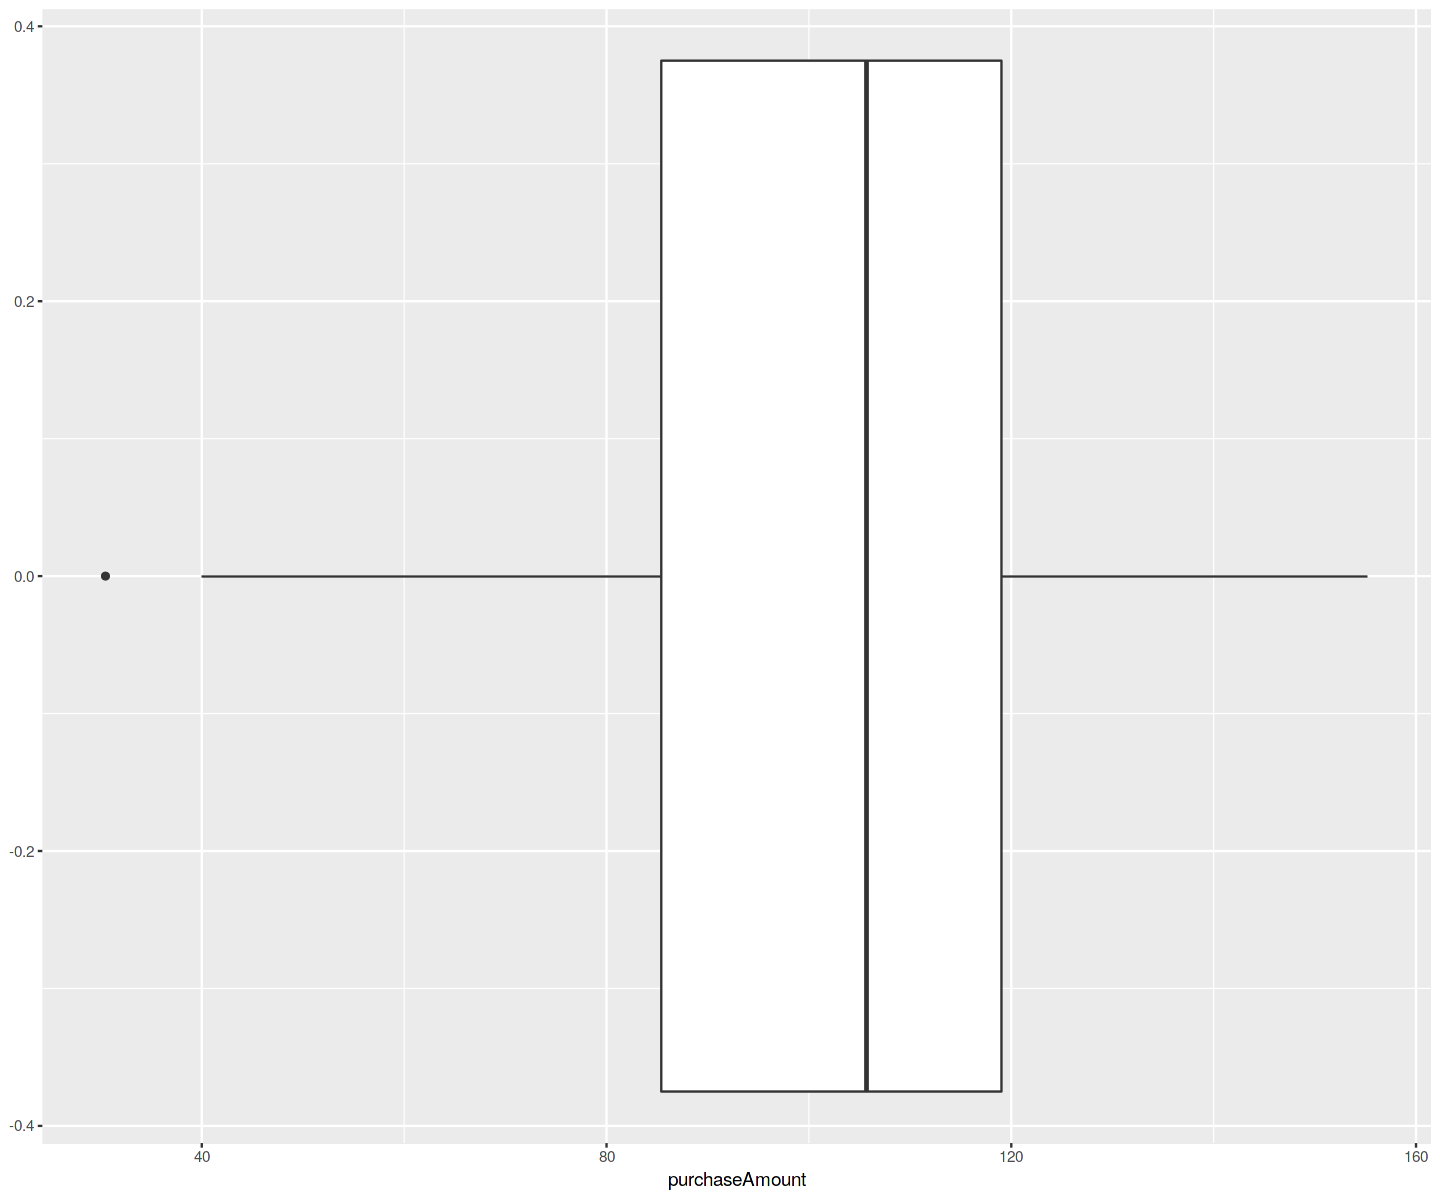

In [59]:
ec%>%
filter(purchaseAmount>0)%>%
ggplot(aes(x=purchaseAmount))+
geom_boxplot()

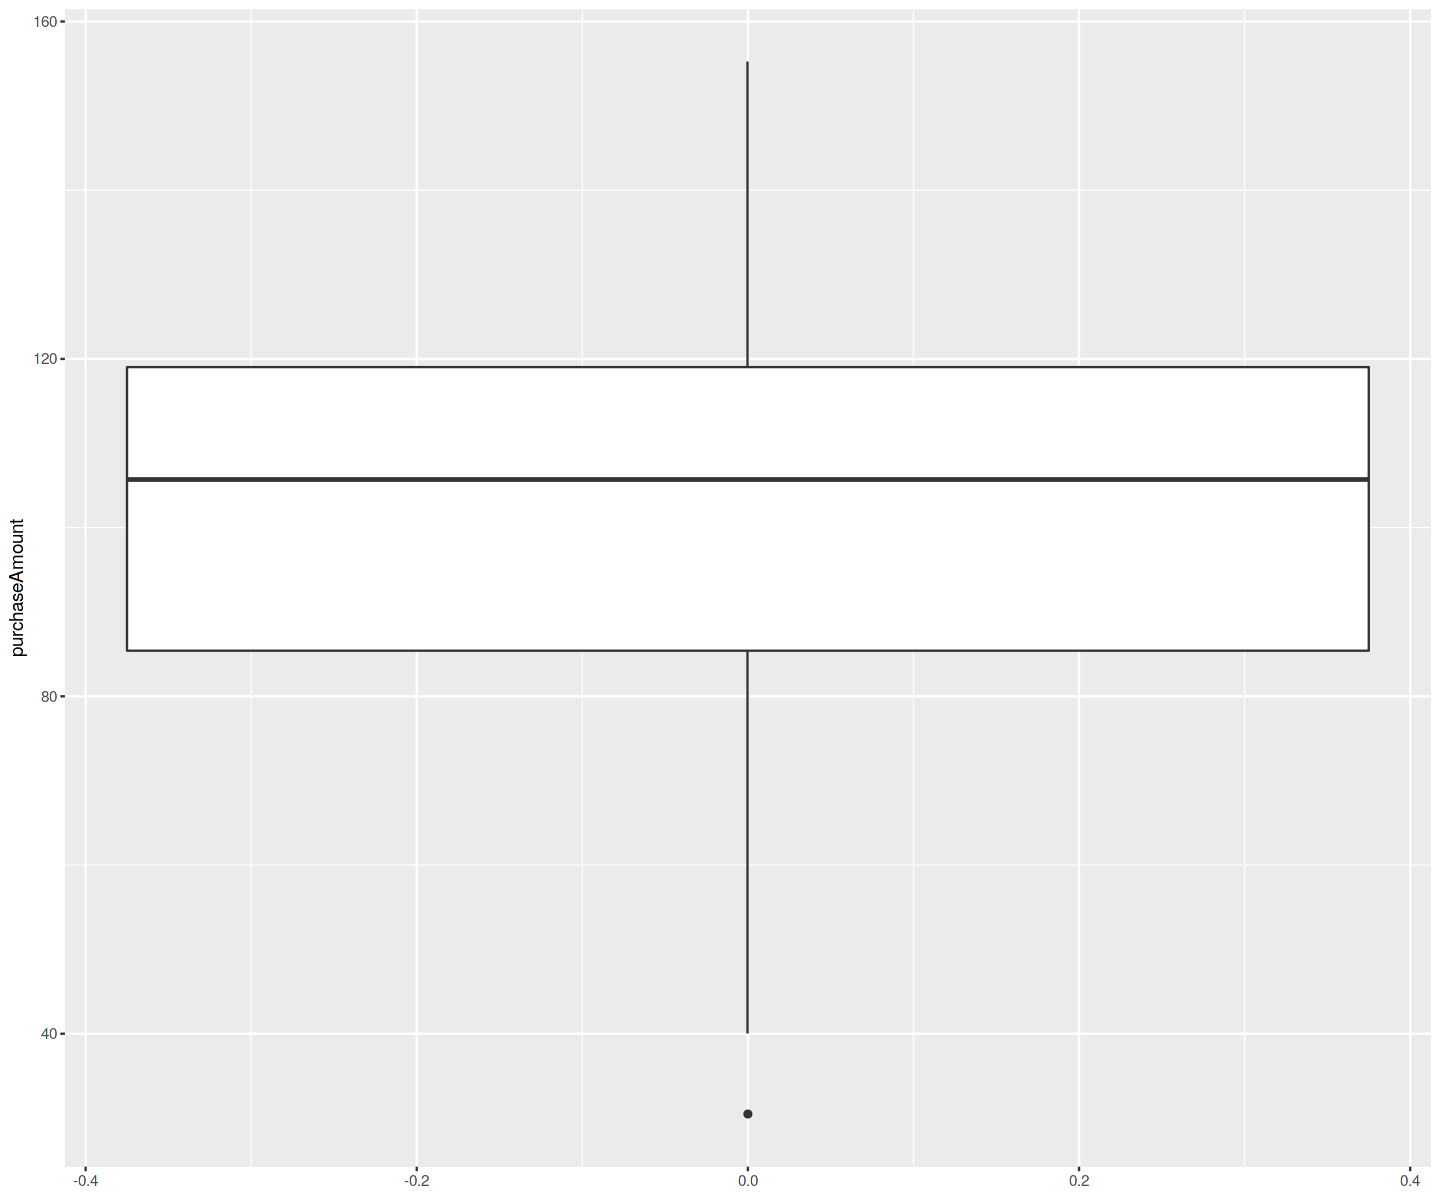

In [60]:
ec%>%
filter(purchaseAmount>0)%>%
ggplot(aes(x=purchaseAmount))+
geom_boxplot()+coord_flip()

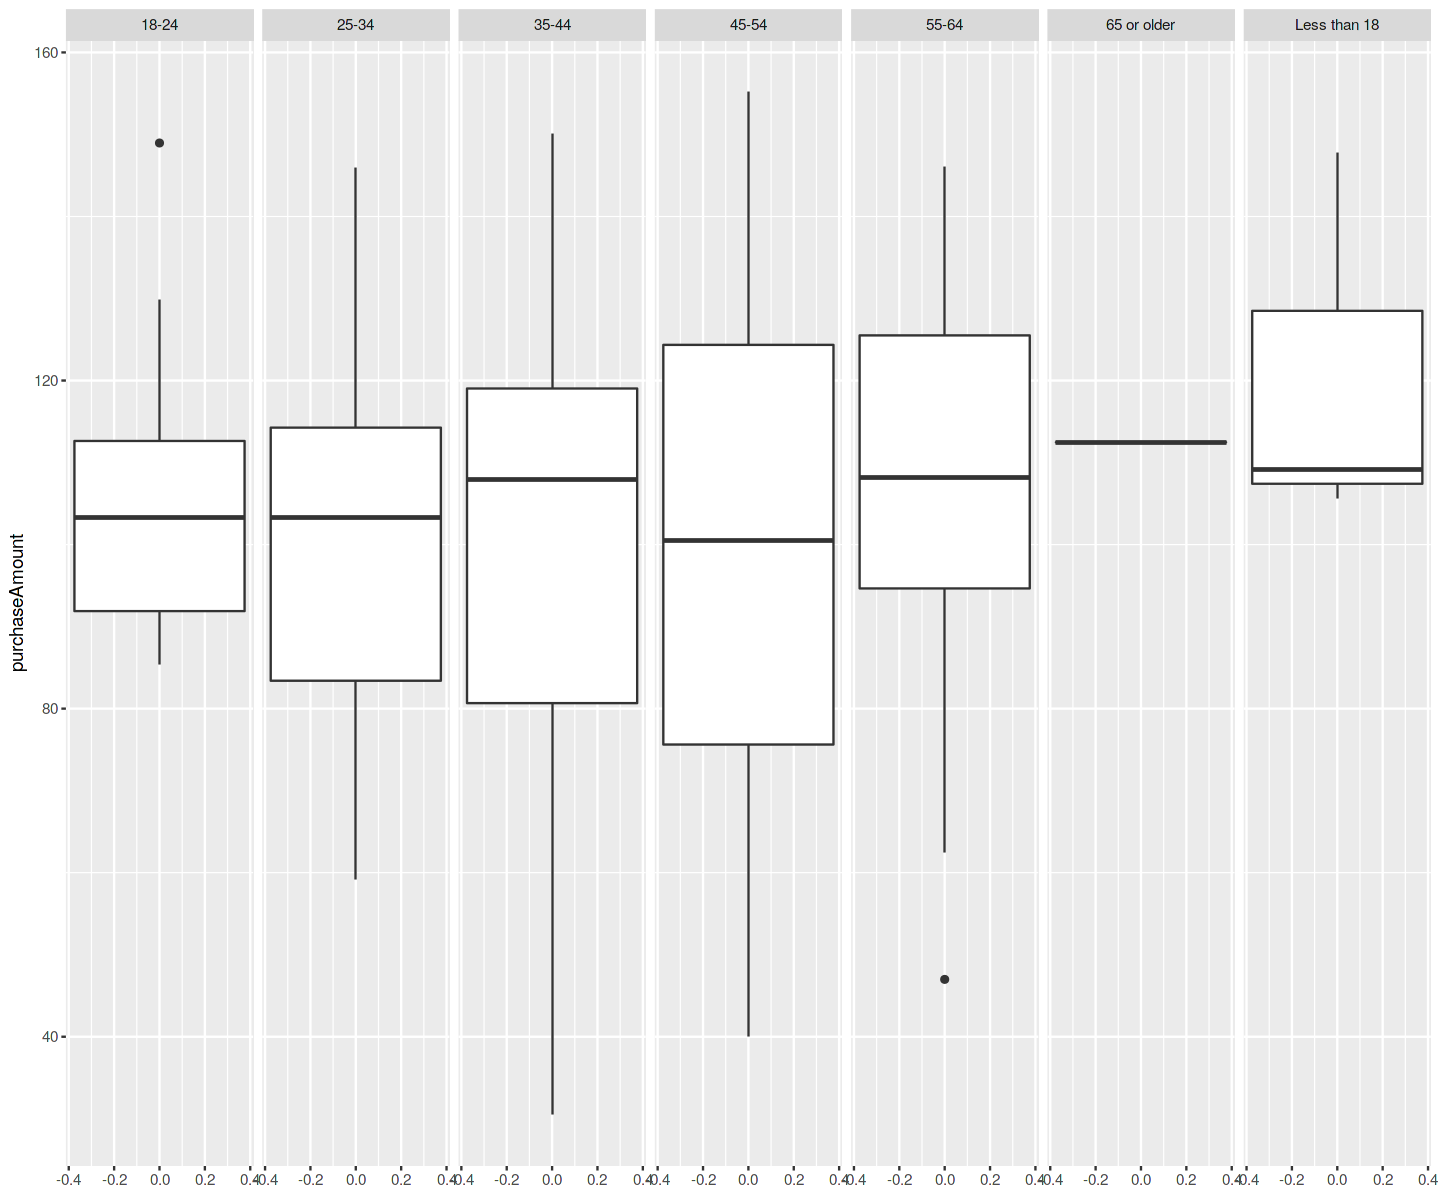

In [124]:
#Boxplot of purchased amount across age groups
ec%>%
filter(purchaseAmount>0)%>%
ggplot(aes(x=purchaseAmount))+
geom_boxplot()+coord_flip()+
facet_wrap(~age,ncol=7)

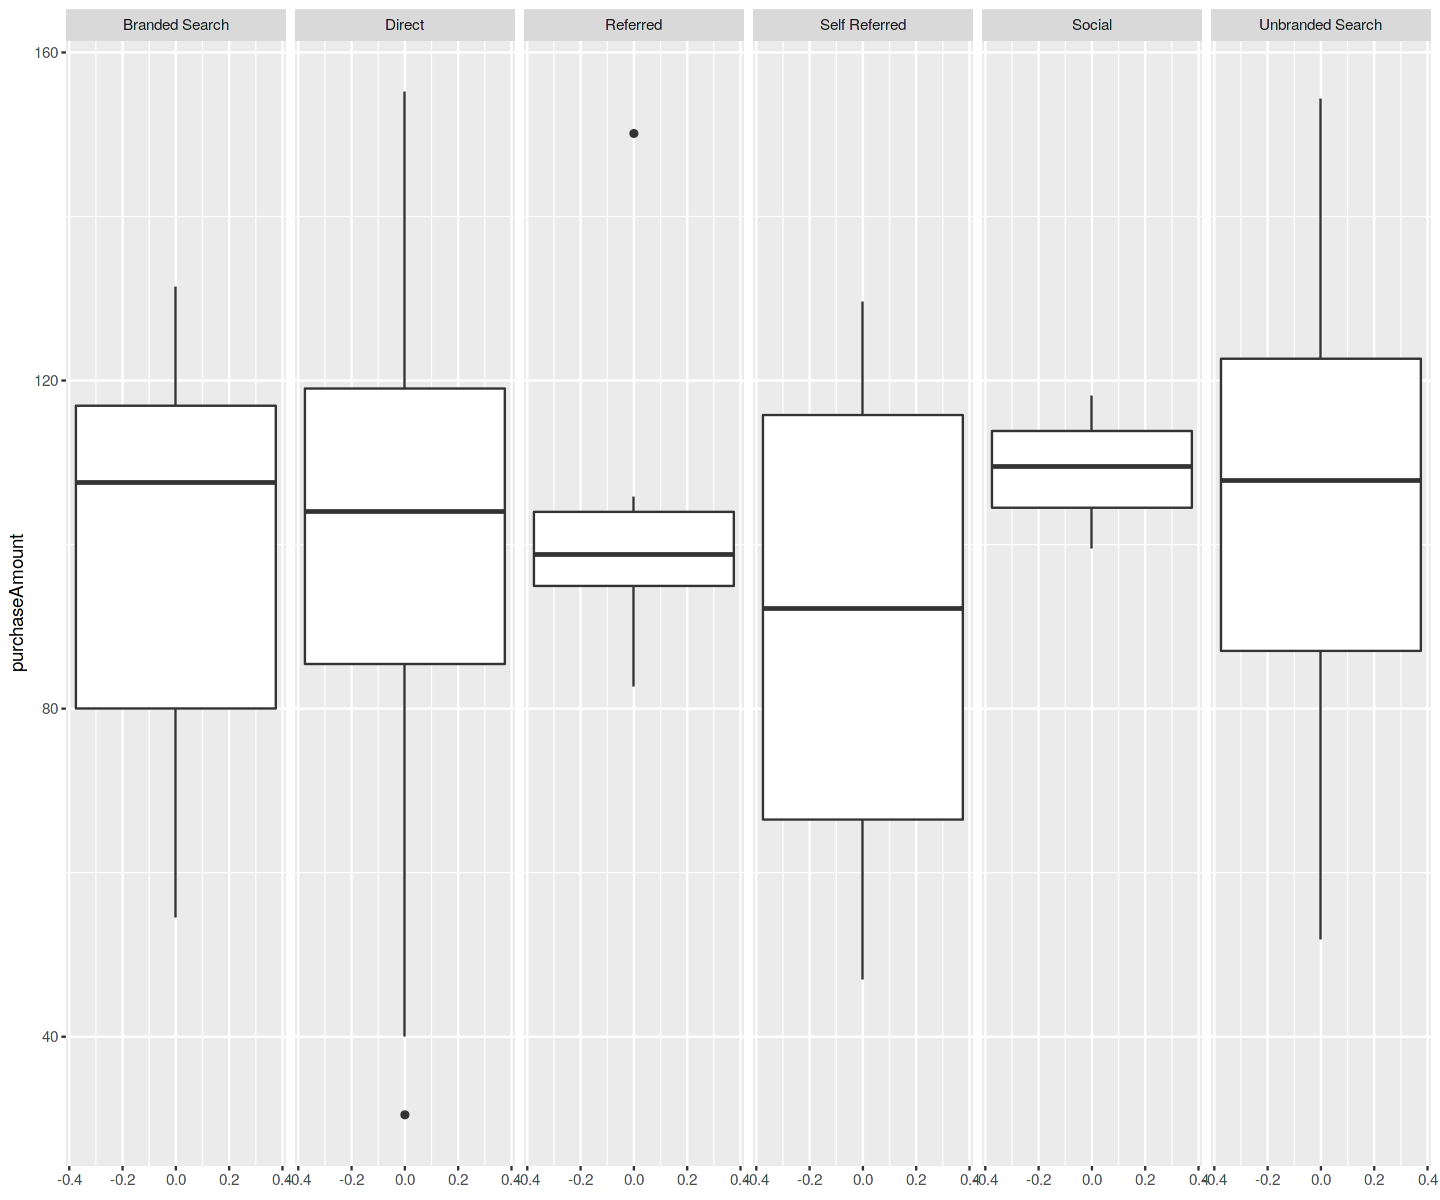

In [123]:
#Which referral channel has the widest IQR (biggest white box) of purchase amounts?
#Answer is self-referrals
ec%>% 
filter(purchaseAmount>0)%>%
ggplot(aes(x=purchaseAmount))+
geom_boxplot()+coord_flip()+
facet_wrap(~referral,ncol=7)

In [63]:
ec%>%
group_by(date=date(date_col))%>%
summarize(
    visitors=n(),
    pageviews=sum(pageviews),
          revenue=sum(purchaseAmount))->ec_ts
head(ec_ts)

date,visitors,pageviews,revenue
<date>,<int>,<dbl>,<dbl>
2014-07-25,4,28,0.00
2014-07-26,10,68,0.00
2014-07-27,10,72,99.48
2014-07-28,28,205,340.41
2014-07-29,66,383,388.93
2014-07-30,57,360,361.47


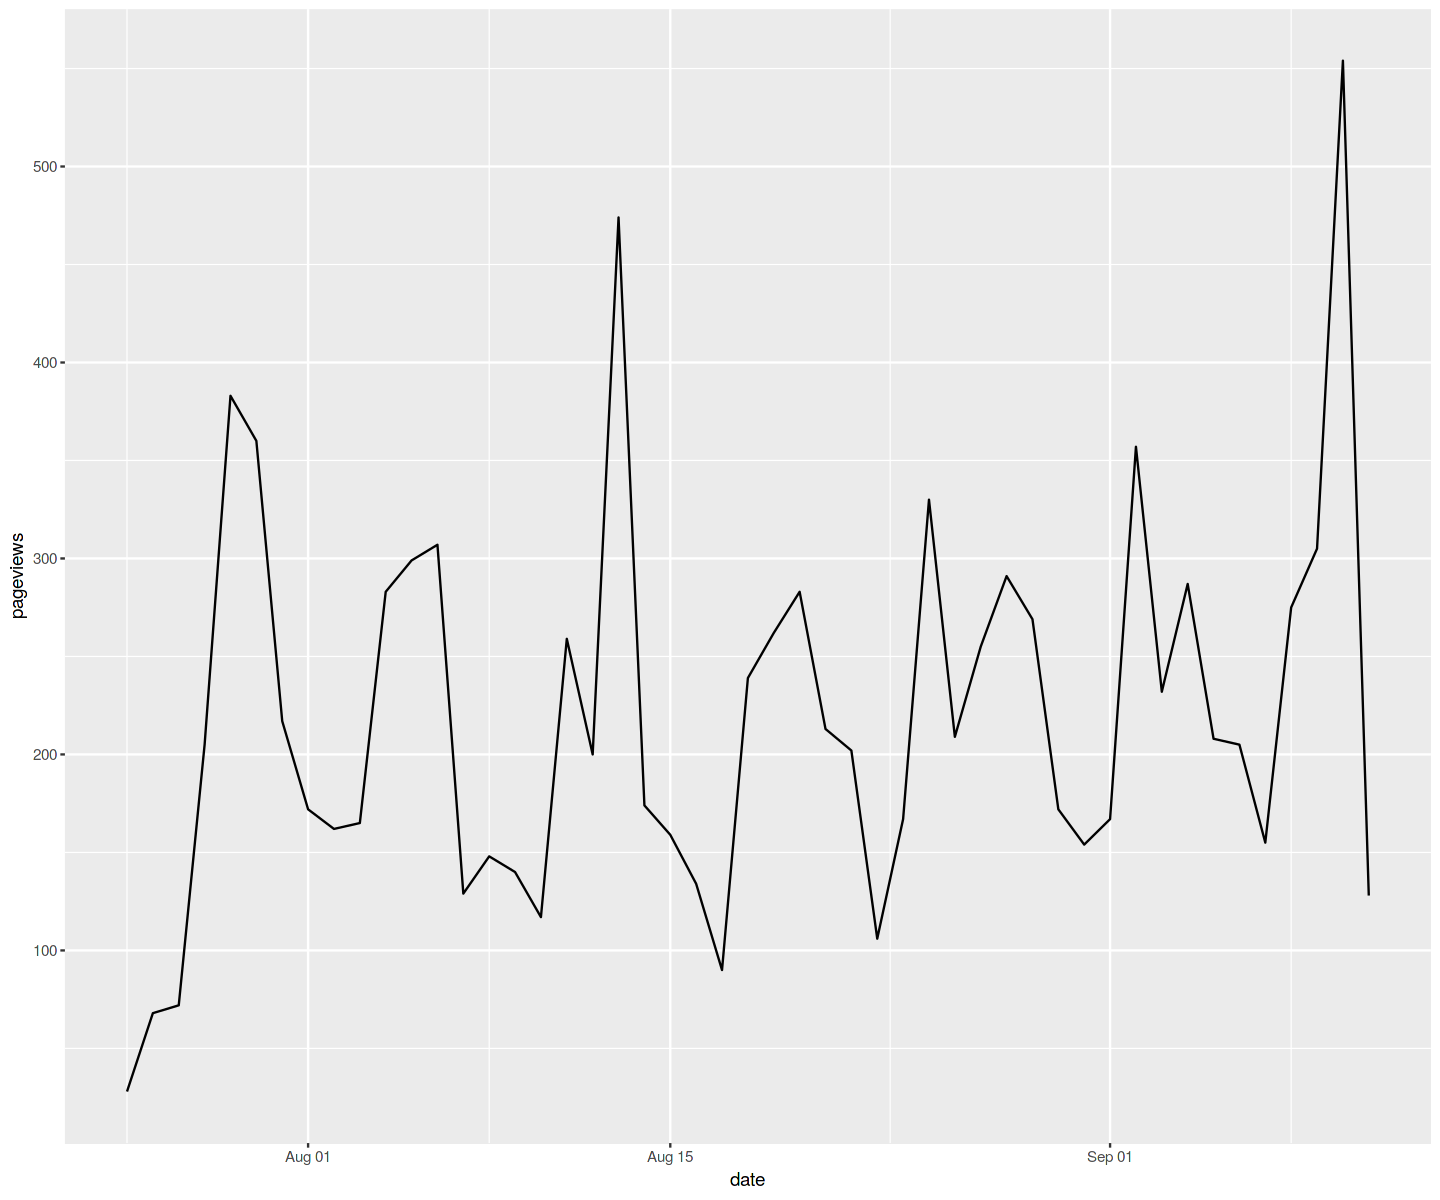

In [64]:
ec_ts%>%
ggplot(aes(x=date,
           y=pageviews))+
geom_line()

`geom_smooth()` using formula 'y ~ x'



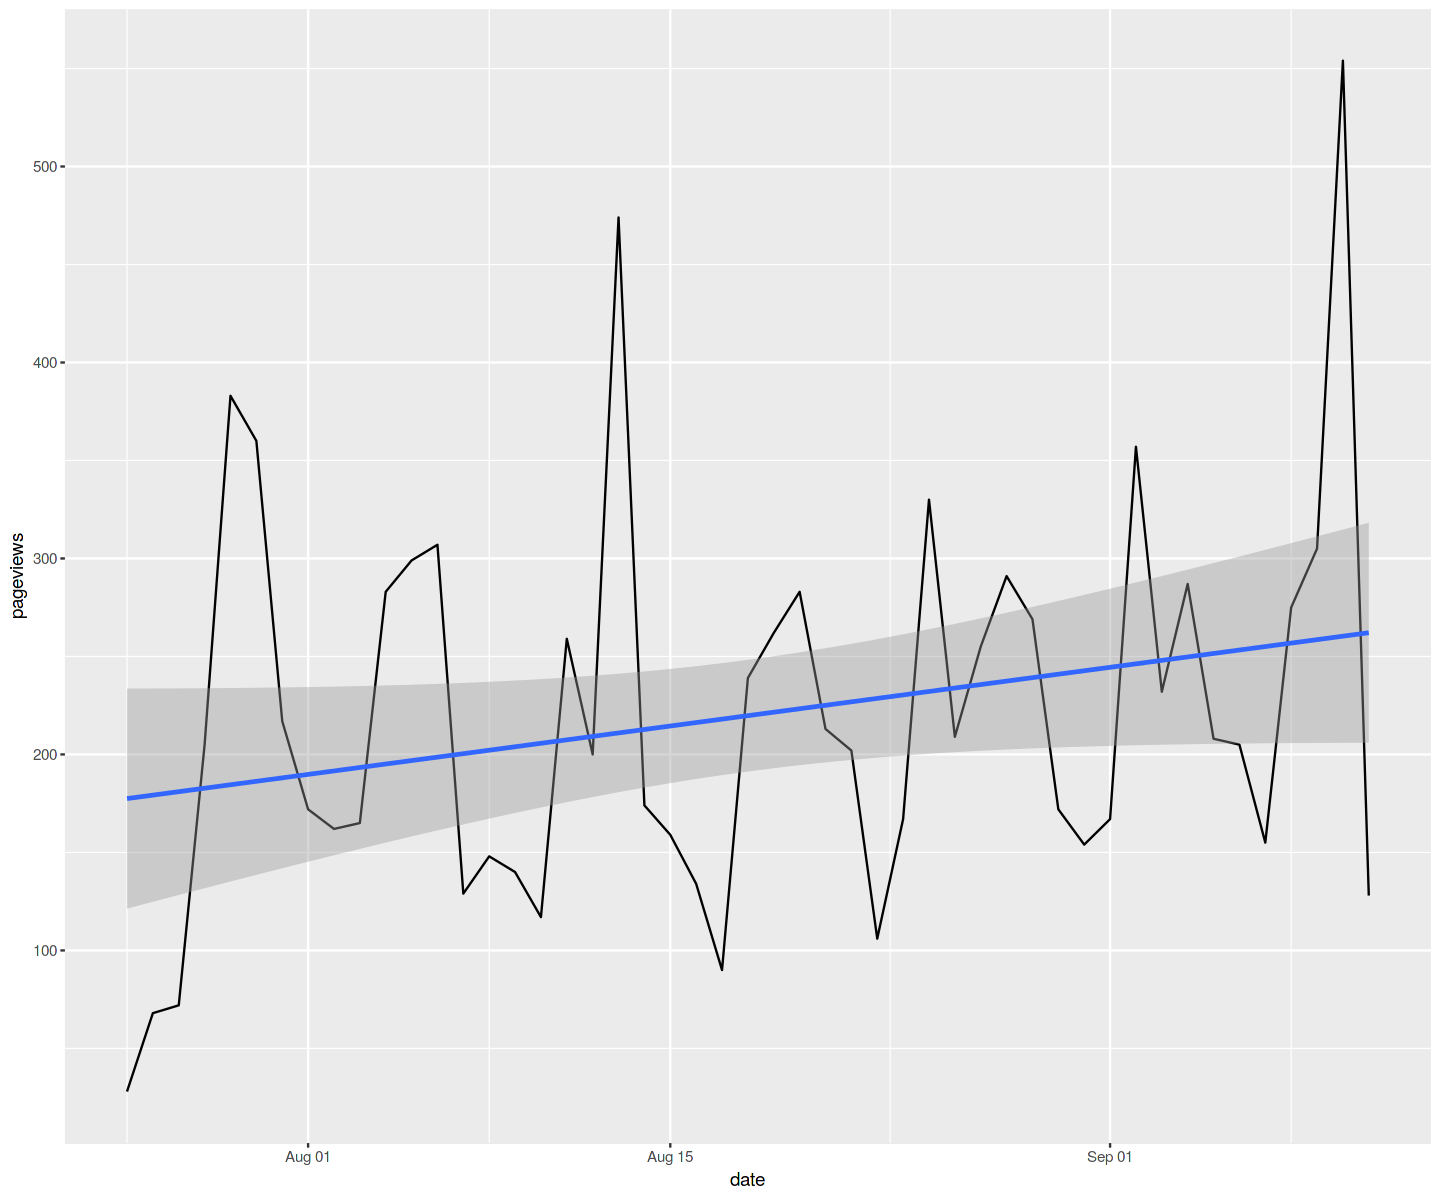

In [65]:
#Add a trend line
ec_ts%>%
ggplot(aes(x=date,
           y=pageviews))+
geom_line()+
geom_smooth(method='lm') 
#it shows the grey band on uncertainty. (it automatically adds it). 
#thicker line more uncertain and thinner grey band is more certain.

`geom_smooth()` using formula 'y ~ x'



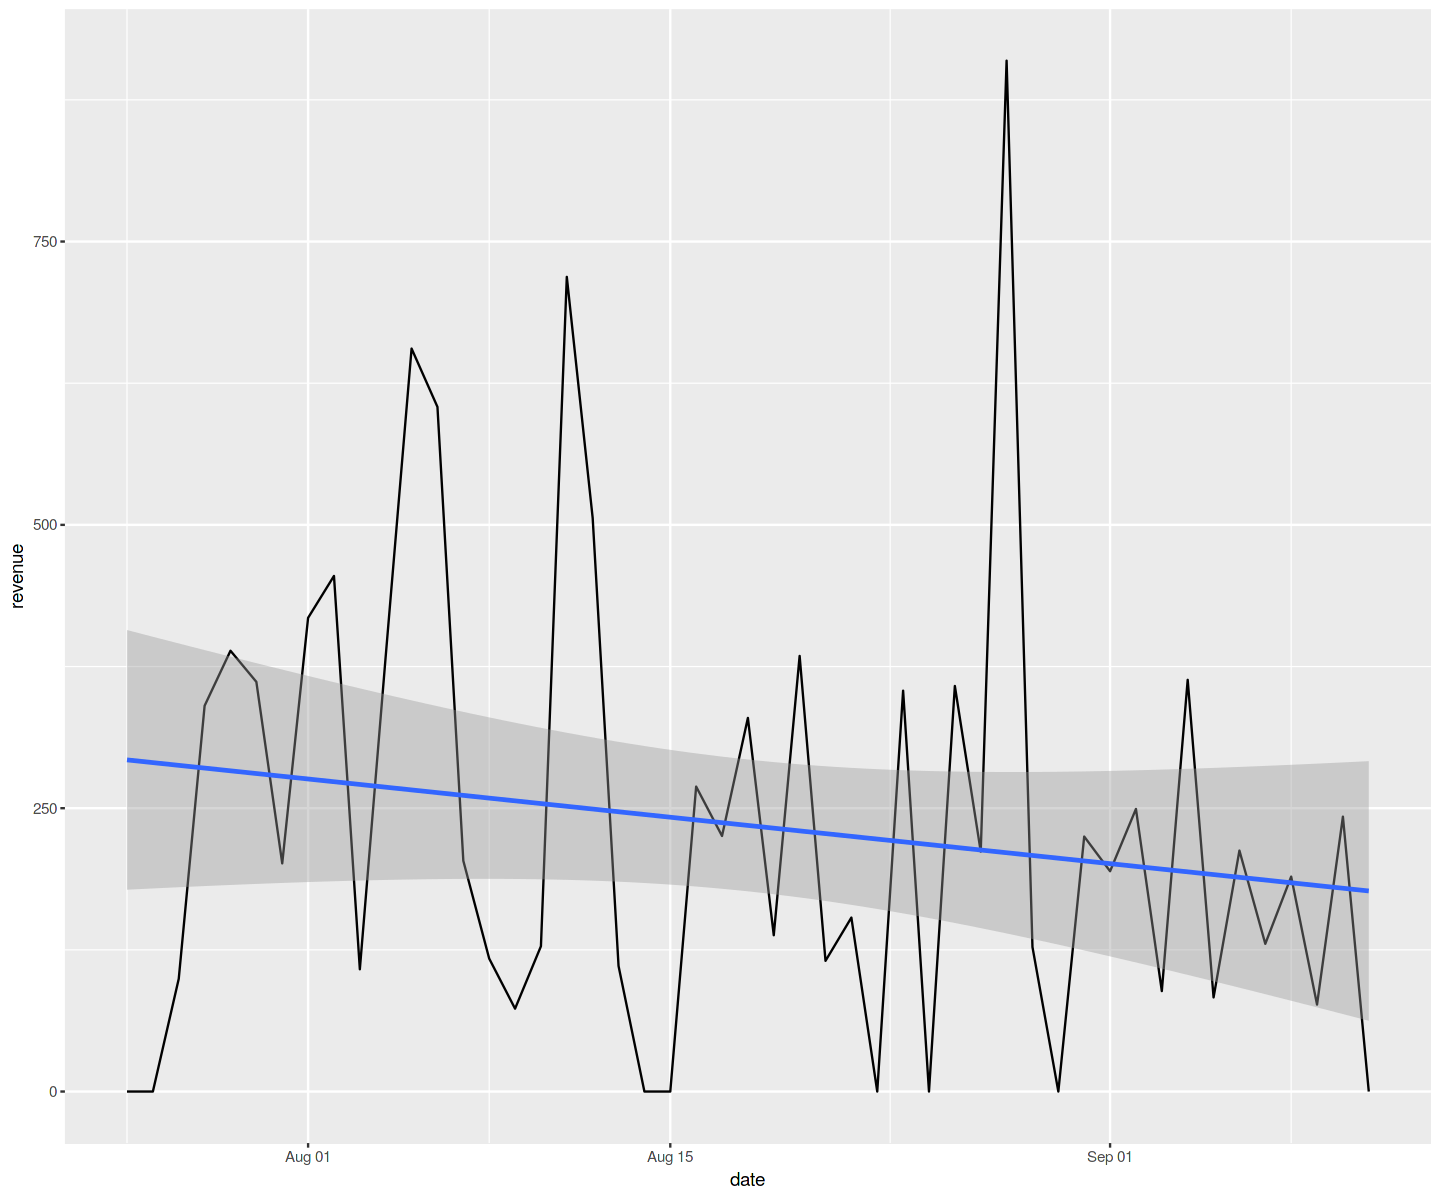

In [66]:
# What did the trendline estimate revenue for August 15th would be? 250 
# What was the revenue on August 15th? 0 
# Is the revenue is going up? Does the data support this view? No the trend is downwards
ec_ts%>%
ggplot(aes(x=date,
           y=revenue))+
geom_line()+
geom_smooth(method='lm')

In [67]:
ec%>%
group_by(date(date_col))%>%
summarize(visitors=n(),
          pageviews=sum(pageviews),
          revenue=sum(purchaseAmount))->ec_pv_r
head(ec_pv_r)

date(date_col),visitors,pageviews,revenue
<date>,<int>,<dbl>,<dbl>
2014-07-25,4,28,0.00
2014-07-26,10,68,0.00
2014-07-27,10,72,99.48
2014-07-28,28,205,340.41
2014-07-29,66,383,388.93
2014-07-30,57,360,361.47


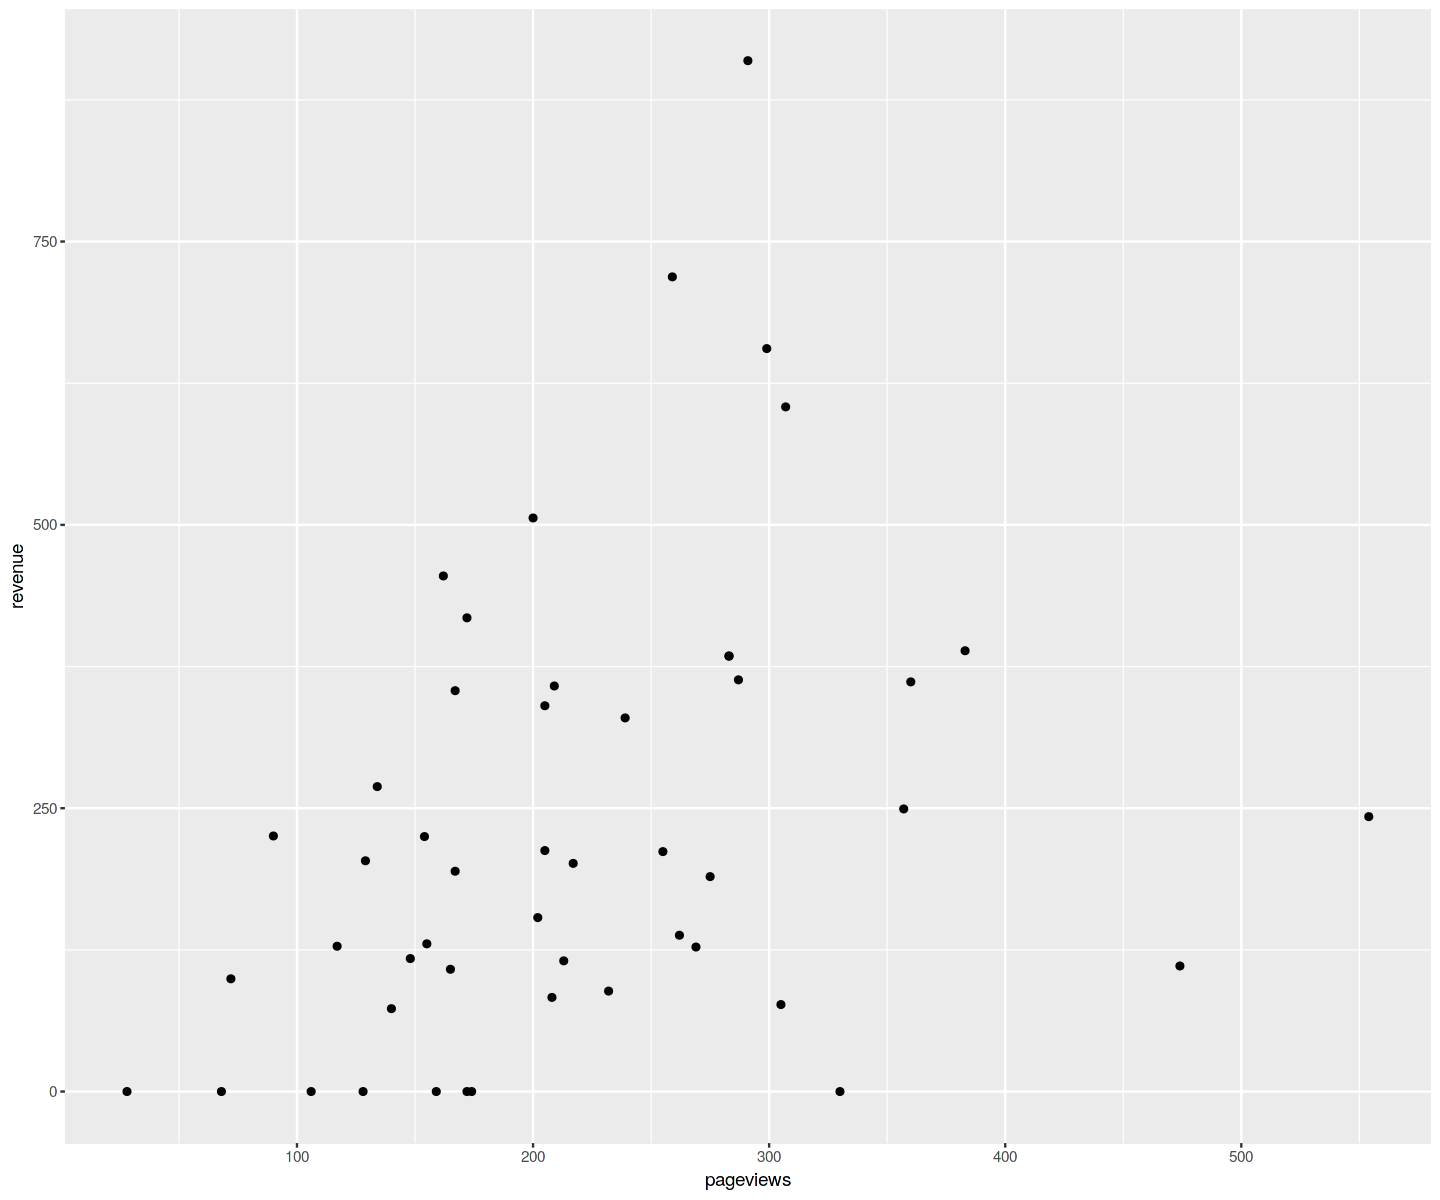

In [68]:
ec_pv_r%>%
ggplot(aes(x=pageviews,
           y=revenue))+
geom_point()

`geom_smooth()` using formula 'y ~ x'



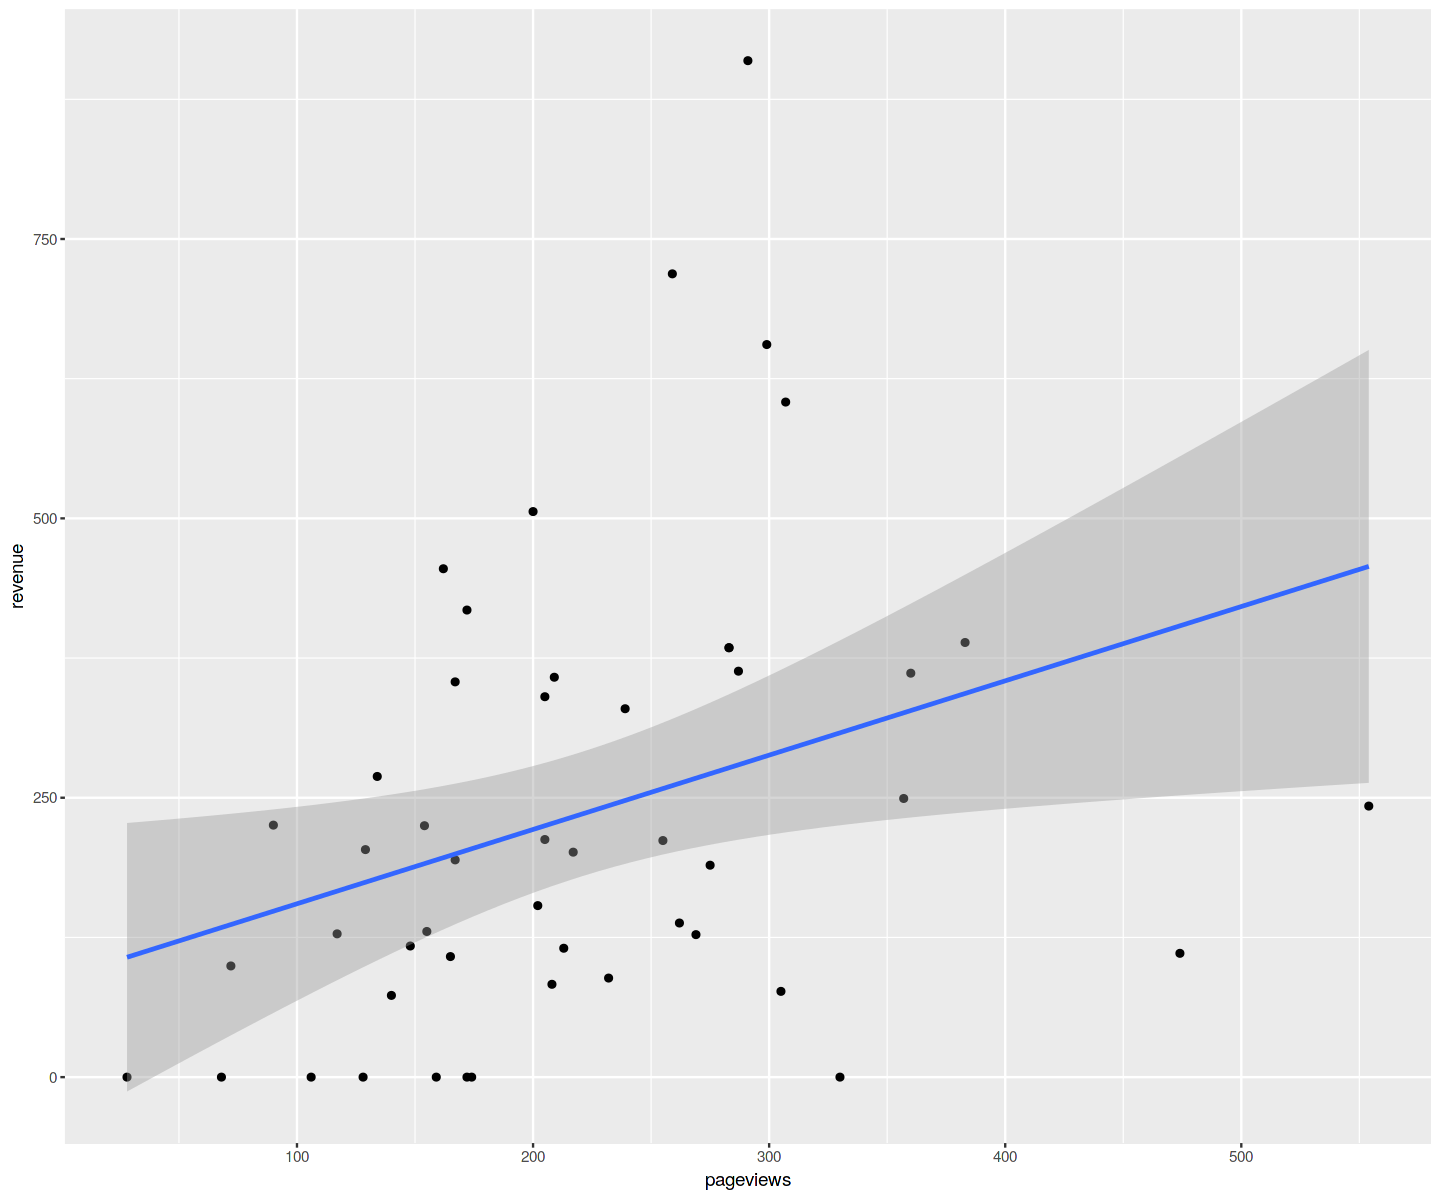

In [69]:
ec_pv_r%>%
ggplot(aes(x=pageviews,
           y=revenue))+
geom_point()+
geom_smooth(method="lm")

#Pageview and revenue and plot trendline
#lm is linear model, line goes up forever, more pageview, more revenue

In [70]:
head(ec_pv_r)

date(date_col),visitors,pageviews,revenue
<date>,<int>,<dbl>,<dbl>
2014-07-25,4,28,0.00
2014-07-26,10,68,0.00
2014-07-27,10,72,99.48
2014-07-28,28,205,340.41
2014-07-29,66,383,388.93
2014-07-30,57,360,361.47


`geom_smooth()` using formula 'y ~ x'



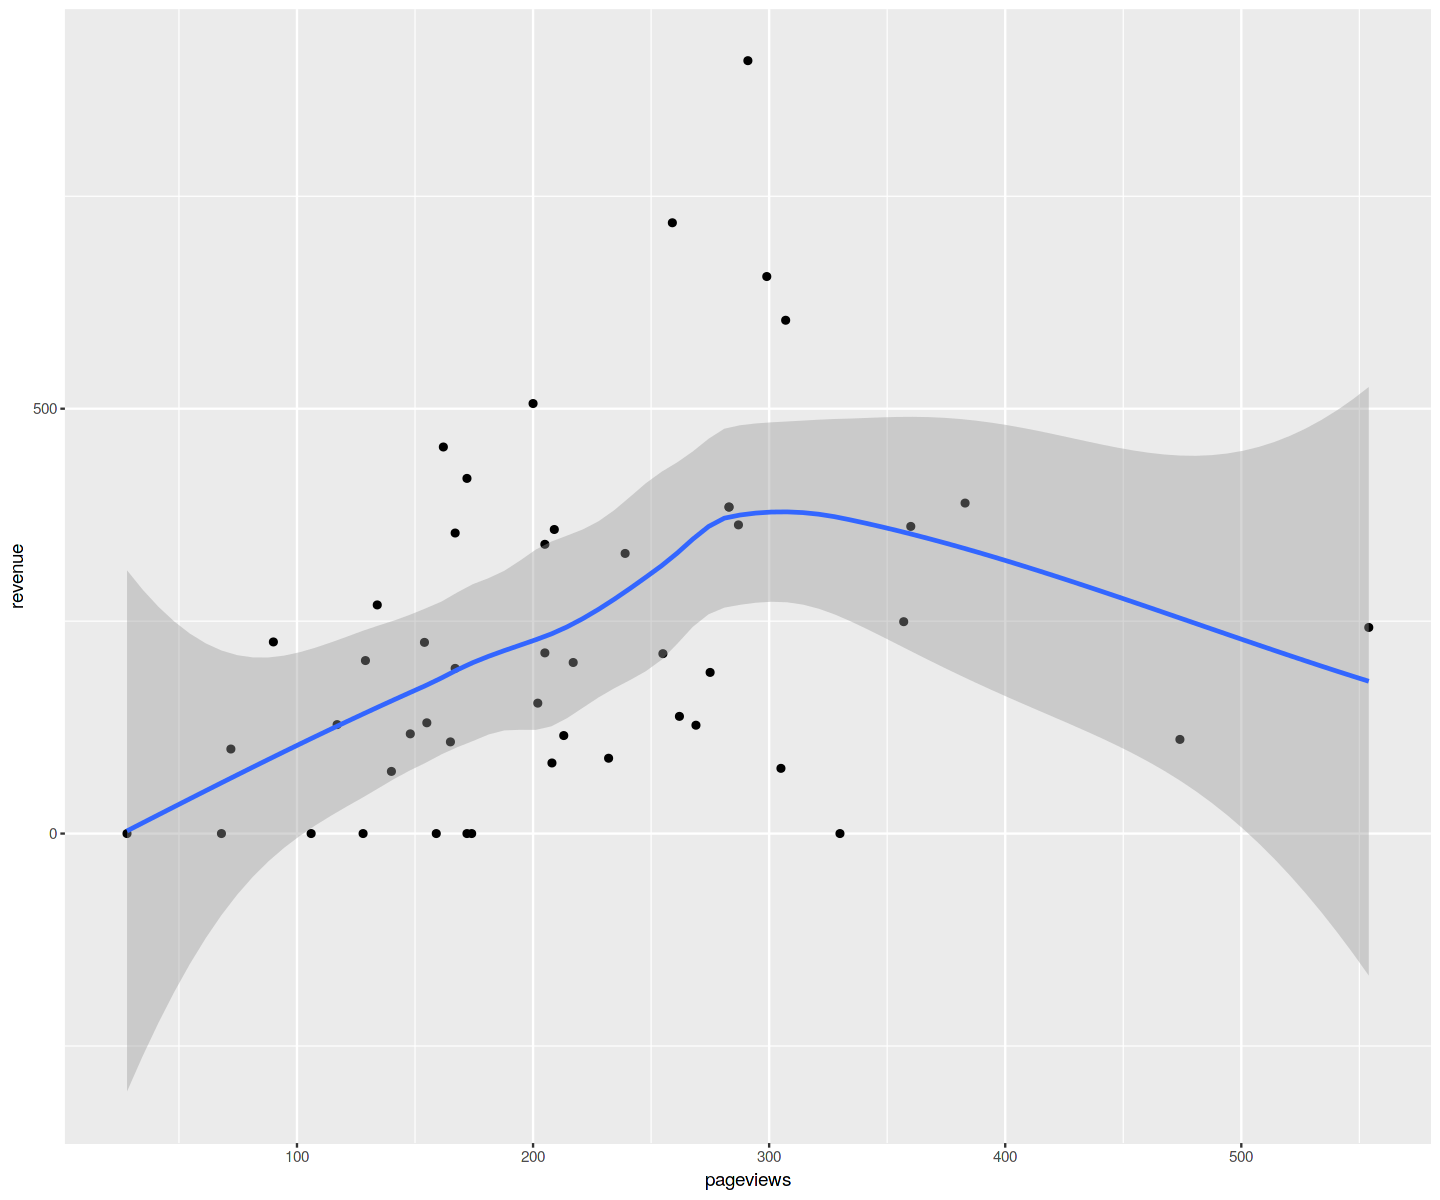

In [71]:
ec_pv_r%>%
ggplot(aes(x=pageviews,
           y=revenue))+
geom_point()+
geom_smooth(method="loess")
#loess model, trend line is not linear
#curves based on the data. It reacts based on the data and directions
#more localized mapping. 
#from loess line, more the pageview, we are not sure if more renvenue can be made
#this trend might happen because of other factors due to wrong traffic, wrong marketing 
#loess makes different conclusion

`geom_smooth()` using formula 'y ~ x'



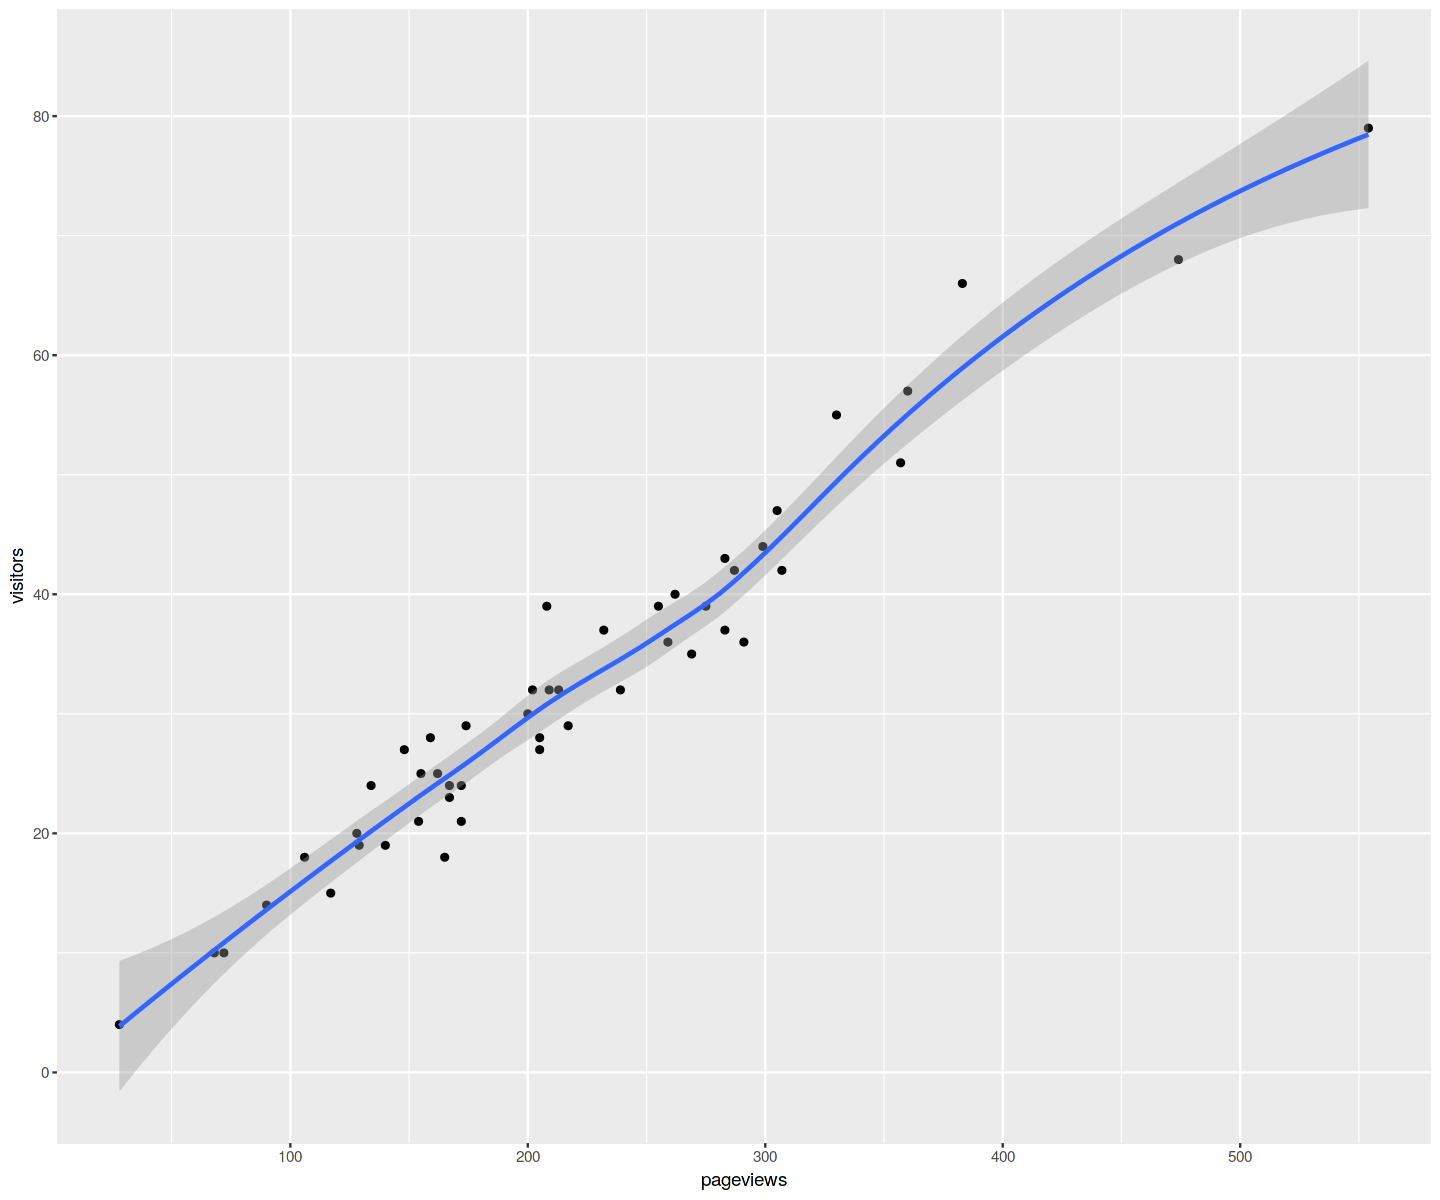

In [72]:
ec_pv_r%>%
ggplot(aes(x=pageviews,
           y=visitors))+
geom_point()+
geom_smooth(method="loess")

`geom_smooth()` using formula 'y ~ x'



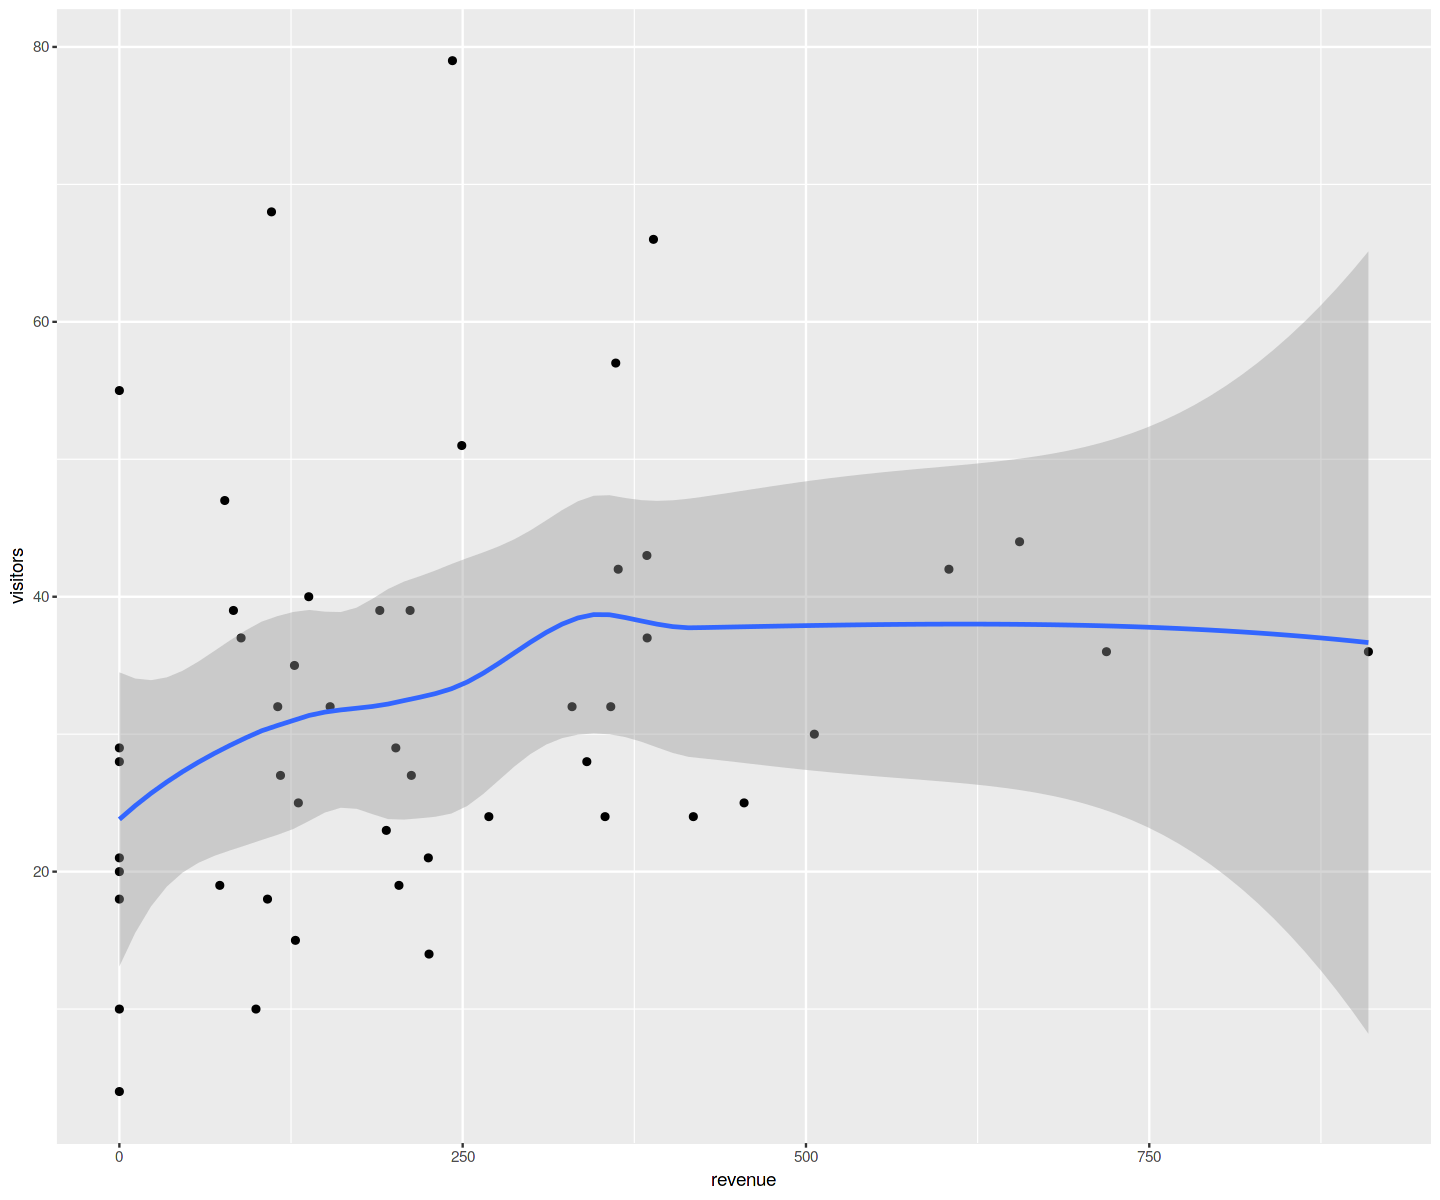

In [73]:
#"To get more revenue, we need more visitors!" 
#Does the data support this view?
ec_pv_r%>%
ggplot(aes(x=revenue,
           y=visitors))+
geom_point()+
geom_smooth(method="loess")

`geom_smooth()` using formula 'y ~ x'



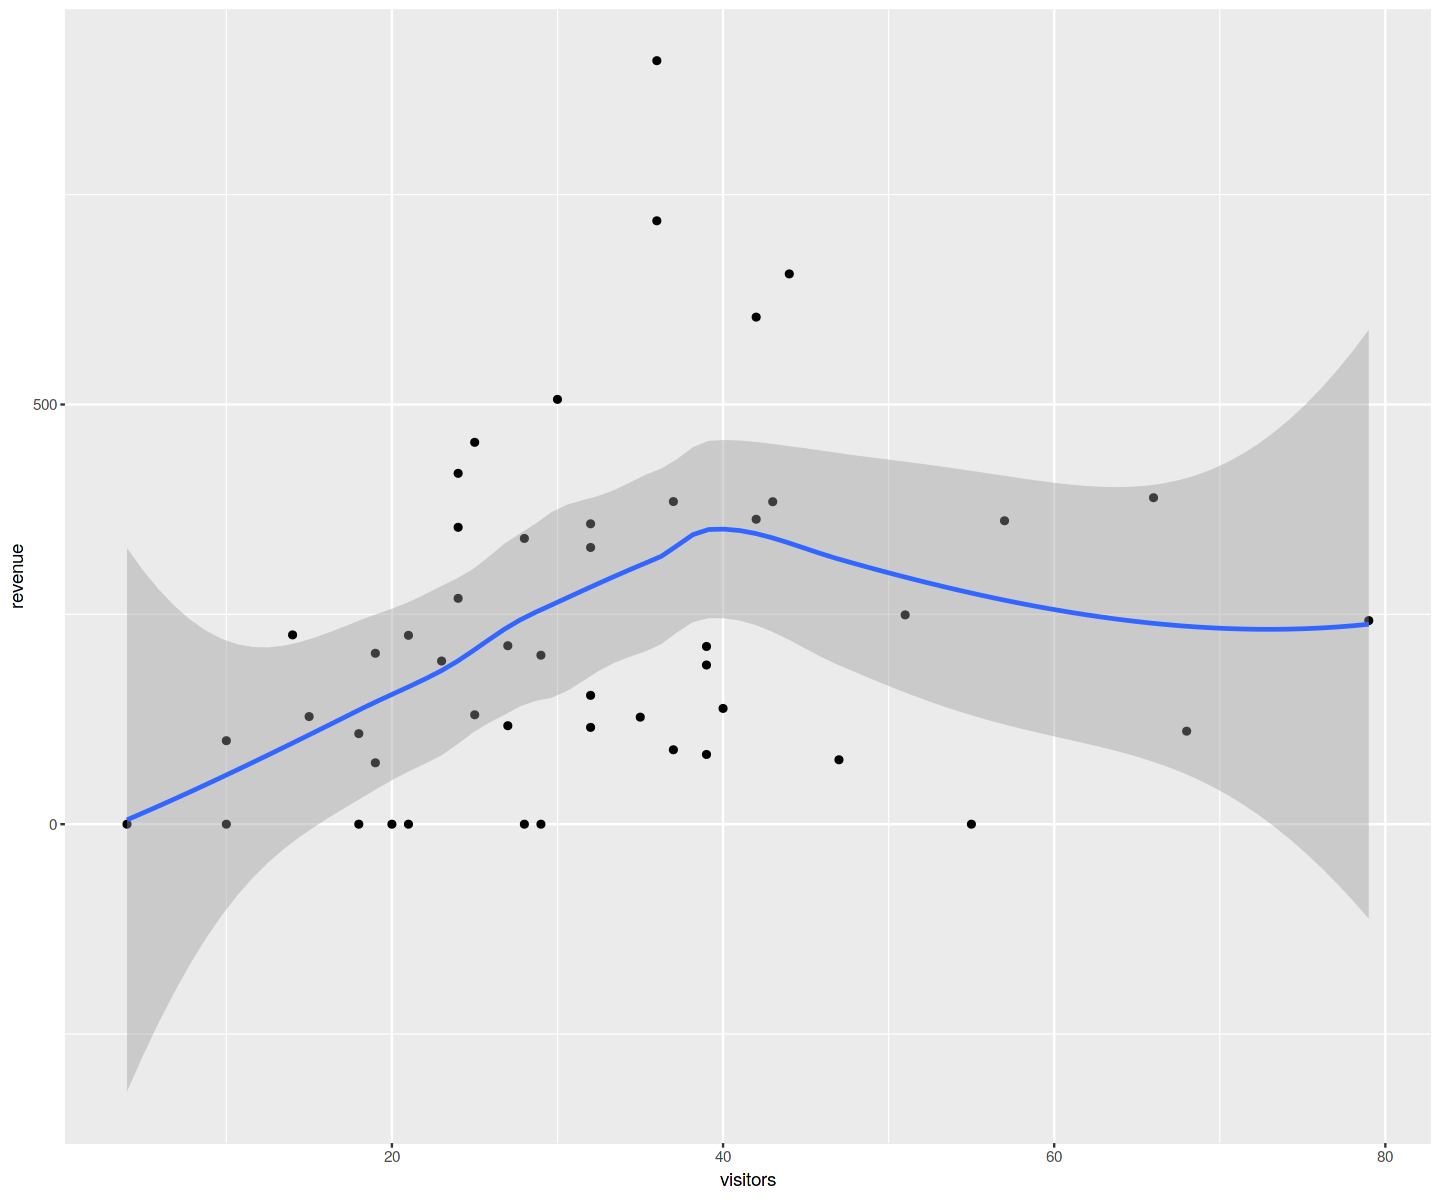

In [74]:
#"To get more revenue, we need more visitors!" 
#Does the data support this view? ans: abt 40 visitors per day after that stays same
ec_pv_r%>%
ggplot(aes(x=visitors,
           y=revenue))+
geom_point()+
geom_smooth(method="loess")

In [75]:
# Extract raw pageview data
ec%>%group_by(date(date_col))%>%
summarize(pageviews=sum(pageviews))%>%
.$pageviews->pageviews
pageviews

[1]  28  68  72 205 383 360 217 172 162 165 283 299 307 129 148 140 117 259 200
[20] 474 174 159 134  90 239 262 283 213 202 106 167 330 209 255 291 269 172 154
[39] 167 357 232 287 208 205 155 275 305 554 128

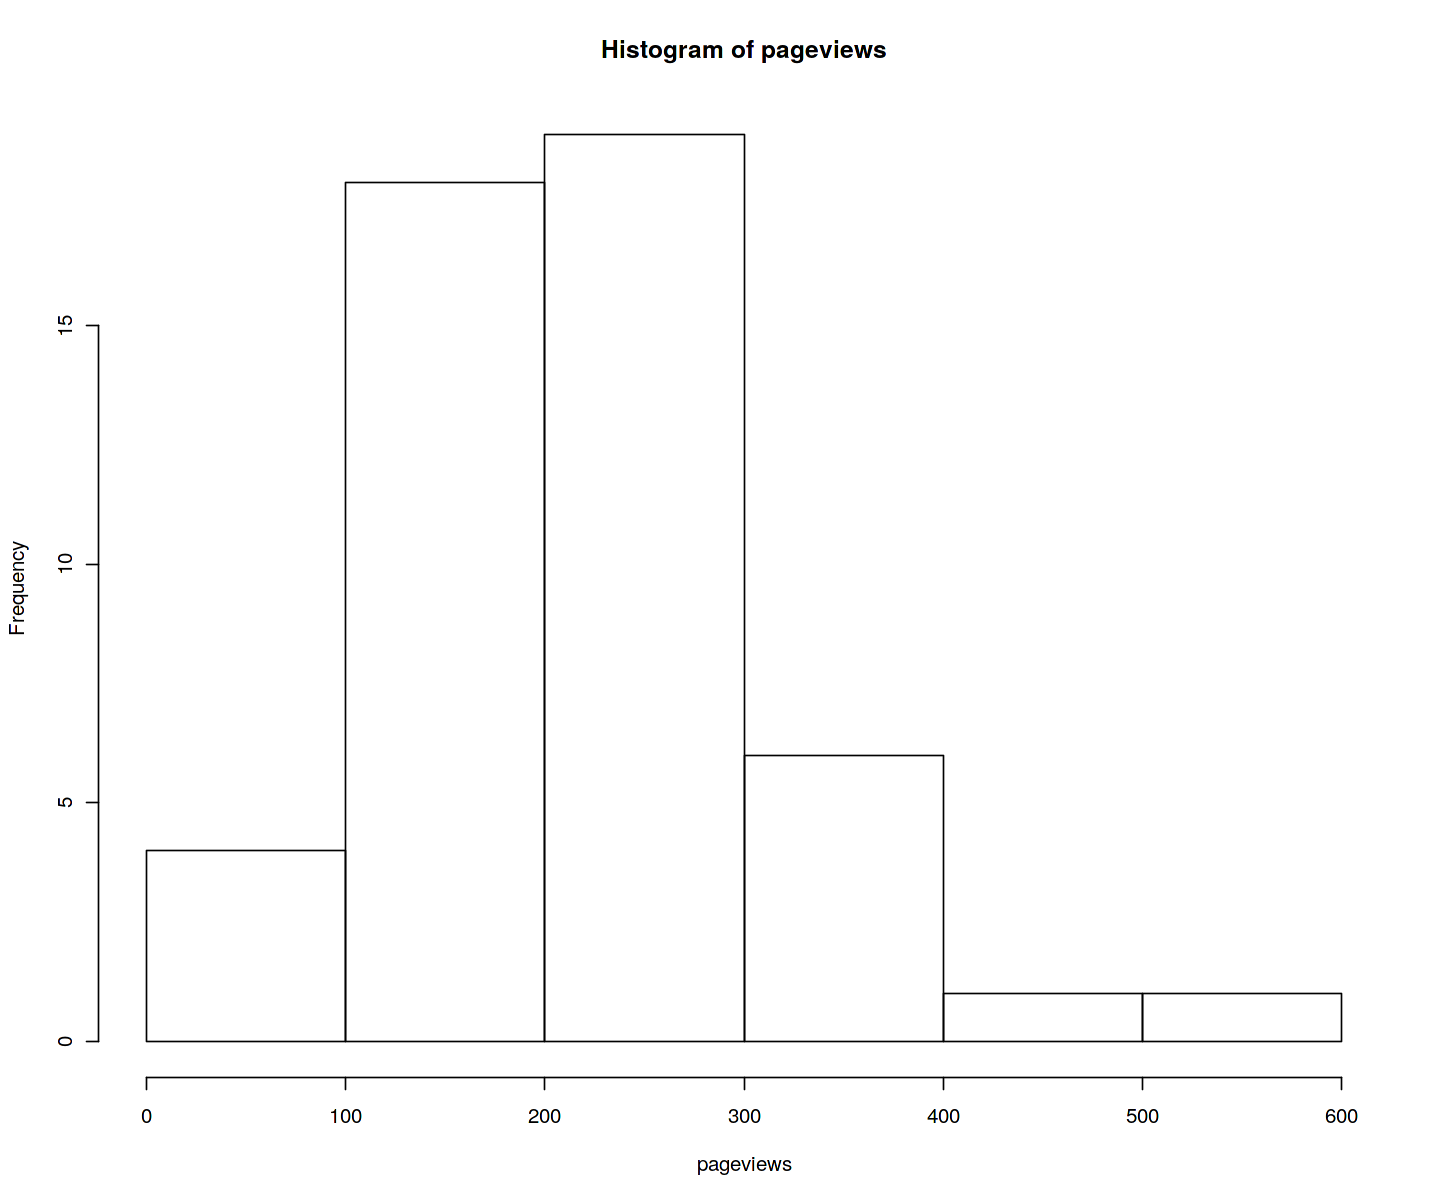

In [76]:
hist(pageviews)

In [77]:
t.test(pageviews)


	One Sample t-test

data:  pageviews
t = 15.186, df = 48, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 190.6955 248.8963
sample estimates:
mean of x 
 219.7959 


In [78]:
ec%>%group_by(date(date_col))%>%
summarize(metric=sum(pageviews))%>%
.$metric->metric
metric

t.test(metric)

[1]  28  68  72 205 383 360 217 172 162 165 283 299 307 129 148 140 117 259 200
[20] 474 174 159 134  90 239 262 283 213 202 106 167 330 209 255 291 269 172 154
[39] 167 357 232 287 208 205 155 275 305 554 128


	One Sample t-test

data:  metric
t = 15.186, df = 48, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 190.6955 248.8963
sample estimates:
mean of x 
 219.7959 


In [79]:
ec%>%
group_by(date=date(date_col),
         weekday=weekdays(date_col))%>%
summarize(pageviews=sum(pageviews))->d_w_pv
head(d_w_pv)

date,weekday,pageviews
<date>,<chr>,<dbl>
2014-07-25,Friday,28
2014-07-26,Saturday,68
2014-07-27,Sunday,72
2014-07-28,Monday,205
2014-07-29,Tuesday,383
2014-07-30,Wednesday,360


In [80]:
d_w_pv%>%
filter(weekday=='Saturday'|weekday=="Sunday")%>%
.$pageviews->weekend_pageviews
weekend_pageviews

[1]  68  72 162 165 140 117 134  90 106 167 172 154 205 155

In [81]:
d_w_pv%>%
filter(weekday!='Saturday'|weekday!="Sunday")%>%
.$pageviews->weekday_pageviews
weekday_pageviews

[1]  28  68  72 205 383 360 217 172 162 165 283 299 307 129 148 140 117 259 200
[20] 474 174 159 134  90 239 262 283 213 202 106 167 330 209 255 291 269 172 154
[39] 167 357 232 287 208 205 155 275 305 554 128

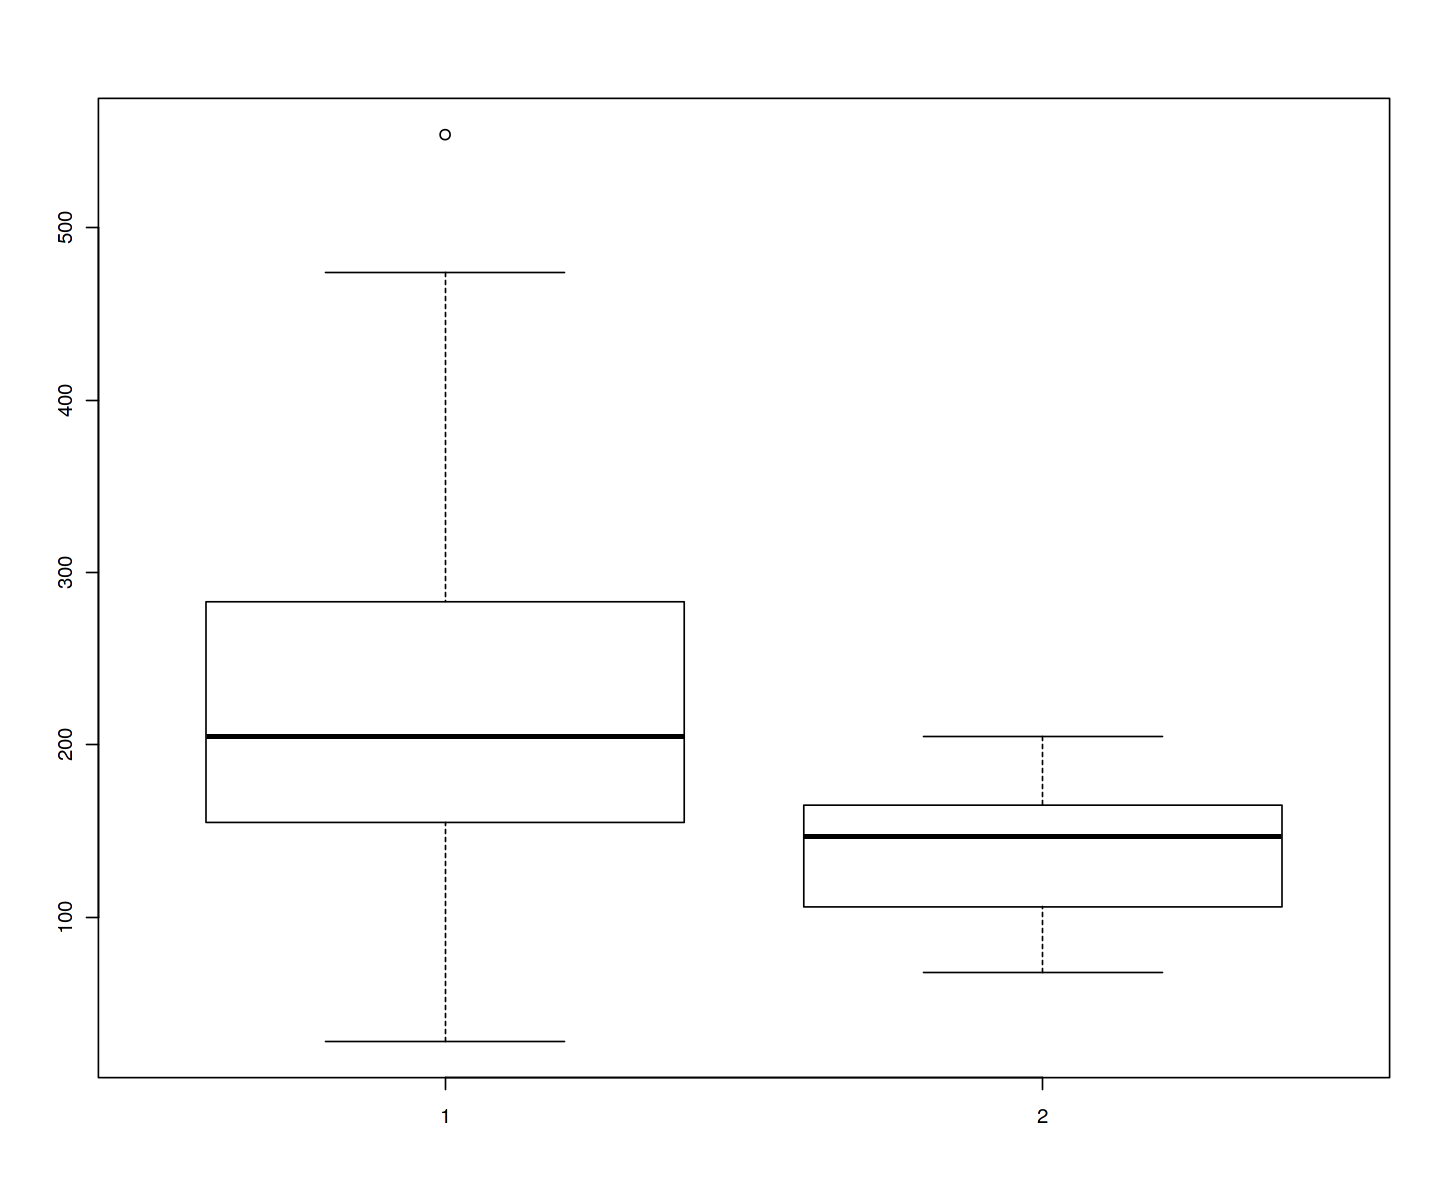

In [82]:
boxplot(weekday_pageviews, weekend_pageviews)

In [83]:
t.test(weekday_pageviews,weekend_pageviews)


	Welch Two Sample t-test

data:  weekday_pageviews and weekend_pageviews
t = 4.6241, df = 54.144, p-value = 2.377e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  47.34557 119.81770
sample estimates:
mean of x mean of y 
 219.7959  136.2143 


In [84]:
ec%>%
group_by(date=date(date_col),
         weekday=weekdays(date_col))%>%
summarize(metric=sum(pageviews))->d_w_m
head(d_w_m)

d_w_m%>%
filter(weekday=='Saturday'|weekday=="Sunday")%>%
.$metric->weekend_metric
weekend_metric

d_w_m%>%
filter(weekday!='Saturday'|weekday!="Sunday")%>%
.$metric->weekday_metric
weekday_metric

t.test(weekday_metric,weekend_metric)

date,weekday,metric
<date>,<chr>,<dbl>
2014-07-25,Friday,28
2014-07-26,Saturday,68
2014-07-27,Sunday,72
2014-07-28,Monday,205
2014-07-29,Tuesday,383
2014-07-30,Wednesday,360


[1]  68  72 162 165 140 117 134  90 106 167 172 154 205 155

[1]  28  68  72 205 383 360 217 172 162 165 283 299 307 129 148 140 117 259 200
[20] 474 174 159 134  90 239 262 283 213 202 106 167 330 209 255 291 269 172 154
[39] 167 357 232 287 208 205 155 275 305 554 128


	Welch Two Sample t-test

data:  weekday_metric and weekend_metric
t = 4.6241, df = 54.144, p-value = 2.377e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  47.34557 119.81770
sample estimates:
mean of x mean of y 
 219.7959  136.2143 


In [85]:
ec%>%
group_by(date(date_col))%>%
summarize(pageviews=sum(pageviews),
          revenue=sum(purchaseAmount))->d_pv_r
head(d_pv_r)

date(date_col),pageviews,revenue
<date>,<dbl>,<dbl>
2014-07-25,28,0.00
2014-07-26,68,0.00
2014-07-27,72,99.48
2014-07-28,205,340.41
2014-07-29,383,388.93
2014-07-30,360,361.47


In [86]:
#Code 36
d_pv_r%>%.$pageviews->pageviews
d_pv_r%>%.$revenue->revenue
pageviews
revenue

[1]  28  68  72 205 383 360 217 172 162 165 283 299 307 129 148 140 117 259 200
[20] 474 174 159 134  90 239 262 283 213 202 106 167 330 209 255 291 269 172 154
[39] 167 357 232 287 208 205 155 275 305 554 128

[1]   0.00   0.00  99.48 340.41 388.93 361.47 201.31 417.97 454.93 107.88
[11] 384.15 655.55 604.09 203.60 117.33  73.13 128.21 718.82 506.09 110.78
[21]   0.00   0.00 269.06 225.50 329.66 137.91 384.35 115.33 153.48   0.00
[31] 353.69   0.00 357.84 211.71 909.58 127.51   0.00 224.99 194.39 249.34
[41]  88.64 363.26  83.06 212.62 130.34 189.64  76.74 242.55   0.00

In [87]:
lm(revenue~pageviews)->lm.model
lm.model


Call:
lm(formula = revenue ~ pageviews)

Coefficients:
(Intercept)    pageviews  
     88.646        0.665  


In [88]:
newdata<-data.frame(pageviews=c(10,100,250,500))
newdata


pageviews
<dbl>
10
100
250
500


In [89]:
predict(lm.model,newdata,se=TRUE)->prediction

cbind(newdata,data.frame(prediction))->lm.prediction
lm.prediction


,pageviews,fit,se.fit,df,residual.scale
,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,10,95.29563,64.17497,47,193.7204
2,100,155.14243,43.11595,47,193.7204
3,250,254.88709,28.90256,47,193.7204
4,500,421.12819,82.13575,47,193.7204


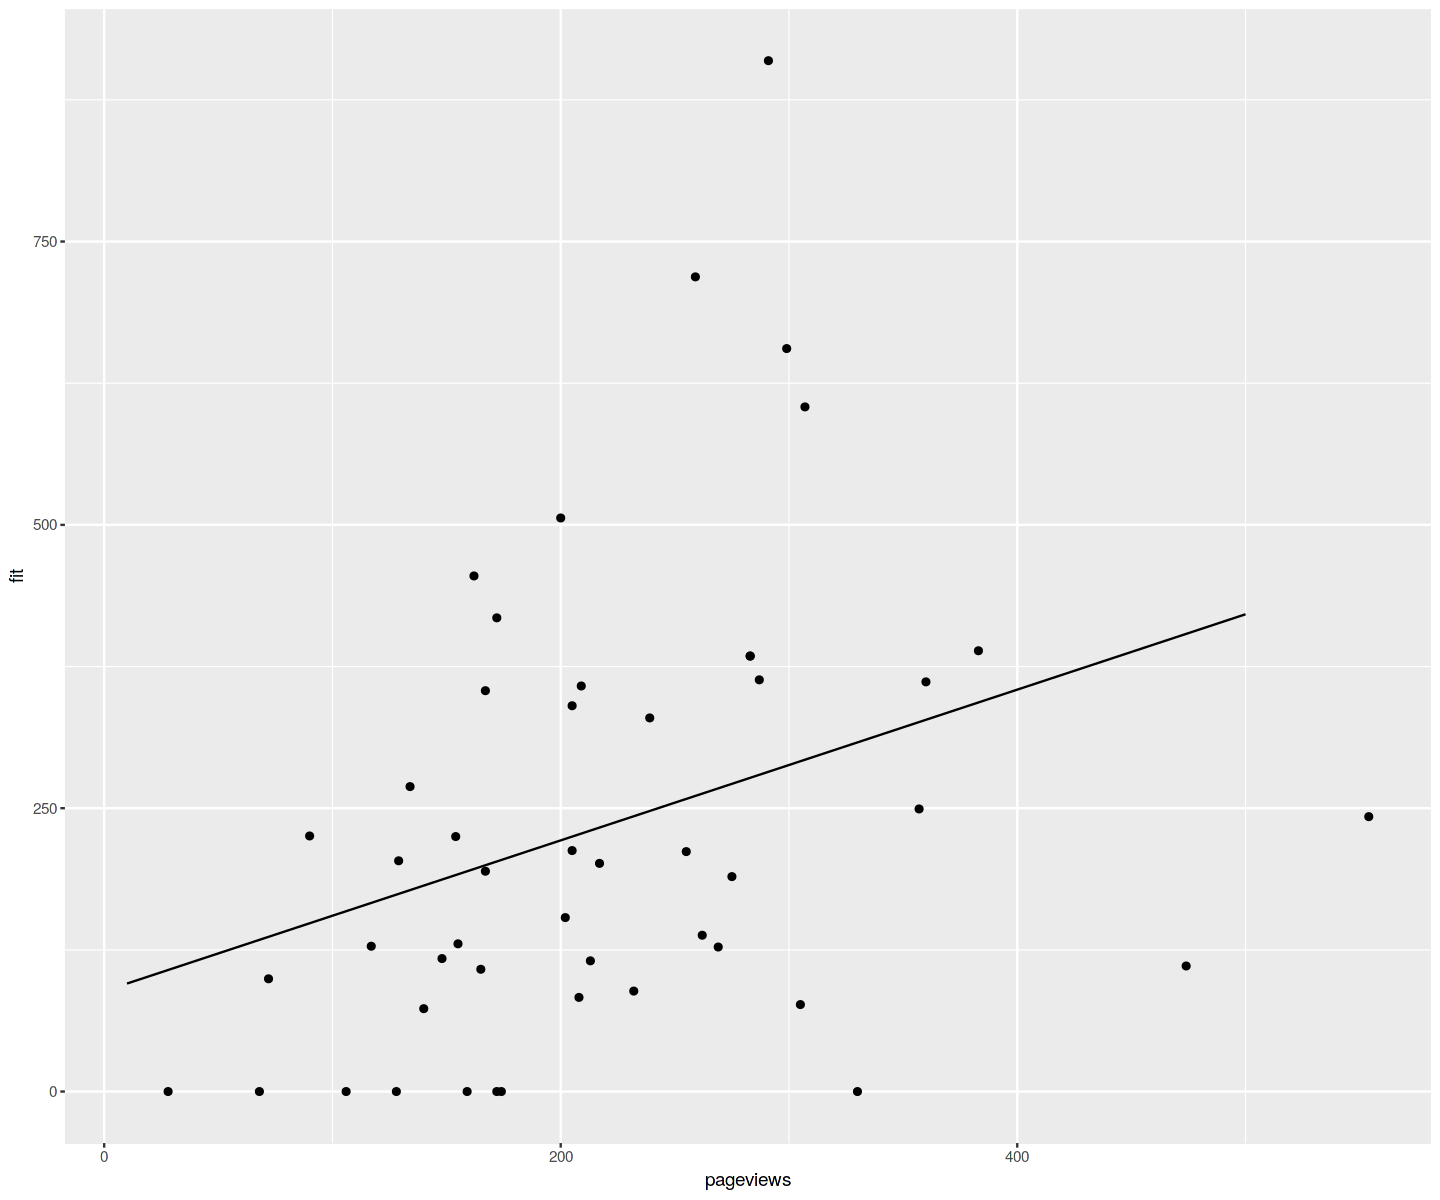

In [90]:
lm.prediction%>%
ggplot(aes(x=pageviews,y=fit))+
geom_line()+
geom_point(data=d_pv_r,
           aes(x=pageviews,
               y=revenue))

In [91]:
loess(revenue~pageviews)->loess.model
loess.model

Call:
loess(formula = revenue ~ pageviews)

Number of Observations: 49 
Equivalent Number of Parameters: 5.45 
Residual Standard Error: 188.2 

In [92]:
newdata=data.frame(pageviews=seq(10,500,10))
predict(loess.model,newdata,se=TRUE)->prediction
cbind(newdata,data.frame(prediction))->prediction
prediction%>%head()

,pageviews,fit,se.fit,residual.scale,df
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,NA,NA,188.2327,42.8042
2,20,NA,NA,188.2327,42.8042
3,30,5.958693,147.10770,188.2327,42.8042
4,40,20.198241,124.17141,188.2327,42.8042
5,50,34.382400,104.42424,188.2327,42.8042
6,60,48.489831,87.96409,188.2327,42.8042


Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


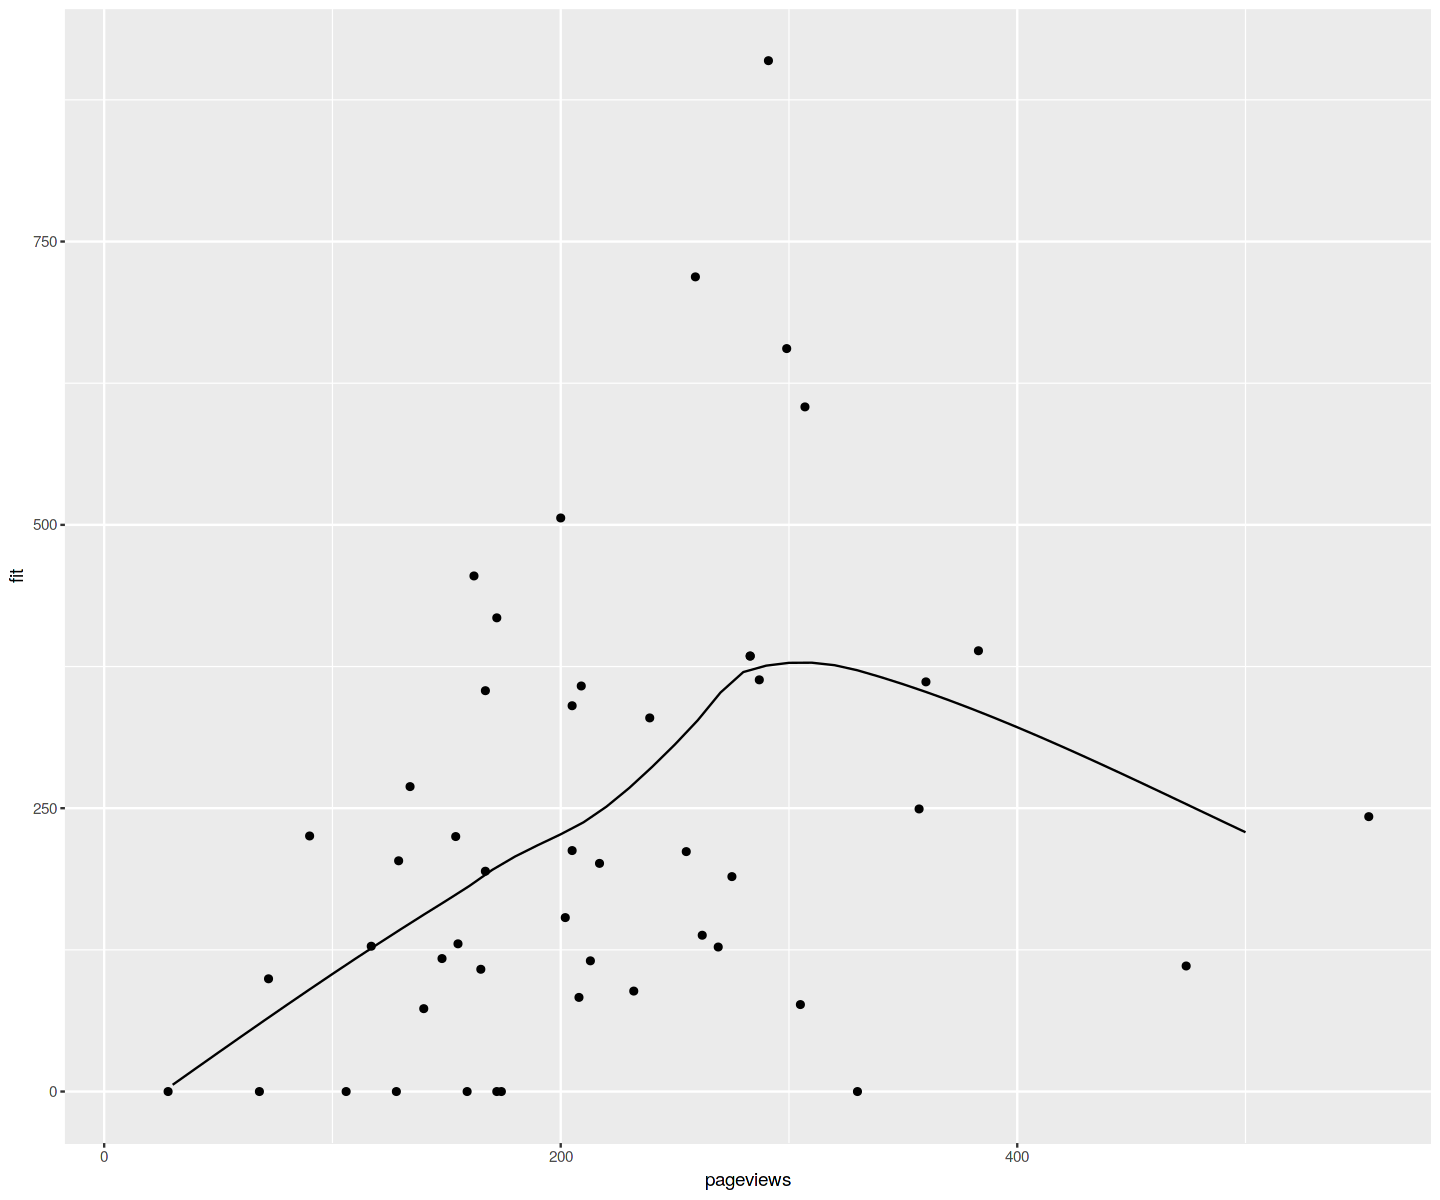

In [93]:
newdata=data.frame(pageviews=seq(10,500,10))
predict(loess.model,newdata,se=TRUE)->prediction
cbind(newdata,data.frame(prediction))->prediction

prediction%>%
ggplot(aes(x=pageviews,y=fit))+
geom_line()+
geom_point(data=d_pv_r,
           aes(x=pageviews,
               y=revenue))

In [95]:
ec%>%summarize(pageviewsPerVisitor=mean(pageviews))

pageviewsPerVisitor
<dbl>
6.765075


In [96]:
ec%>%
tabyl(profile,referral)%>%
filter(profile == "Patient") %>%
adorn_totals("col")#optional
  

profile,Branded Search,Direct,Email,Paid Search,Referred,Self Referred,Social,Unbranded Search,Total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Patient,0,11,0,0,7,0,3,31,52


In [97]:
ec %>%
summarize (totalpurchaseAmount = sum(purchaseAmount))

totalpurchaseAmount
<dbl>
11505.32


In [98]:
ec%>%
filter(gender=='Female'|gender=='Male')%>%
tabyl(age, gender)%>%
    adorn_totals("row")

,age,Female,Male
,<chr>,<dbl>,<dbl>
1,18-24,28,2
2,25-34,127,7
3,35-44,188,9
4,45-54,133,4
5,55-64,69,3
6,65 or older,14,0
7,Less than 18,14,11
8,Total,573,36


In [99]:
ec%>%
filter(gender=='Female'|gender=='Male')%>%
tabyl(gender,age)%>%
    adorn_totals("col")

gender,18-24,25-34,35-44,45-54,55-64,65 or older,Less than 18,Total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Female,28,127,188,133,69,14,14,573
Male,2,7,9,4,3,0,11,36


In [100]:
ec %>% group_by(country) %>%
    filter (country == "Australia") %>%
    summarise(tpageview = sum (pageviews))

country,tpageview
<chr>,<dbl>
Australia,354
